## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

%matplotlib inline

## Read data

In [2]:
sample = pd.read_csv('../data/sample_sub_reg.csv', index_col='Id')
train = pd.read_csv('../data/train.csv', index_col='Id')
test = pd.read_csv('../data/test.csv', index_col='Id')

In [3]:
print("No. of columns in train: {}".format(len(train.columns)))
print("No. of columns in test: {}".format(len(test.columns)))
set(train.columns).symmetric_difference(set(test.columns))

No. of columns in train: 80
No. of columns in test: 79


{'SalePrice'}

train and train data have 80 common columns, but train has one feature more than train. That feature is SalePrice.

## EDA - train data

In [4]:
train.shape

(2051, 80)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2

### Features with NA values implying a certain category

In [6]:
# train['Alley'] = train['Alley'].fillna('None')
# train['Bsmt Qual'] = train['Bsmt Qual'].fillna('None')
# train['Bsmt Cond'] = train['Bsmt Cond'].fillna('None')
# train['Bsmt Exposure'] = train['Bsmt Exposure'].fillna('None')
# train['BsmtFin Type 1'] = train['BsmtFin Type 1'].fillna('None')
# train['BsmtFin Type 2'] = train['BsmtFin Type 2'].fillna('None')
# train['Fireplace Qu'] = train['Fireplace Qu'].fillna('None')
# train['Garage Type'] = train['Garage Type'].fillna('None')
# train['Garage Finish'] = train['Garage Finish'].fillna('None')
# train['Garage Qual'] = train['Garage Qual'].fillna('None')
# train['Garage Cond'] = train['Garage Cond'].fillna('None')
# train['Pool QC'] = train['Pool QC'].fillna('None')
# train['Fence'] = train['Fence'].fillna('None')
# train['Misc Feature'] = train['Misc Feature'].fillna('None')

In [7]:
train.isnull().sum()[train.isnull().sum() > 0].sort_index()

Alley             1911
Bsmt Cond           55
Bsmt Exposure       58
Bsmt Full Bath       2
Bsmt Half Bath       2
Bsmt Qual           55
Bsmt Unf SF          1
BsmtFin SF 1         1
BsmtFin SF 2         1
BsmtFin Type 1      55
BsmtFin Type 2      56
Fence             1651
Fireplace Qu      1000
Garage Area          1
Garage Cars          1
Garage Cond        114
Garage Finish      114
Garage Qual        114
Garage Type        113
Garage Yr Blt      114
Lot Frontage       330
Mas Vnr Area        22
Mas Vnr Type        22
Misc Feature      1986
Pool QC           2042
Total Bsmt SF        1
dtype: int64

In [8]:
train.isnull().sum()[train.isnull().sum() > 0].index.tolist()

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

In [9]:
discrete_features = ['Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
           'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
            'Mo Sold', 'Yr Sold']

continuous_features = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
                       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
                       'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
                       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']

nominal_features = ['PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config',
                    'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
                    'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating',
                    'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type']

ordinal_features = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual',
                    'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
                    'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish',
                    'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence'
                   ]

len(discrete_features), len(continuous_features), len(nominal_features), len(ordinal_features)

(14, 19, 23, 23)

### Target variable

**SalePrice**

In [10]:
train['SalePrice'].dtype

dtype('int64')

In [11]:
train['SalePrice'] = train['SalePrice'].astype('float')

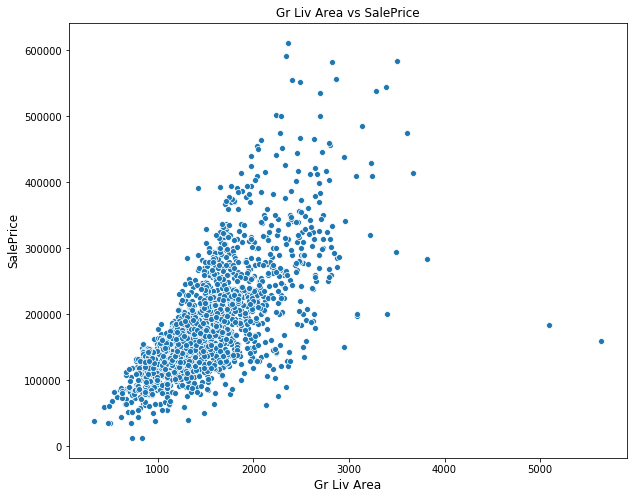

In [12]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=train)

plt.title('Gr Liv Area vs SalePrice', fontsize=12)
plt.xlabel('Gr Liv Area', fontsize=12)
plt.ylabel('SalePrice', fontsize=12);
plt.savefig('../images/1_scatter_saleprice_gr_liv_area.png', transparent=True)

Observation: Outliers detected with Gr Liv Area > 4000 as stipulated in the Data Documentation file.

In [13]:
# Remove outliers
train = train[train['Gr Liv Area'] <= 4000]

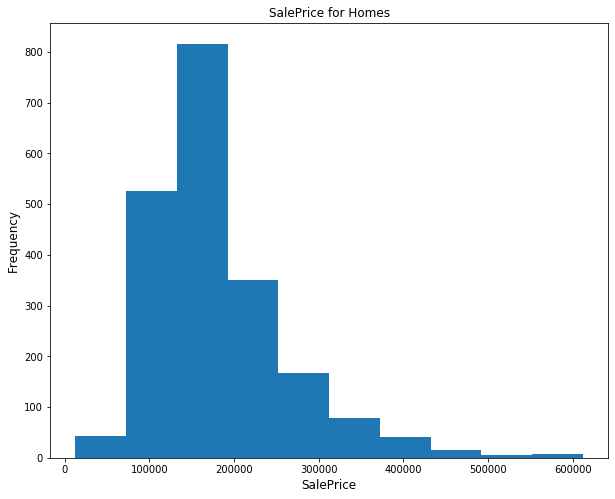

In [14]:
plt.figure(figsize=(10, 8))
plt.hist(train['SalePrice'])

plt.title('SalePrice for Homes', fontsize=12)
plt.xlabel('SalePrice', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.savefig('../images/2_hist_saleprice.png', transparent=True)

### Discrete Features

**Year Built**

In [15]:
train['Year Built'].dtype

dtype('int64')

In [16]:
sorted(train['Year Built'].value_counts(dropna=False).index.tolist())

[1872,
 1875,
 1879,
 1880,
 1885,
 1890,
 1892,
 1893,
 1895,
 1896,
 1898,
 1900,
 1901,
 1905,
 1908,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010]

In [17]:
train['Year Built'].value_counts(dropna=False).sort_index()

1872     1
1875     1
1879     1
1880     3
1885     1
        ..
2006    99
2007    78
2008    34
2009    14
2010     1
Name: Year Built, Length: 113, dtype: int64

In [18]:
indices = train['Year Built'].value_counts(dropna=False).sort_index().index
values = train['Year Built'].value_counts(dropna=False).sort_index().values

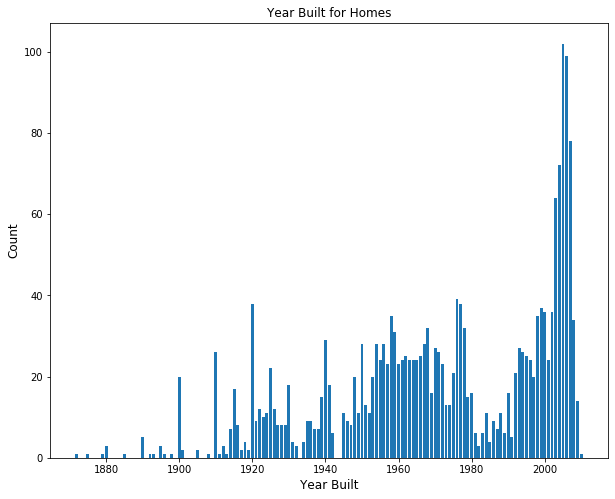

In [19]:
plt.figure(figsize=(10, 8))
plt.bar(indices, values)

plt.title('Year Built for Homes', fontsize=12)
plt.xlabel('Year Built', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/3_bar_year_blt.png', transparent=True)

Observation: 

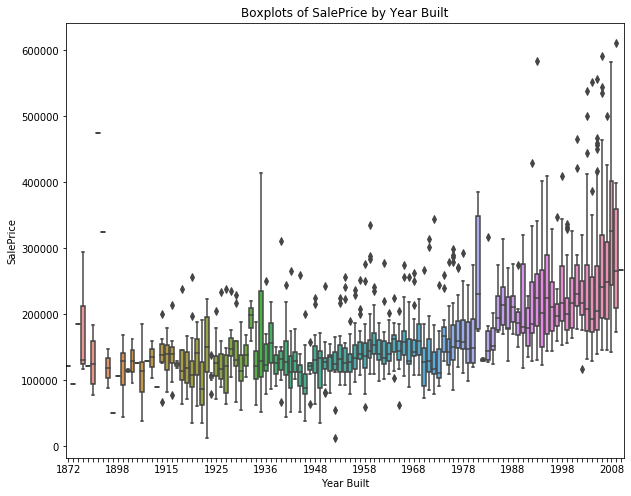

In [20]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Year Built', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Year Built')

for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

**Year Remod/Add**

In [21]:
train['Year Remod/Add'].dtype

dtype('int64')

In [22]:
# sorted(train['Year Remod/Add'].value_counts(dropna=False).index.tolist())

In [23]:
train['Year Remod/Add'].value_counts(dropna=False).sort_index()

1950    262
1951     10
1952      9
1953     18
1954     17
       ... 
2006    139
2007    123
2008     54
2009     22
2010      8
Name: Year Remod/Add, Length: 61, dtype: int64

In [24]:
indices = train['Year Remod/Add'].value_counts(dropna=False).sort_index().index
values = train['Year Remod/Add'].value_counts(dropna=False).sort_index().values

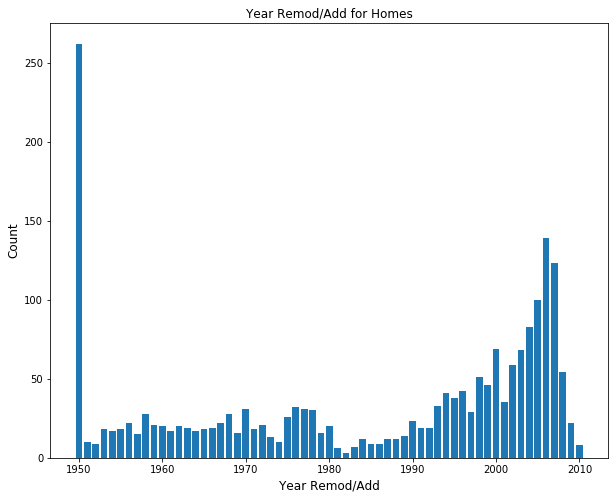

In [25]:
plt.figure(figsize=(10, 8))
plt.bar(indices, values)

plt.title('Year Remod/Add for Homes', fontsize=12)
plt.xlabel('Year Remod/Add', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/4_bar_year_remod.png', transparent=True)

Observation:

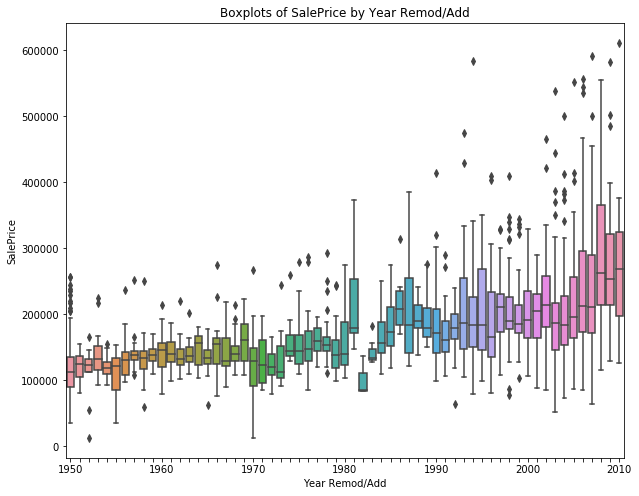

In [26]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Year Remod/Add', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Year Remod/Add')

for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.savefig('../images/5_boxplot_year_remod.png', transparent=True)

**Bsmt Full Bath**

In [27]:
train['Bsmt Full Bath'].dtype

dtype('float64')

In [28]:
train['Bsmt Full Bath'].value_counts(dropna=False)

0.0    1200
1.0     823
2.0      22
3.0       2
NaN       2
Name: Bsmt Full Bath, dtype: int64

In [29]:
train['Bsmt Full Bath'] = train['Bsmt Full Bath'].astype('Int64')

In [30]:
train['Bsmt Full Bath'].value_counts(dropna=False).sort_index()

0      1200
1       823
2        22
3         2
NaN       2
Name: Bsmt Full Bath, dtype: int64

In [31]:
idx = train['Bsmt Full Bath'].value_counts().sort_index().index
val = train['Bsmt Full Bath'].value_counts().sort_index().values

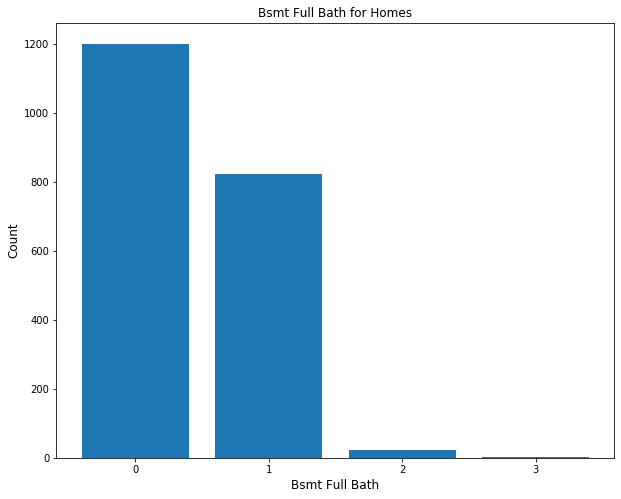

In [32]:
plt.figure(figsize=(10, 8))
plt.bar(idx, val)

plt.title('Bsmt Full Bath for Homes', fontsize=12)
plt.xlabel('Bsmt Full Bath', fontsize=12)
plt.xticks([i for i in range(len(idx))], idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/6_bar_bsmt_full_bath.png', transparent=True)

Observation: In decreasing order of counts of Bsmt Full Bath: 0, 1, 2, 3

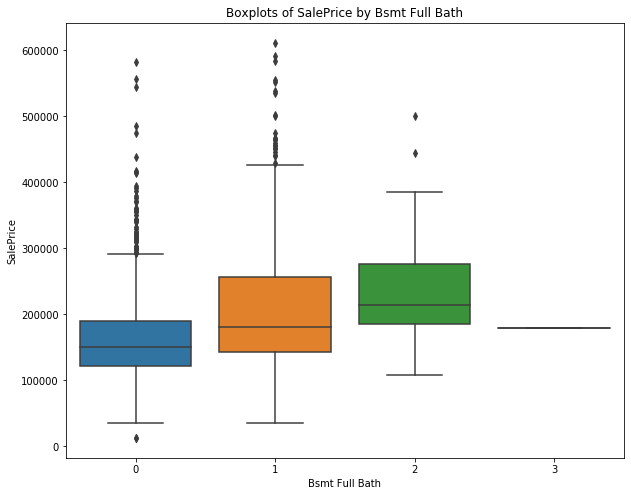

In [33]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Bsmt Full Bath', y='SalePrice', data=train)
plt.title('Boxplots of SalePrice by Bsmt Full Bath')
plt.savefig('../images/7_boxplot_bsmt_full_bath.png', transparent=True)

**Bsmt Half Bath**

In [34]:
train['Bsmt Half Bath'].dtype

dtype('float64')

In [35]:
train['Bsmt Half Bath'].value_counts(dropna=False)

0.0    1922
1.0     121
2.0       4
NaN       2
Name: Bsmt Half Bath, dtype: int64

In [36]:
train['Bsmt Half Bath'] = train['Bsmt Half Bath'].astype('Int64')

In [37]:
train['Bsmt Half Bath'].value_counts(dropna=False).sort_index()

0      1922
1       121
2         4
NaN       2
Name: Bsmt Half Bath, dtype: int64

In [38]:
idx = train['Bsmt Half Bath'].value_counts().sort_index().index
val = train['Bsmt Half Bath'].value_counts().sort_index().values

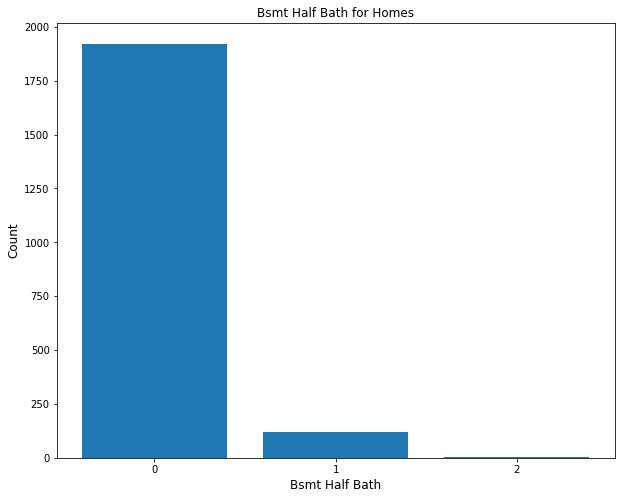

In [39]:
plt.figure(figsize=(10, 8))
plt.bar(idx, val)

plt.title('Bsmt Half Bath for Homes', fontsize=12)
plt.xlabel('Bsmt Half Bath', fontsize=12)
plt.xticks([i for i in range(len(idx))], idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/8_bar_bsmt_half_bath.png', transparent=True)

Observation: In decreasing order of counts of Bsmt Half Bath: 0, 1, 2, 3

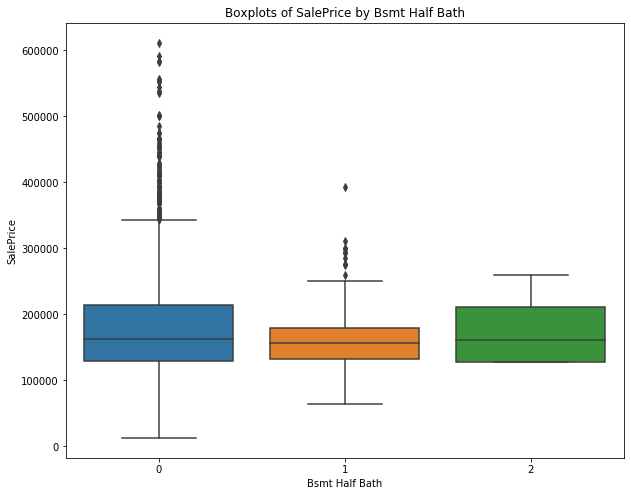

In [40]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Bsmt Half Bath', y='SalePrice', data=train)
plt.title('Boxplots of SalePrice by Bsmt Half Bath')
plt.savefig('../images/9_boxplot_bsmt_half_bath.png', transparent=True)

**Full Bath**

In [41]:
train['Full Bath'].dtype

dtype('int64')

In [42]:
train['Full Bath'].value_counts(dropna=False).sort_index()

0       8
1     900
2    1094
3      45
4       2
Name: Full Bath, dtype: int64

In [43]:
idx = train['Full Bath'].value_counts().sort_index().index
val = train['Full Bath'].value_counts().sort_index().values

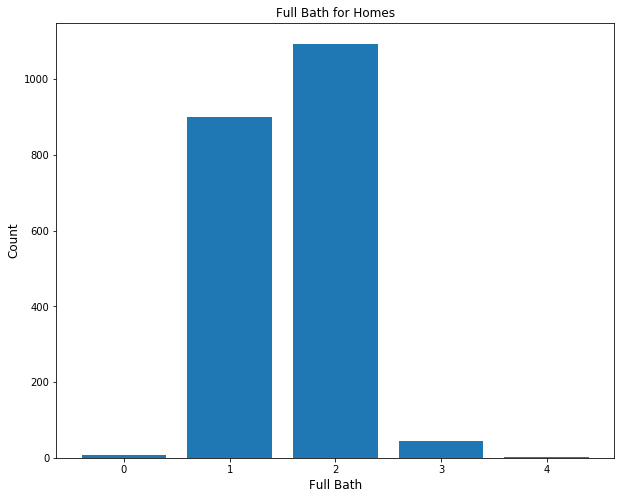

In [44]:
plt.figure(figsize=(10, 8))
plt.bar(idx, val)

plt.title('Full Bath for Homes', fontsize=12)
plt.xlabel('Full Bath', fontsize=12)
plt.xticks([i for i in range(len(idx))], idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/10_bar_full_bath.png', transparent=True)

Observation: In decreasing order of counts of Full Bath: 2, 1, 3, 0, 4

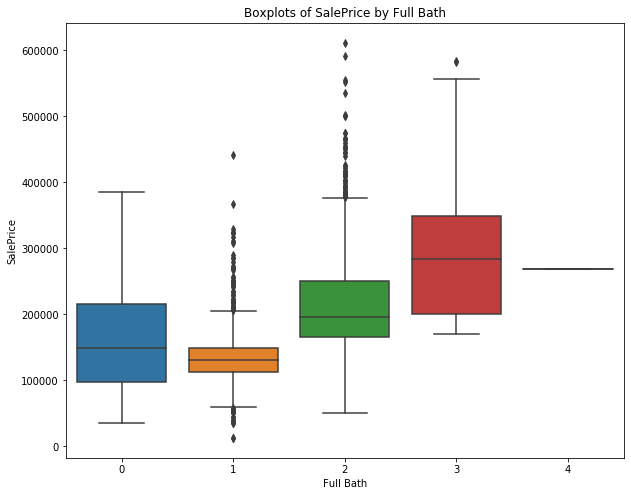

In [45]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Full Bath', y='SalePrice', data=train)
plt.title('Boxplots of SalePrice by Full Bath')
plt.savefig('../images/11_boxplot_full_bath.png', transparent=True)

**Half Bath**

In [46]:
train['Half Bath'].dtype

dtype('int64')

In [47]:
train['Half Bath'].value_counts(dropna=False)

0    1308
1     723
2      18
Name: Half Bath, dtype: int64

In [48]:
idx = train['Half Bath'].value_counts().sort_index().index
val = train['Half Bath'].value_counts().sort_index().values

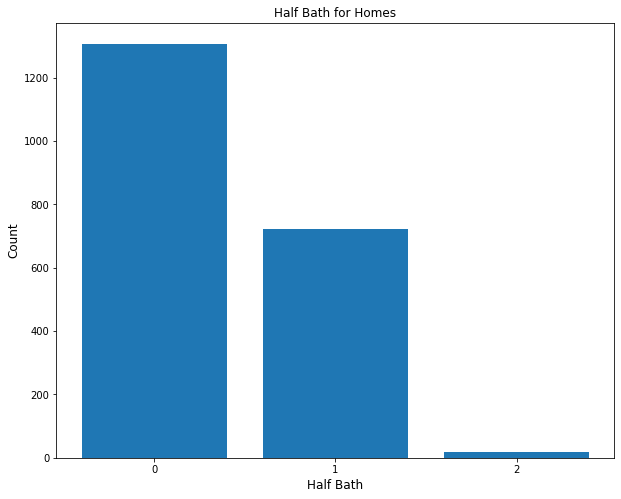

In [49]:
plt.figure(figsize=(10, 8))
plt.bar(idx, val)

plt.title('Half Bath for Homes', fontsize=12)
plt.xlabel('Half Bath', fontsize=12)
plt.xticks([i for i in range(len(idx))], idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/12_bar_half_bath.png', transparent=True)

Observation: In decreasing order of counts of Half Bath: 0, 1, 2

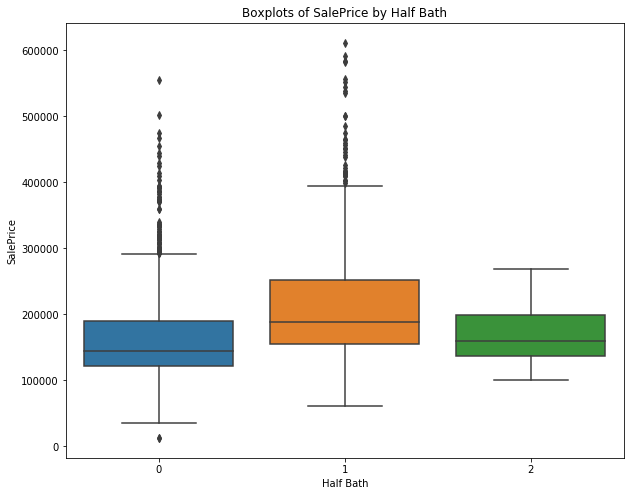

In [50]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Half Bath', y='SalePrice', data=train)
plt.title('Boxplots of SalePrice by Half Bath')
plt.savefig('../images/13_boxplot_half_bath.png', transparent=True)

**Bedroom AbvGr**

In [51]:
train['Bedroom AbvGr'].dtype

dtype('int64')

In [52]:
train['Bedroom AbvGr'].value_counts(dropna=False).sort_index()

0       5
1      75
2     543
3    1107
4     265
5      41
6      12
8       1
Name: Bedroom AbvGr, dtype: int64

In [53]:
idx = train['Bedroom AbvGr'].value_counts().sort_index().index
val = train['Bedroom AbvGr'].value_counts().sort_index().values

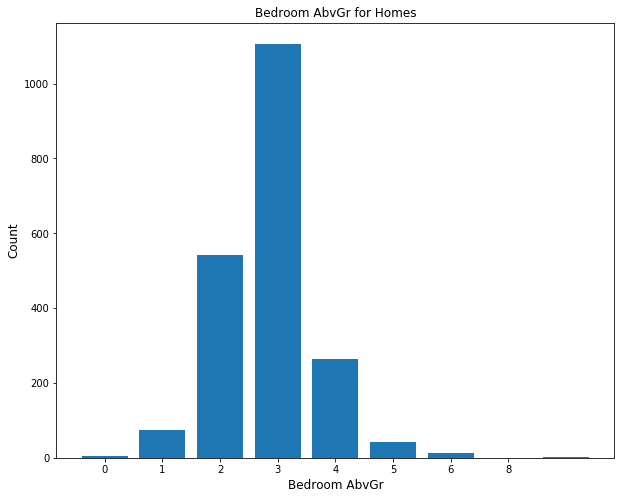

In [54]:
plt.figure(figsize=(10, 8))
plt.bar(idx, val)

plt.title('Bedroom AbvGr for Homes', fontsize=12)
plt.xlabel('Bedroom AbvGr', fontsize=12)
plt.xticks([i for i in range(len(idx))], idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/14_bar_bedroom_abvgr.png', transparent=True)

Observation: In decreasing order of counts of Bedroom AbvGr: 3, 2, 4, 1, 5, 6, 0, 8

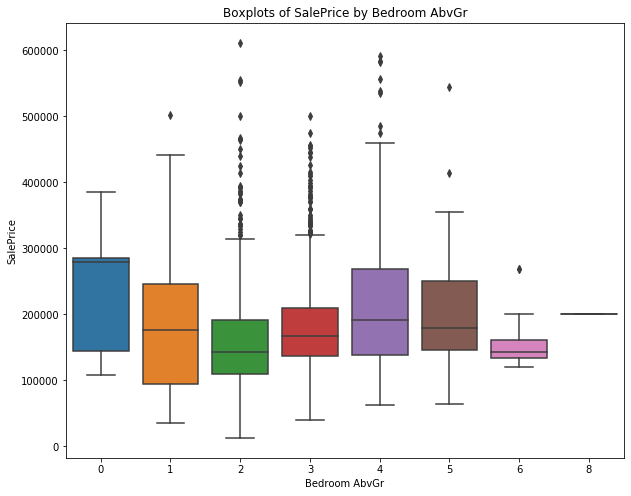

In [55]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Bedroom AbvGr', y='SalePrice', data=train)
plt.title('Boxplots of SalePrice by Bedroom AbvGr')
plt.savefig('../images/15_boxplot_bedroom_abvgr.png', transparent=True)

**Kitchen AbvGr**

In [56]:
train['Kitchen AbvGr'].dtype

dtype('int64')

In [57]:
train['Kitchen AbvGr'].value_counts(dropna=False).sort_index()

0       2
1    1958
2      88
3       1
Name: Kitchen AbvGr, dtype: int64

In [58]:
idx = train['Kitchen AbvGr'].value_counts().sort_index().index
val = train['Kitchen AbvGr'].value_counts().sort_index().values

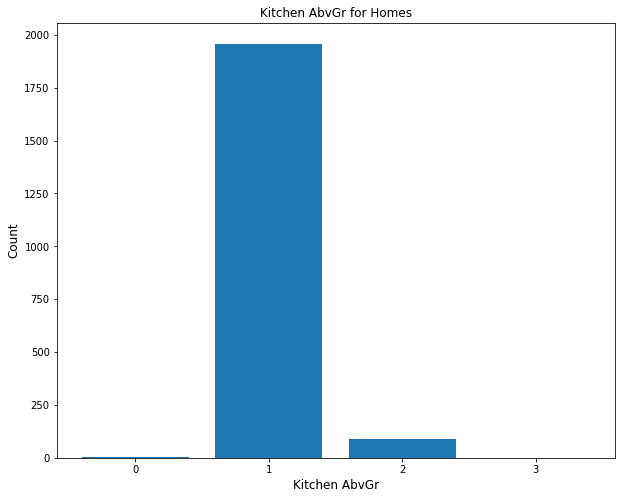

In [59]:
plt.figure(figsize=(10, 8))
plt.bar(idx, val)

plt.title('Kitchen AbvGr for Homes', fontsize=12)
plt.xlabel('Kitchen AbvGr', fontsize=12)
plt.xticks([i for i in range(len(idx))], idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/16_bar_kitchen_abvgr.png', transparent=True)

Observation: In decreasing order of counts of Kitchen AbvGr: 1, 2, 0, 3

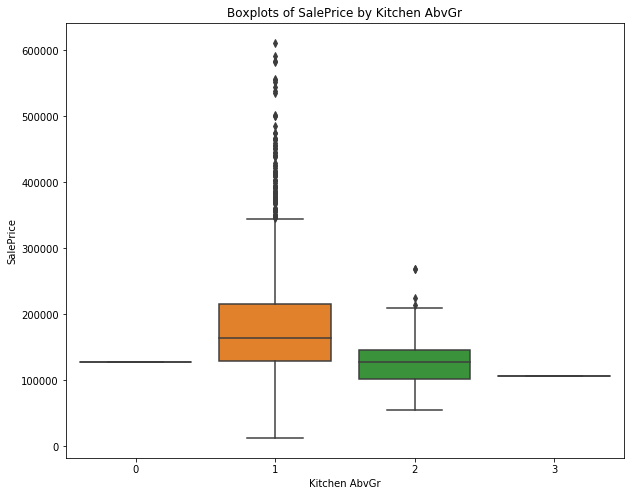

In [60]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Kitchen AbvGr', y='SalePrice', data=train)
plt.title('Boxplots of SalePrice by Kitchen AbvGr')
plt.savefig('../images/17_boxplot_kitchen_abvgr.png', transparent=True)

**TotRms AbvGrd**

In [61]:
train['TotRms AbvGrd'].dtype

dtype('int64')

In [62]:
train['TotRms AbvGrd'].value_counts(dropna=False).sort_index()

2       1
3      12
4     146
5     407
6     597
7     475
8     228
9      98
10     49
11     22
12     12
13      1
14      1
Name: TotRms AbvGrd, dtype: int64

In [63]:
idx = train['TotRms AbvGrd'].value_counts().sort_index().index
val = train['TotRms AbvGrd'].value_counts().sort_index().values

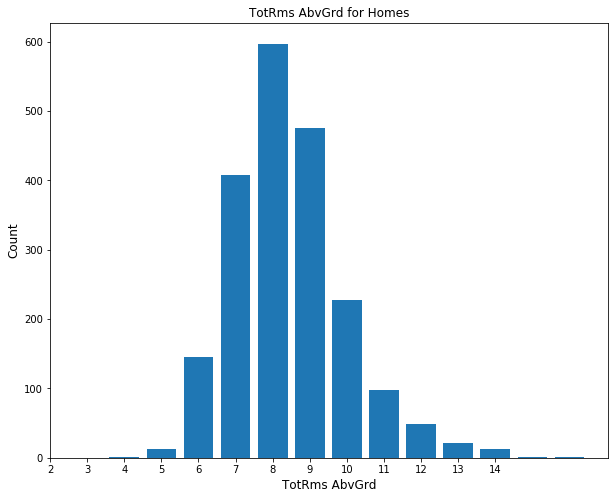

In [64]:
plt.figure(figsize=(10, 8))
plt.bar(idx, val)

plt.title('TotRms AbvGrd for Homes', fontsize=12)
plt.xlabel('TotRms AbvGrd', fontsize=12)
plt.xticks([i for i in range(len(idx))], idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/18_bar_totrms_abvgr.png', transparent=True)

Observation: In decreasing order of counts of TotRms AbvGrd: 15, 14, 13, 2, 3, 12, 11, 10, 9, 4, 8, 5, 7, 6

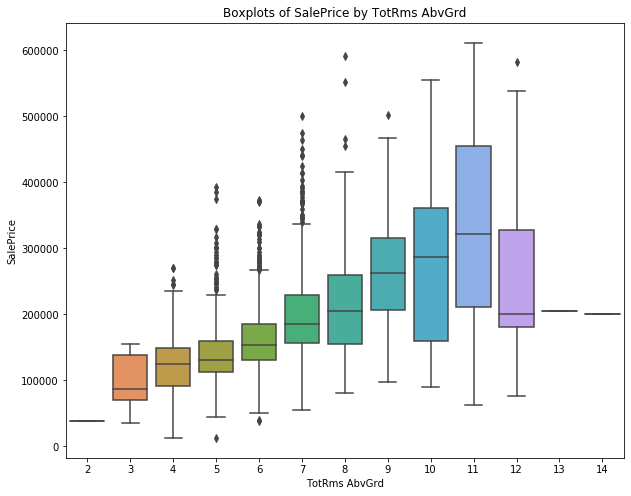

In [65]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='TotRms AbvGrd', y='SalePrice', data=train)
plt.title('Boxplots of SalePrice by TotRms AbvGrd')
plt.savefig('../images/19_boxplot_totrms_abvgr.png', transparent=True)

**Fireplaces**

In [66]:
train['Fireplaces'].dtype

dtype('int64')

In [67]:
train['Fireplaces'].value_counts(dropna=False)

0    1000
1     898
2     145
3       5
4       1
Name: Fireplaces, dtype: int64

In [68]:
idx = train['Fireplaces'].value_counts().sort_index().index
val = train['Fireplaces'].value_counts().sort_index().values

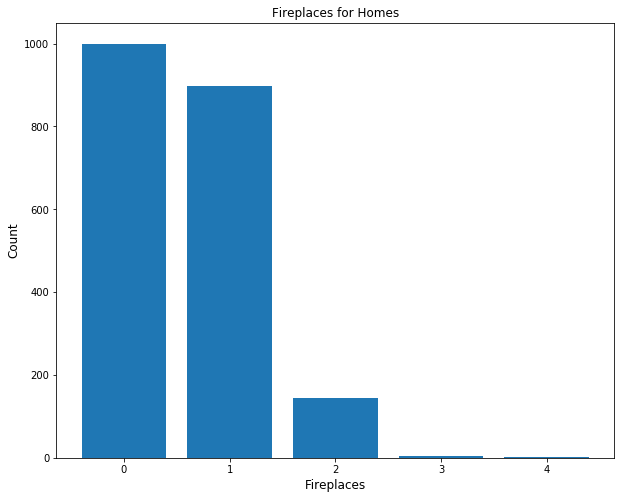

In [69]:
plt.figure(figsize=(10, 8))
plt.bar(idx, val)

plt.title('Fireplaces for Homes', fontsize=12)
plt.xlabel('Fireplaces', fontsize=12)
plt.xticks([i for i in range(len(idx))], idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/20_bar_fireplaces.png', transparent=True)

Observation: In decreasing order of counts of Fireplaces: 0, 1, 2, 3, 4

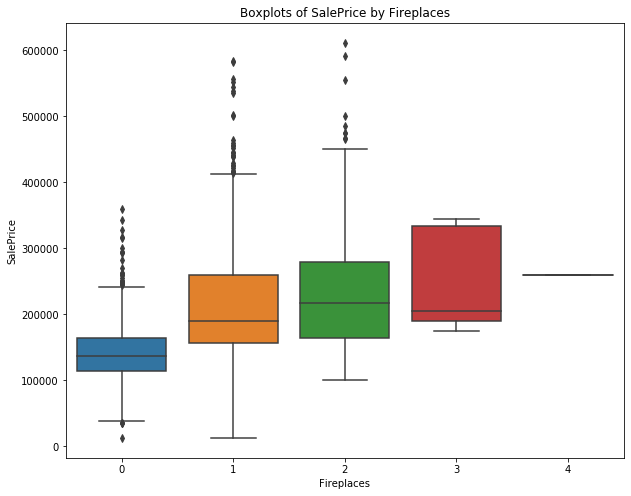

In [70]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Fireplaces', y='SalePrice', data=train)
plt.title('Boxplots of SalePrice by Fireplaces')
plt.savefig('../images/21_boxplot_fireplaces.png', transparent=True)

**Garage Yr Blt**

In [71]:
train['Garage Yr Blt'].dtype

dtype('float64')

In [72]:
train['Garage Yr Blt'].value_counts(dropna=False).sort_index()

1895.0      1
1896.0      1
1900.0      3
1910.0      5
1914.0      2
         ... 
2008.0     42
2009.0     17
2010.0      2
2207.0      1
NaN       114
Name: Garage Yr Blt, Length: 101, dtype: int64

In [73]:
train['Garage Yr Blt'] = train['Garage Yr Blt'].astype('Int64')

In [74]:
train['Garage Yr Blt'].value_counts(dropna=False).sort_index()

1895.0      1
1896.0      1
1900.0      3
1910.0      5
1914.0      2
         ... 
2008.0     42
2009.0     17
2010.0      2
2207.0      1
NaN       114
Name: Garage Yr Blt, Length: 101, dtype: int64

Handling possibly erroneous data

In [75]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train.loc[train['Garage Yr Blt'] == 2207, :])

            PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
Id                                                                            
2261  916384070           20        RL          68.0      8298   Pave   NaN   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
Id                                                                         
2261       IR1          HLS    AllPub     Inside        Gtl       Timber   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
Id                                                                 
2261        Norm        Norm      1Fam      1Story             8   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
Id                                                                    
2261             5        2006            2007        Hip   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
Id                                        

In [76]:
train.loc[train['Garage Yr Blt'] == 2207, 'Garage Yr Blt']

Id
2261    2207
Name: Garage Yr Blt, dtype: Int64

In [77]:
train.loc[train['Garage Yr Blt'] == 2207, 'Garage Yr Blt'] = 2007

In [78]:
train.loc[2261, 'Garage Yr Blt']

2007

In [79]:
garage_yr_blt_missing_idx = train.loc[train['Garage Yr Blt'].isnull()].index.tolist()

In [80]:
print(sorted(garage_yr_blt_missing_idx))

[28, 120, 130, 131, 172, 187, 204, 207, 216, 218, 281, 325, 330, 393, 536, 615, 698, 701, 710, 727, 728, 753, 754, 763, 764, 766, 781, 853, 894, 898, 900, 943, 1132, 1135, 1221, 1260, 1278, 1292, 1296, 1299, 1306, 1318, 1319, 1332, 1366, 1370, 1376, 1415, 1417, 1486, 1487, 1492, 1501, 1502, 1503, 1504, 1505, 1514, 1515, 1516, 1521, 1547, 1550, 1591, 1600, 1601, 1807, 1808, 1902, 1903, 1948, 1951, 1968, 2034, 2046, 2083, 2084, 2127, 2174, 2187, 2195, 2235, 2237, 2243, 2278, 2288, 2290, 2369, 2471, 2496, 2556, 2621, 2628, 2635, 2668, 2670, 2671, 2690, 2693, 2697, 2745, 2820, 2821, 2824, 2837, 2842, 2846, 2853, 2875, 2880, 2882, 2883, 2914, 2920]


In [81]:
indices = train['Garage Yr Blt'].value_counts(dropna=False).sort_index().index
values = train['Garage Yr Blt'].value_counts(dropna=False).sort_index().values

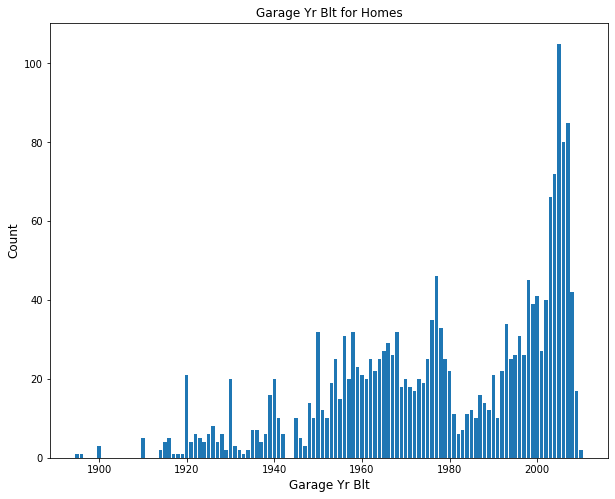

In [82]:
plt.figure(figsize=(10, 8))
plt.bar(indices, values)

plt.title('Garage Yr Blt for Homes', fontsize=12)
plt.xlabel('Garage Yr Blt', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/22_bar_garage_yr_blt.png', transparent=True)

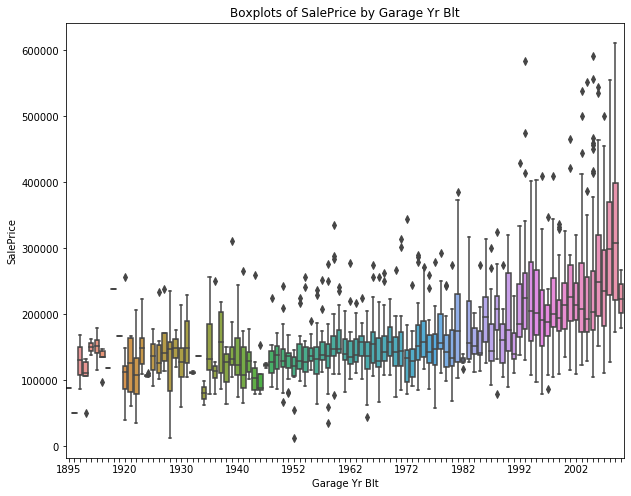

In [83]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Garage Yr Blt', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Garage Yr Blt')

for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.savefig('../images/23_boxplot_garage_yr_blt.png', transparent=True)

**Garage Cars**

In [84]:
train['Garage Cars'].dtype

dtype('float64')

In [85]:
train['Garage Cars'].value_counts(dropna=False).sort_index()

0.0     113
1.0     524
2.0    1135
3.0     262
4.0      13
5.0       1
NaN       1
Name: Garage Cars, dtype: int64

In [86]:
train['Garage Cars'] = train['Garage Cars'].astype('Int64')

In [87]:
train['Garage Cars'].value_counts(dropna=False).sort_index()

0       113
1       524
2      1135
3       262
4        13
5         1
NaN       1
Name: Garage Cars, dtype: int64

In [88]:
train[train['Garage Cars'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909.0


In [89]:
idx = train['Garage Cars'].value_counts().sort_index().index
val = train['Garage Cars'].value_counts().sort_index().values

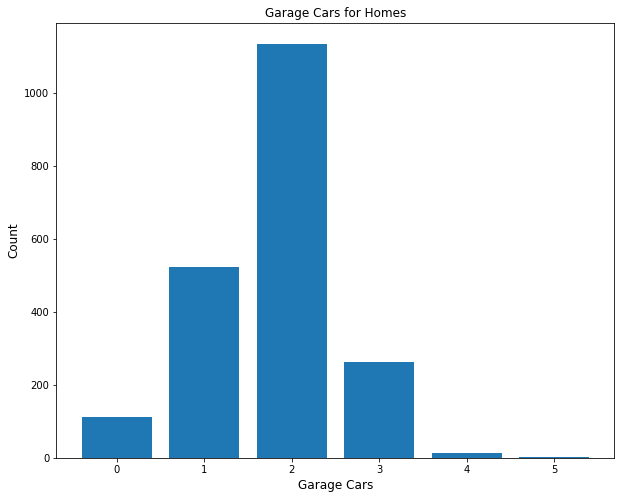

In [90]:
plt.figure(figsize=(10, 8))
plt.bar(idx, val)

plt.title('Garage Cars for Homes', fontsize=12)
plt.xlabel('Garage Cars', fontsize=12)
plt.xticks([i for i in range(len(idx))], idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/24_bar_garage_cars.png', transparent=True)

Observation: In decreasing order of counts of Garage Cars: 2, 1, 3, 0, 4, 5

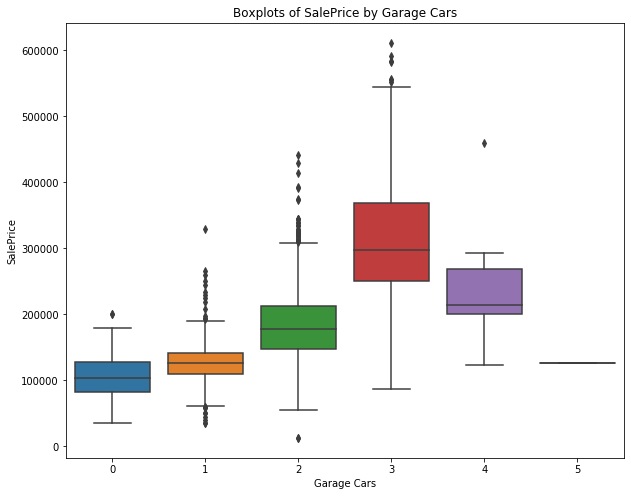

In [91]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Garage Cars', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Garage Cars')
plt.savefig('../images/25_boxplot_garage_cars.png', transparent=True)

**Mo Sold**

In [92]:
train['Mo Sold'].dtype

dtype('int64')

In [93]:
train['Mo Sold'].value_counts(dropna=False).sort_index()

1      78
2     104
3     168
4     208
5     257
6     352
7     303
8     167
9     109
10    122
11    103
12     78
Name: Mo Sold, dtype: int64

In [94]:
def get_nominal_value_str(value_int):
    value_str = str(value_int)
    if len(value_str) == 1:
        return "0" + value_str
    else:
        return value_str

train['Mo Sold'] = train['Mo Sold'].map(get_nominal_value_str)
train['Mo Sold'] = pd.Categorical(train['Mo Sold']) 

In [95]:
train['Mo Sold'].map(get_nominal_value_str).value_counts(dropna=False).sort_index()

01     78
02    104
03    168
04    208
05    257
06    352
07    303
08    167
09    109
10    122
11    103
12     78
Name: Mo Sold, dtype: int64

In [96]:
idx = train['Mo Sold'].value_counts().sort_index().index
val = train['Mo Sold'].value_counts().sort_index().values

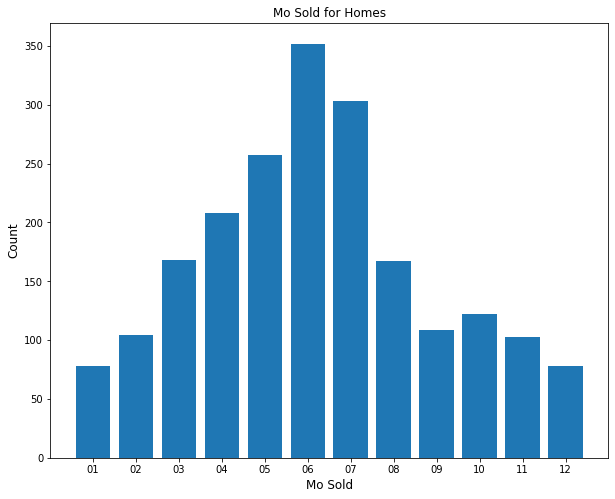

In [97]:
plt.figure(figsize=(10, 8))
plt.bar(idx, val)

plt.title('Mo Sold for Homes', fontsize=12)
plt.xlabel('Mo Sold', fontsize=12)
plt.xticks([i for i in range(len(idx))], idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/26_bar_mo_sold.png', transparent=True)

Observation: In decreasing order of counts of Mo Sold: 06, 07, 05, 04, 03, 08, 10, 09, 02, 11, 01, 12

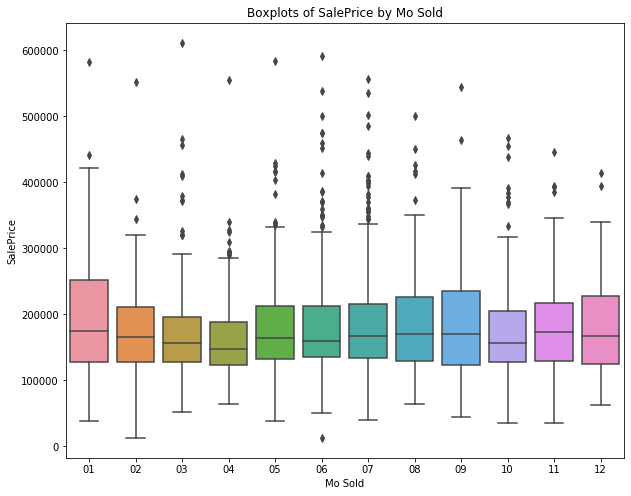

In [98]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Mo Sold', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Mo Sold')
plt.savefig('../images/27_boxplot_mo_sold.png', transparent=True)

**Yr Sold**

In [99]:
train['Yr Sold'].dtype

dtype('int64')

In [100]:
train['Yr Sold'].value_counts(dropna=False).sort_index()

2006    438
2007    497
2008    434
2009    446
2010    234
Name: Yr Sold, dtype: int64

In [101]:
train['Yr Sold'].value_counts(dropna=False).sort_index()

2006    438
2007    497
2008    434
2009    446
2010    234
Name: Yr Sold, dtype: int64

In [102]:
train['Yr Sold'] = pd.Categorical(train['Yr Sold'])

In [103]:
idx = train['Yr Sold'].value_counts().sort_index().index
val = train['Yr Sold'].value_counts().sort_index().values

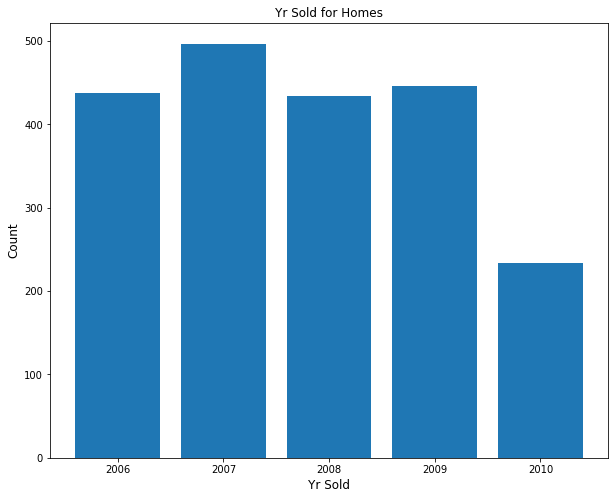

In [104]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Yr Sold for Homes', fontsize=12)
plt.xlabel('Yr Sold', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/28_bar_yr_sold.png', transparent=True)

Observation: In decreasing order of counts of Yr Sold: 2007, 2009, 2006, 2008, 2010

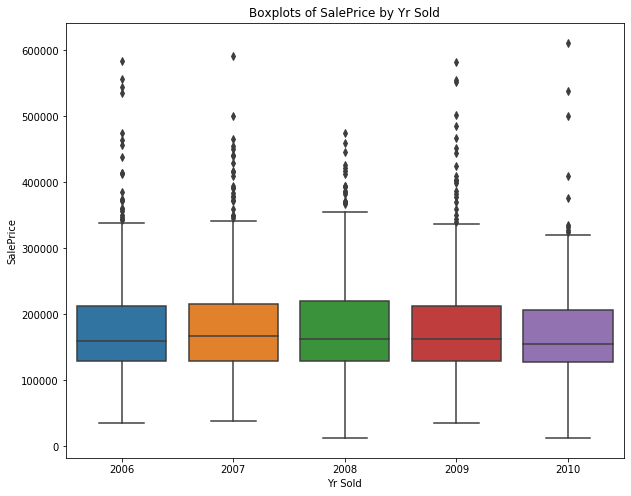

In [105]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Yr Sold', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Yr Sold')
plt.savefig('../images/29_boxplot_yr_sold.png', transparent=True)

### Continuous Features

In [106]:
continuous_features = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
                       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
                       'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
                       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']

**Lot Frontage**

In [107]:
train['Lot Frontage'].dtype

dtype('float64')

/home/dev/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dev/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


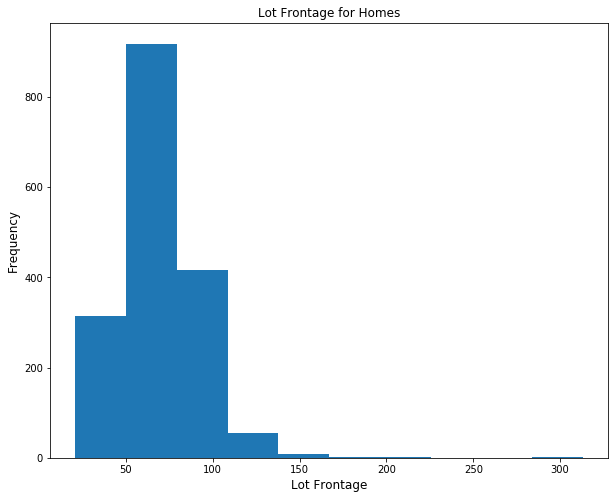

In [108]:
plt.figure(figsize=(10, 8))
plt.hist(train['Lot Frontage'])

plt.title('Lot Frontage for Homes', fontsize=12)
plt.xlabel('Lot Frontage', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.savefig('../images/30_hist_lot_frontage.png', transparent=True)

Observation: Non-normal distribution which is right-skewed.

**Lot Area**

In [109]:
train['Lot Area'].dtype

dtype('int64')

In [110]:
train['Lot Area'] = train['Lot Area'].astype('float')

In [111]:
train['Lot Area'][train['Lot Area'].isnull()]

Series([], Name: Lot Area, dtype: float64)

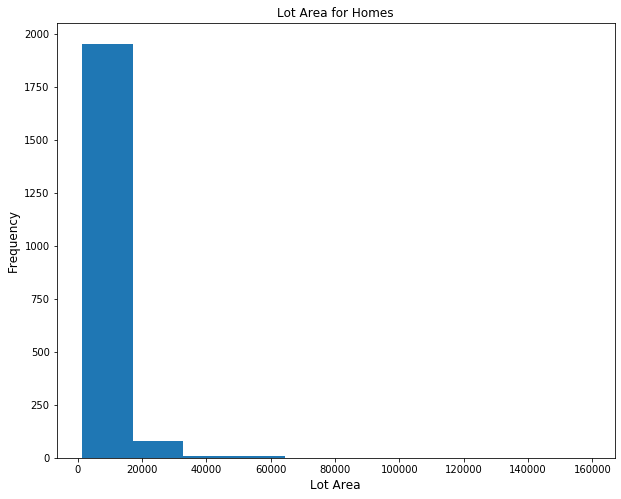

In [112]:
plt.figure(figsize=(10, 8))
plt.hist(train['Lot Area'])

plt.title('Lot Area for Homes', fontsize=12)
plt.xlabel('Lot Area', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.savefig('../images/31_hist_lot_area.png', transparent=True)

Observation: Non-normal distribution which is right-skewed.

**Mas Vnr Area**

In [113]:
train['Mas Vnr Area'].dtype

dtype('float64')

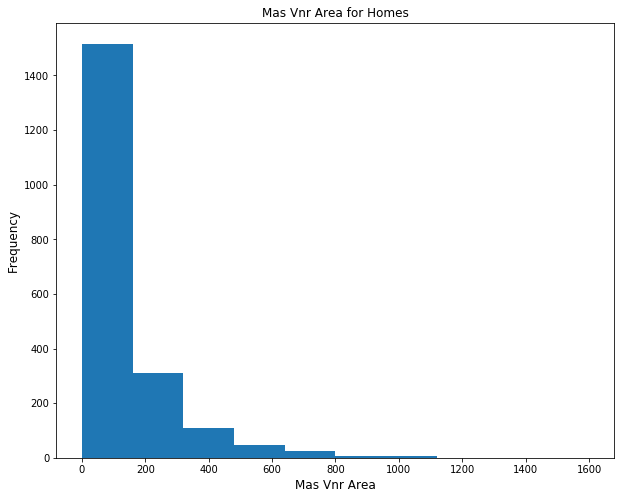

In [114]:
plt.figure(figsize=(10, 8))
plt.hist(train['Mas Vnr Area'])

plt.title('Mas Vnr Area for Homes', fontsize=12)
plt.xlabel('Mas Vnr Area', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.savefig('../images/32_hist_lot_area.png', transparent=True)

Observation: Non-normal distribution which is right-skewed.

**BsmtFin SF 1**

In [115]:
train['BsmtFin SF 1'].dtype

dtype('float64')

In [116]:
train['BsmtFin SF 1'][train['BsmtFin SF 1'].isnull()]

Id
1342   NaN
Name: BsmtFin SF 1, dtype: float64

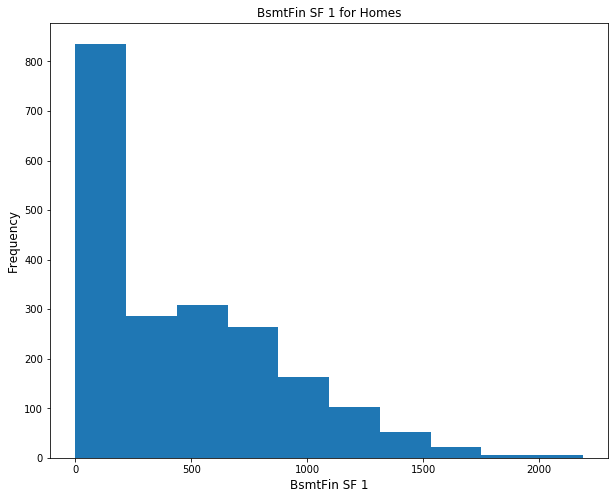

In [117]:
plt.figure(figsize=(10, 8))
plt.hist(train['BsmtFin SF 1'])

plt.title('BsmtFin SF 1 for Homes', fontsize=12)
plt.xlabel('BsmtFin SF 1', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.savefig('../images/33_hist_bsmtfin_sf_1.png', transparent=True)

Observation: Non-normal distribution which is right-skewed.

**BsmtFin SF 2**

In [118]:
train['BsmtFin SF 2'].dtype

dtype('float64')

In [119]:
train['BsmtFin SF 2'][train['BsmtFin SF 2'].isnull()]

Id
1342   NaN
Name: BsmtFin SF 2, dtype: float64

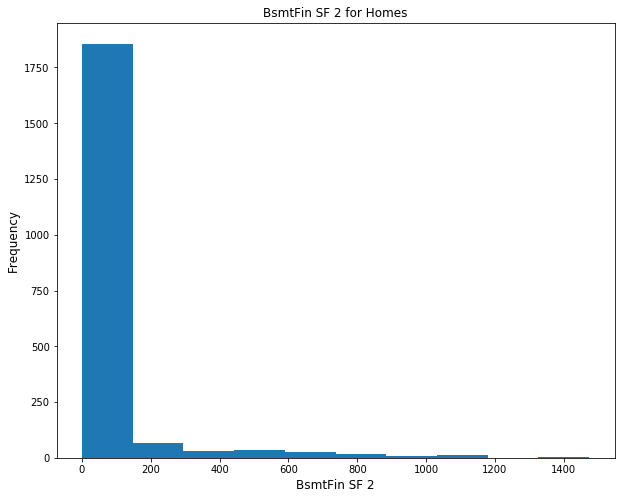

In [120]:
plt.figure(figsize=(10, 8))
plt.hist(train['BsmtFin SF 2'])

plt.title('BsmtFin SF 2 for Homes', fontsize=12)
plt.xlabel('BsmtFin SF 2', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.savefig('../images/34_hist_bsmtfin_sf_2.png', transparent=True)

Observation: Non-normal distribution which is right-skewed.

**Bsmt Unf SF**

In [121]:
train['Bsmt Unf SF'].dtype

dtype('float64')

In [122]:
train['Bsmt Unf SF'][train['Bsmt Unf SF'].isnull()]

Id
1342   NaN
Name: Bsmt Unf SF, dtype: float64

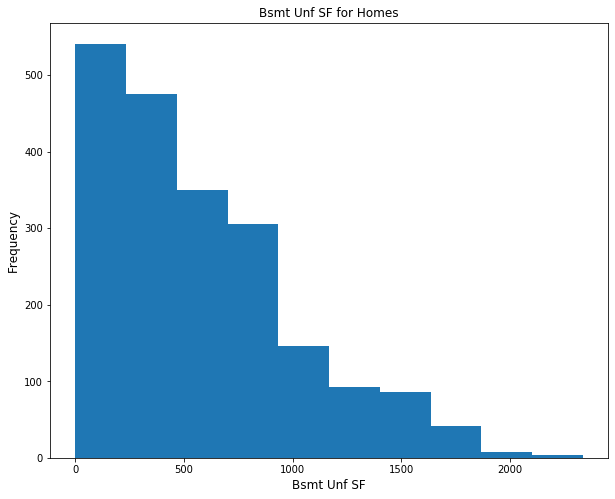

In [123]:
plt.figure(figsize=(10, 8))
plt.hist(train['Bsmt Unf SF'])

plt.title('Bsmt Unf SF for Homes', fontsize=12)
plt.xlabel('Bsmt Unf SF', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.savefig('../images/35_hist_bsmt_unf_sf.png', transparent=True)

Observation: Non-normal distribution which is right-skewed.

**Total Bsmt SF**

In [124]:
train['Total Bsmt SF'].dtype

dtype('float64')

In [125]:
train['Total Bsmt SF'][train['Total Bsmt SF'].isnull()]

Id
1342   NaN
Name: Total Bsmt SF, dtype: float64

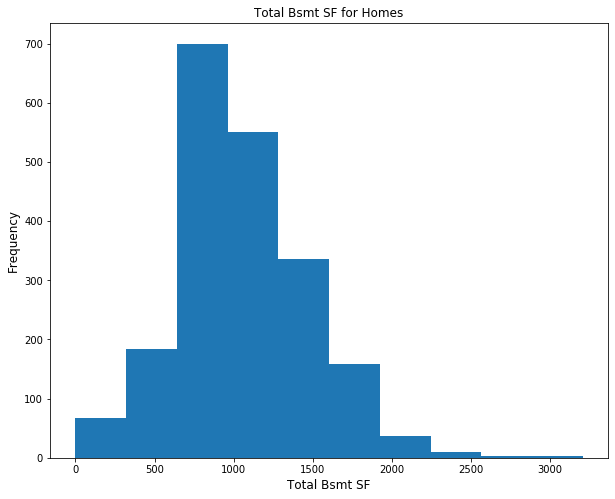

In [126]:
plt.figure(figsize=(10, 8))
plt.hist(train['Total Bsmt SF'])

plt.title('Total Bsmt SF for Homes', fontsize=12)
plt.xlabel('Total Bsmt SF', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.savefig('../images/36_hist_total_bsmt_sf.png', transparent=True)

Observation: Non-normal distribution which is right-skewed.

**1st Flr SF**

In [127]:
train['1st Flr SF'] = train['1st Flr SF'].astype('float')

In [128]:
train['1st Flr SF'][train['1st Flr SF'].isnull()]

Series([], Name: 1st Flr SF, dtype: float64)

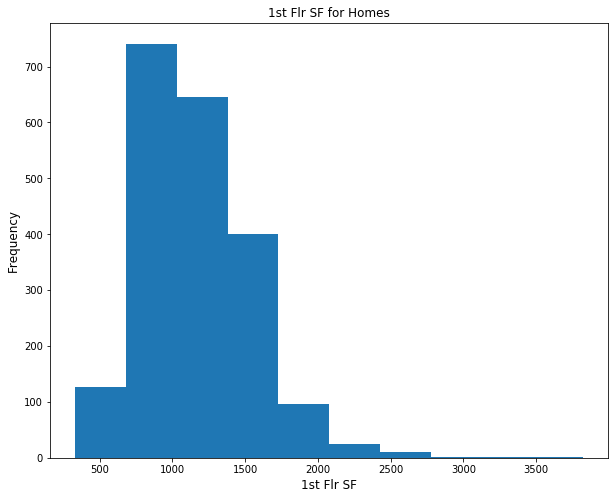

In [129]:
plt.figure(figsize=(10, 8))
plt.hist(train['1st Flr SF'])

plt.title('1st Flr SF for Homes', fontsize=12)
plt.xlabel('1st Flr SF', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.savefig('../images/37_hist_1st_flr_sf.png', transparent=True)

Observation: Non-normal distribution which is right-skewed.

**2nd Flr SF**

In [130]:
train['2nd Flr SF'] = train['2nd Flr SF'].astype('float')

In [131]:
train['2nd Flr SF'][train['2nd Flr SF'].isnull()]

Series([], Name: 2nd Flr SF, dtype: float64)

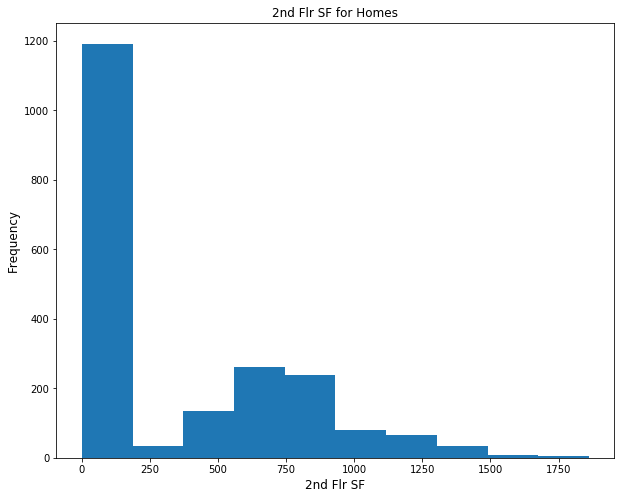

In [132]:
plt.figure(figsize=(10, 8))
plt.hist(train['2nd Flr SF'])

plt.title('2nd Flr SF for Homes', fontsize=12)
plt.xlabel('2nd Flr SF', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.savefig('../images/38_hist_2nd_flr_sf.png', transparent=True)

Observation: Non-normal distribution which exhibits bi-modality.

**Low Qual Fin SF**

In [133]:
train['Low Qual Fin SF'] = train['Low Qual Fin SF'].astype('float')

In [134]:
train['Low Qual Fin SF'][train['Low Qual Fin SF'].isnull()]

Series([], Name: Low Qual Fin SF, dtype: float64)

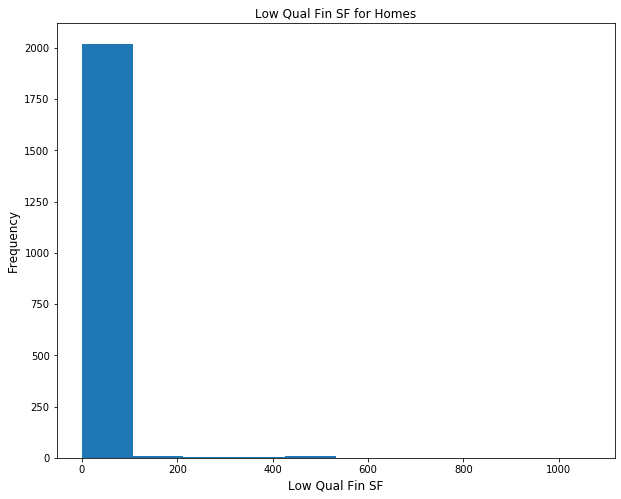

In [135]:
plt.figure(figsize=(10, 8))
plt.hist(train['Low Qual Fin SF'])

plt.title('Low Qual Fin SF for Homes', fontsize=12)
plt.xlabel('Low Qual Fin SF', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.savefig('../images/39_hist_low_qual_fin_sf.png', transparent=True)

Observation: Non-normal distribution which is right-skewed.

**Gr Liv Area**

In [136]:
train['Gr Liv Area'] = train['Gr Liv Area'].astype('float')

In [137]:
train['Gr Liv Area'][train['Gr Liv Area'].isnull()]

Series([], Name: Gr Liv Area, dtype: float64)

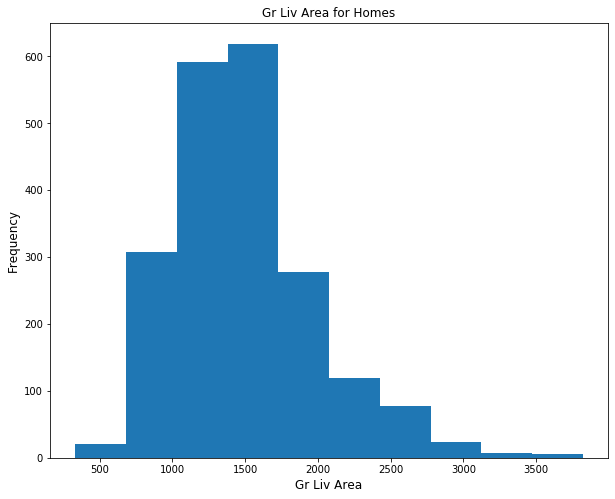

In [138]:
plt.figure(figsize=(10, 8))
plt.hist(train['Gr Liv Area'])

plt.title('Gr Liv Area for Homes', fontsize=12)
plt.xlabel('Gr Liv Area', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.savefig('../images/39_hist_gr_liv_area.png', transparent=True)

Observation: Non-normal distribution which is right-skewed.

**Garage Area**

In [139]:
train['Garage Area'].dtype

dtype('float64')

In [140]:
garage_area_missing_idx = train[train['Garage Area'].isnull()].index.tolist()

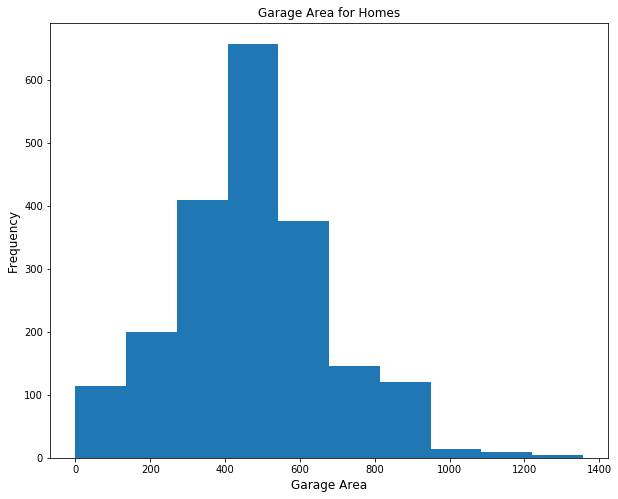

In [141]:
plt.figure(figsize=(10, 8))
plt.hist(train['Garage Area'])

plt.title('Garage Area for Homes', fontsize=12)
plt.xlabel('Garage Area', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.savefig('../images/40_hist_garage_area.png', transparent=True)

Observation: Non-normal distribution which is right-skewed.

**Wood Deck SF**

In [142]:
train['Wood Deck SF'].dtype

dtype('int64')

In [143]:
train['Wood Deck SF'] = train['Wood Deck SF'].astype('float')

In [144]:
train['Wood Deck SF'][train['Wood Deck SF'].isnull()]

Series([], Name: Wood Deck SF, dtype: float64)

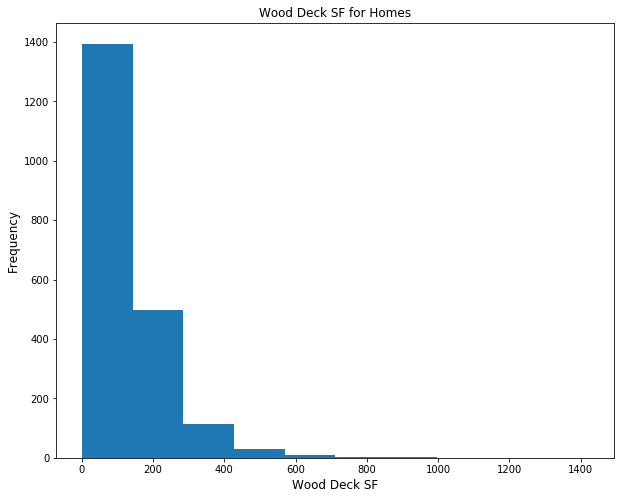

In [145]:
plt.figure(figsize=(10, 8))
plt.hist(train['Wood Deck SF'])

plt.title('Wood Deck SF for Homes', fontsize=12)
plt.xlabel('Wood Deck SF', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.savefig('../images/41_hist_wood_deck_sf.png', transparent=True)

Observation: Non-normal distribution which is right-skewed.

**Open Porch SF**

In [146]:
train['Open Porch SF'].dtype

dtype('int64')

In [147]:
train['Open Porch SF'] = train['Open Porch SF'].astype('float')

In [148]:
train['Open Porch SF'][train['Open Porch SF'].isnull()]

Series([], Name: Open Porch SF, dtype: float64)

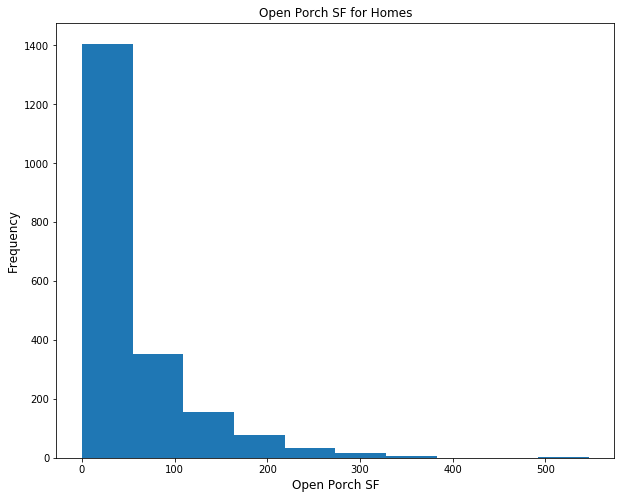

In [149]:
plt.figure(figsize=(10, 8))
plt.hist(train['Open Porch SF'])

plt.title('Open Porch SF for Homes', fontsize=12)
plt.xlabel('Open Porch SF', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.savefig('../images/42_hist_open_porch_sf.png', transparent=True)

Observation: Non-normal distribution which is right-skewed.

**Enclosed Porch**

In [150]:
train['Enclosed Porch'].dtype

dtype('int64')

In [151]:
train['Enclosed Porch'] = train['Enclosed Porch'].astype('float')

In [152]:
train['Enclosed Porch'][train['Enclosed Porch'].isnull()]

Series([], Name: Enclosed Porch, dtype: float64)

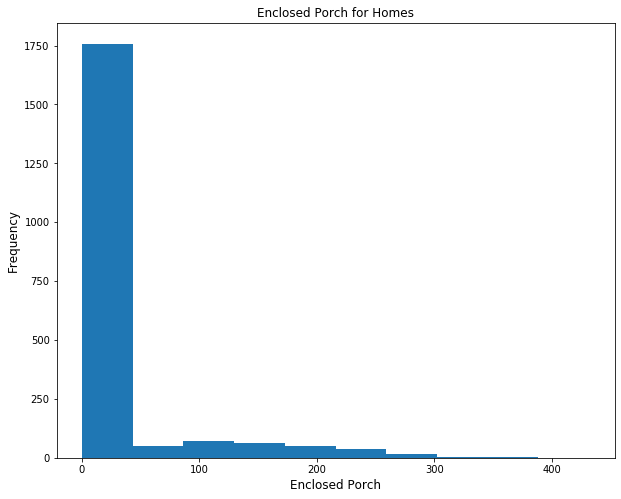

In [153]:
plt.figure(figsize=(10, 8))
plt.hist(train['Enclosed Porch'])

plt.title('Enclosed Porch for Homes', fontsize=12)
plt.xlabel('Enclosed Porch', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.savefig('../images/43_hist_enclosed_porch.png', transparent=True)

Observation: Non-normal distribution which is right-skewed.

**3Ssn Porch**

In [154]:
train['3Ssn Porch'].dtype

dtype('int64')

In [155]:
train['3Ssn Porch'] = train['3Ssn Porch'].astype('float')

In [156]:
train['3Ssn Porch'][train['3Ssn Porch'].isnull()]

Series([], Name: 3Ssn Porch, dtype: float64)

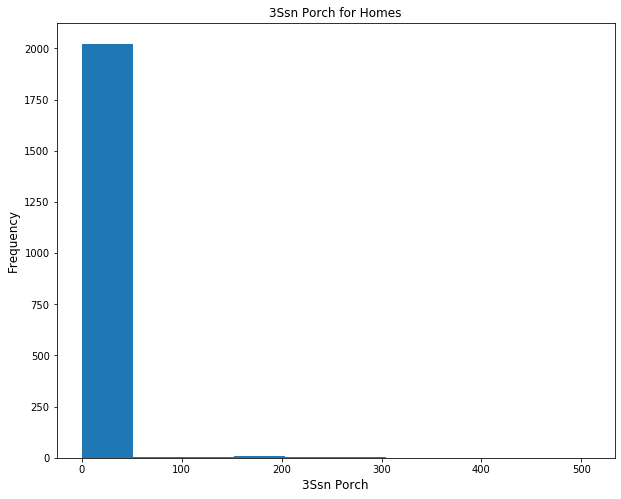

In [157]:
plt.figure(figsize=(10, 8))
plt.hist(train['3Ssn Porch'])

plt.title('3Ssn Porch for Homes', fontsize=12)
plt.xlabel('3Ssn Porch', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.savefig('../images/44_hist_3ssn_porch.png', transparent=True)

Observation: Non-normal distribution which is right-skewed.

**Screen Porch**

In [158]:
train['Screen Porch'].dtype

dtype('int64')

In [159]:
train['Screen Porch'] = train['Screen Porch'].astype('float')

In [160]:
train['Screen Porch'][train['Screen Porch'].isnull()]

Series([], Name: Screen Porch, dtype: float64)

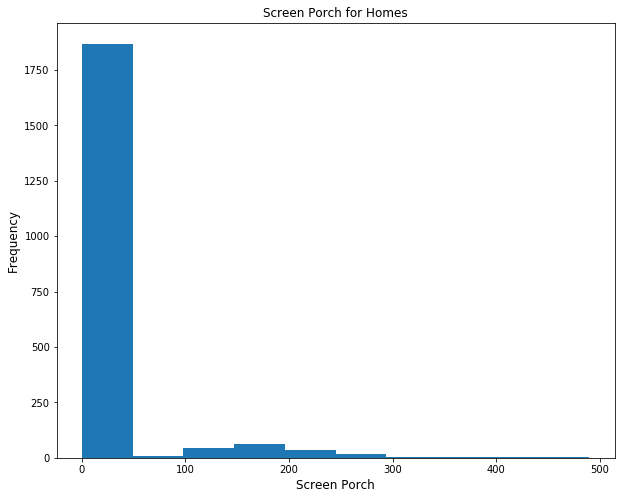

In [161]:
plt.figure(figsize=(10, 8))
plt.hist(train['Screen Porch'])

plt.title('Screen Porch for Homes', fontsize=12)
plt.xlabel('Screen Porch', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.savefig('../images/45_hist_screen_porch.png', transparent=True)

Observation: Non-normal distribution which is right-skewed.

**Pool Area**

In [162]:
train['Pool Area'].dtype

dtype('int64')

In [163]:
train['Pool Area'] = train['Screen Porch'].astype('float')

In [164]:
train['Pool Area'][train['Pool Area'].isnull()]

Series([], Name: Pool Area, dtype: float64)

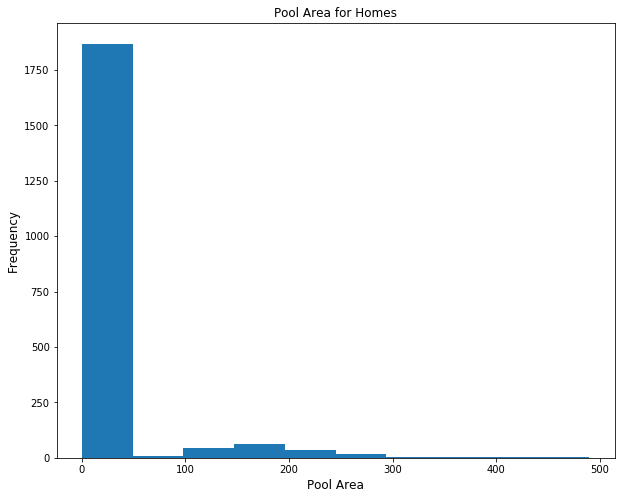

In [165]:
plt.figure(figsize=(10, 8))
plt.hist(train['Pool Area'])

plt.title('Pool Area for Homes', fontsize=12)
plt.xlabel('Pool Area', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.savefig('../images/46_hist_pool_area.png', transparent=True)

Observation: Non-normal distribution which is right-skewed.

**Misc Val**

In [166]:
train['Misc Val'].dtype

dtype('int64')

In [167]:
train['Misc Val'] = train['Misc Val'].astype('float')

In [168]:
train['Misc Val'][train['Misc Val'].isnull()]

Series([], Name: Misc Val, dtype: float64)

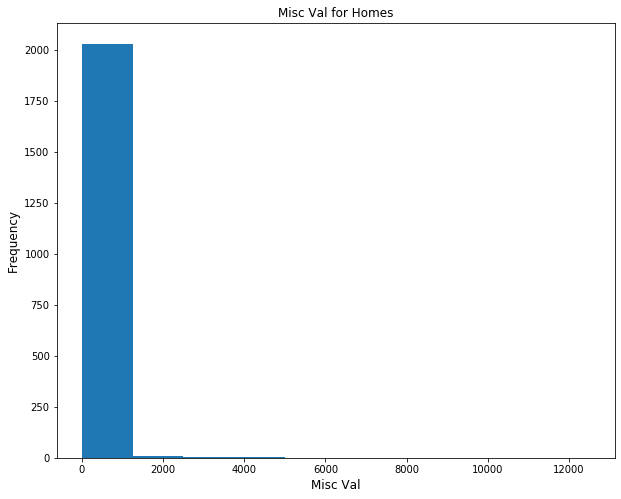

In [169]:
plt.figure(figsize=(10, 8))
plt.hist(train['Misc Val'])

plt.title('Misc Val for Homes', fontsize=12)
plt.xlabel('Misc Val', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.savefig('../images/47_hist_misc_val.png', transparent=True)

Observation: Non-normal distribution which is right-skewed.

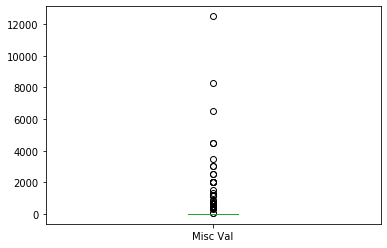

In [170]:
train['Misc Val'].plot(kind='box')

In [171]:
train['Misc Val'].describe()

count     2049.000000
mean        43.327965
std        434.481342
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      12500.000000
Name: Misc Val, dtype: float64

### Nominal Features

In [172]:
nominal_features = ['PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config',
                    'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
                    'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating',
                    'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type']

**PID**

In [173]:
train['PID'].dtype

dtype('int64')

In [174]:
train['PID'][train['PID'].isnull()]

Series([], Name: PID, dtype: int64)

In [175]:
train['PID'] = pd.Categorical(train['PID'])

In [176]:
# idx = train['PID'].value_counts().sort_index().index
# val = train['PID'].value_counts().sort_index().values

In [177]:
idx = train['PID'].apply(lambda x: str(x)[:3]).value_counts().sort_index().index
val = train['PID'].apply(lambda x: str(x)[:3]).value_counts().sort_index().values

In [178]:
train['PID'].apply(lambda x: str(x)[:3]).value_counts().sort_index()

526     13
527    210
528    322
531     51
532     40
533     78
534    140
535    204
902    116
903    111
904     21
905    132
906     76
907    146
908     79
909    105
910     25
911     23
912      1
913      1
914     26
916     44
921      6
923     72
924      7
Name: PID, dtype: int64

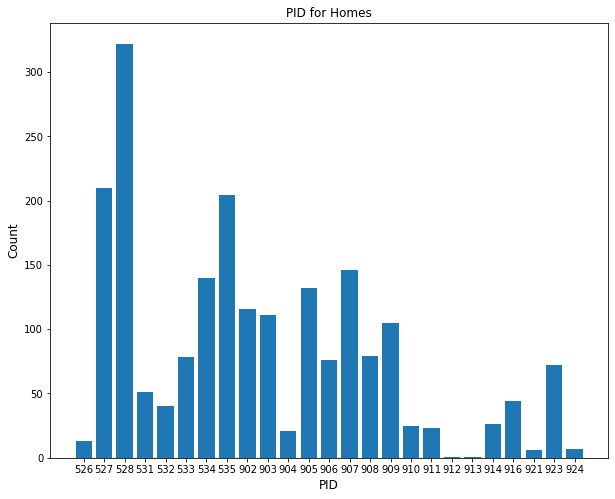

In [179]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('PID for Homes', fontsize=12)
plt.xlabel('PID', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/48_bar_pid.png', transparent=True)

Observation:

In [180]:
train_duplicate = train.copy()
train_duplicate['PID'] = train_duplicate['PID'].apply(lambda x: str(x)[:3])

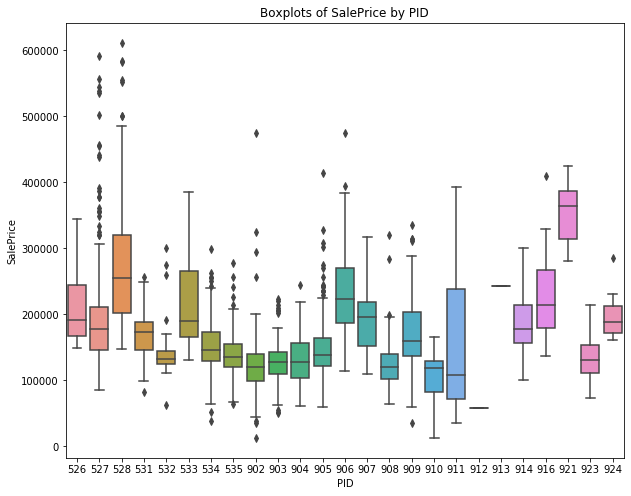

In [181]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='PID', y='SalePrice', data=train_duplicate)
ax.set_title('Boxplots of SalePrice by PID')
plt.savefig('../images/49_boxplot_pid_saleprice.png', transparent=True)

**MS SubClass**

In [182]:
train['MS SubClass'].value_counts(dropna=False).sort_index()

20     769
30     101
40       4
45      11
50     198
60     393
70      90
75      16
80      86
85      28
90      75
120    132
150      1
160     88
180     11
190     46
Name: MS SubClass, dtype: int64

In [183]:
train['MS SubClass'].dtype

dtype('int64')

In [184]:
def get_nominal_value_str(value_int):
    value_str = str(value_int)
    if len(value_str) == 2:
        return "0" + value_str
    elif len(value_str) == 3:
        return value_str
    
train['MS SubClass'] = train['MS SubClass'].map(get_nominal_value_str)
train['MS SubClass'] = pd.Categorical(train['MS SubClass']) 

In [185]:
train['MS SubClass'].value_counts(dropna=False).sort_index()

020    769
030    101
040      4
045     11
050    198
060    393
070     90
075     16
080     86
085     28
090     75
120    132
150      1
160     88
180     11
190     46
Name: MS SubClass, dtype: int64

In [186]:
idx = train['MS SubClass'].value_counts().sort_index().index
val = train['MS SubClass'].value_counts().sort_index().values

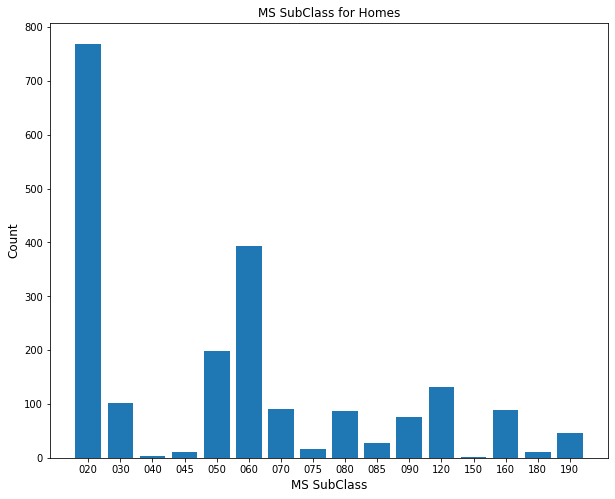

In [187]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('MS SubClass for Homes', fontsize=12)
plt.xlabel('MS SubClass', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/50_bar_ms_subclass.png', transparent=True)

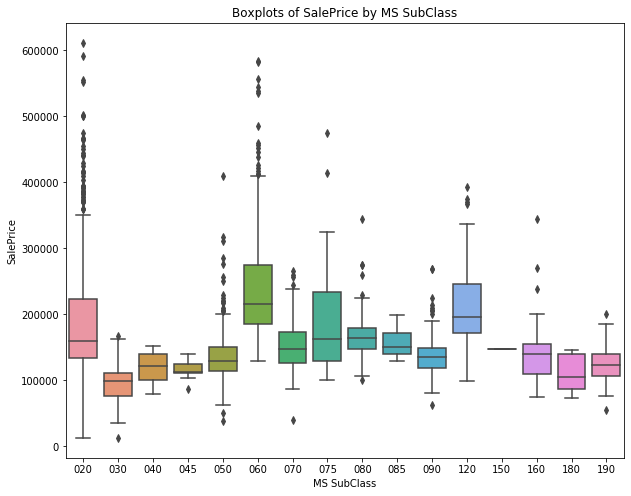

In [188]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='MS SubClass', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by MS SubClass')
plt.savefig('../images/51_boxplot_ms_subclass_saleprice.png', transparent=True)

**MS Zoning**

In [189]:
train['MS Zoning'].value_counts(dropna=False).sort_index()

A (agr)       2
C (all)      19
FV          101
I (all)       1
RH           14
RL         1596
RM          316
Name: MS Zoning, dtype: int64

In [190]:
train['MS Zoning'] = pd.Categorical(train['MS Zoning'])

In [191]:
train['MS Zoning'].dtype

CategoricalDtype(categories=['A (agr)', 'C (all)', 'FV', 'I (all)', 'RH', 'RL', 'RM'], ordered=False)

In [192]:
idx = train['MS Zoning'].value_counts().sort_index().index
val = train['MS Zoning'].value_counts().sort_index().values

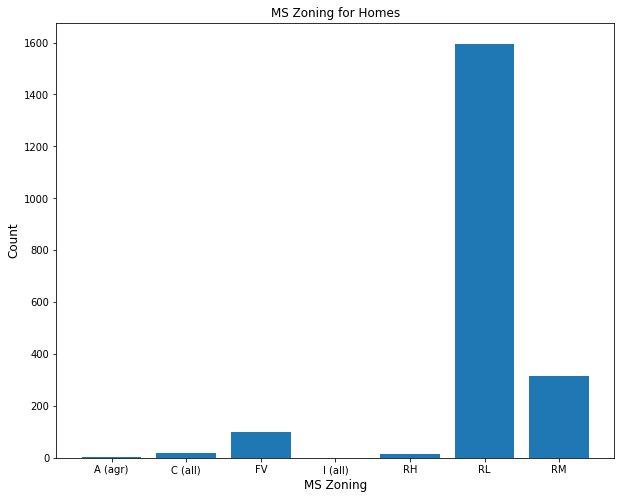

In [193]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('MS Zoning for Homes', fontsize=12)
plt.xlabel('MS Zoning', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/52_bar_ms_zoning.png', transparent=True)

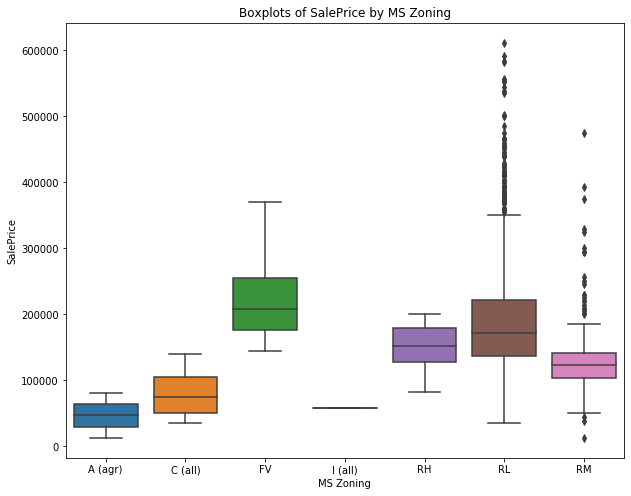

In [194]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='MS Zoning', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by MS Zoning')
plt.savefig('../images/53_boxplot_ms_zoning_saleprice.png', transparent=True)

**Street**

In [195]:
train['Street'].dtype

dtype('O')

In [196]:
train['Street'].value_counts()

Pave    2042
Grvl       7
Name: Street, dtype: int64

In [197]:
train['Street'] = pd.Categorical(train['Street'])

In [198]:
idx = train['Street'].value_counts().sort_index().index
val = train['Street'].value_counts().sort_index().values

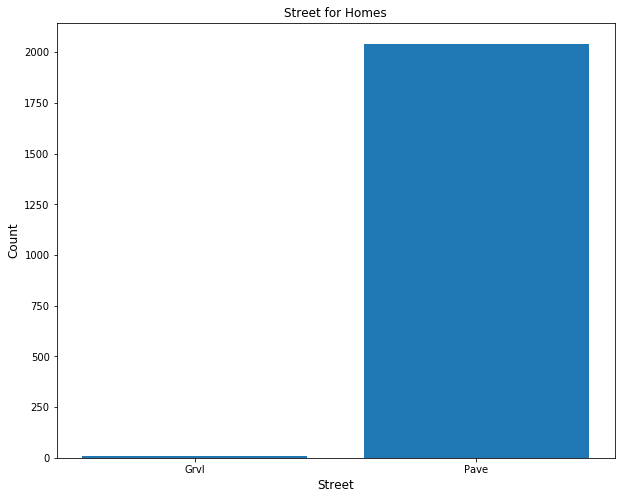

In [199]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Street for Homes', fontsize=12)
plt.xlabel('Street', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/54_bar_street.png', transparent=True)

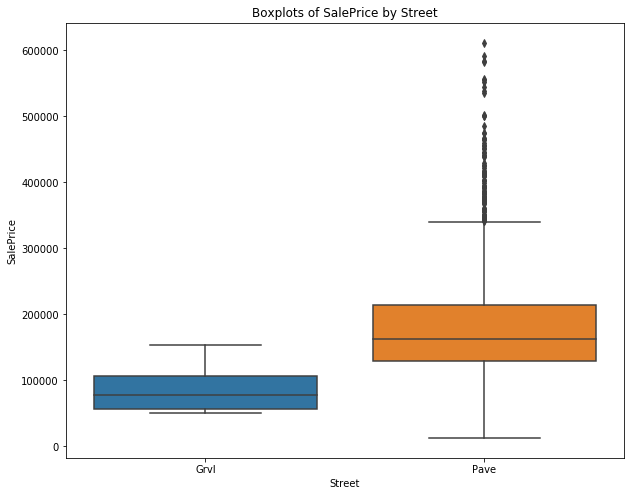

In [200]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Street', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Street')
plt.savefig('../images/55_boxplot_street_saleprice.png', transparent=True)

**Alley**

In [201]:
train['Alley'].dtype

dtype('O')

In [202]:
train['Alley'].value_counts(dropna=False)

NaN     1909
Grvl      85
Pave      55
Name: Alley, dtype: int64

In [203]:
train['Alley'] = train['Alley'].fillna('None')

In [204]:
train['Alley'] = pd.Categorical(train['Alley'])

In [205]:
idx = train['Alley'].value_counts().sort_index().index
val = train['Alley'].value_counts().sort_index().values

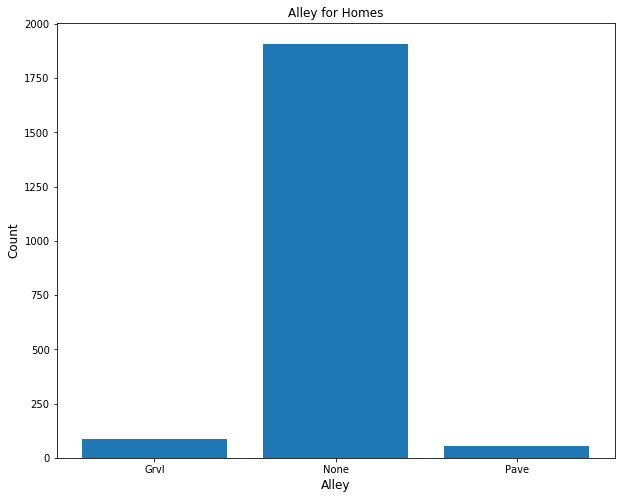

In [206]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Alley for Homes', fontsize=12)
plt.xlabel('Alley', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/56_bar_alley.png', transparent=True)

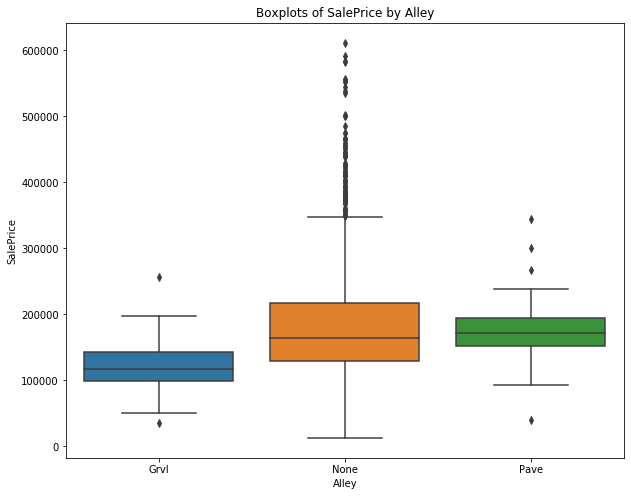

In [207]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Alley', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Alley')
plt.savefig('../images/57_boxplot_alley_saleprice.png', transparent=True)

**Land Contour**

In [208]:
train['Land Contour'].dtype

dtype('O')

In [209]:
train['Land Contour'].value_counts()

Lvl    1843
HLS      85
Bnk      78
Low      43
Name: Land Contour, dtype: int64

In [210]:
train['Land Contour'] = pd.Categorical(train['Land Contour'])

In [211]:
idx = train['Land Contour'].value_counts().sort_index().index
val = train['Land Contour'].value_counts().sort_index().values

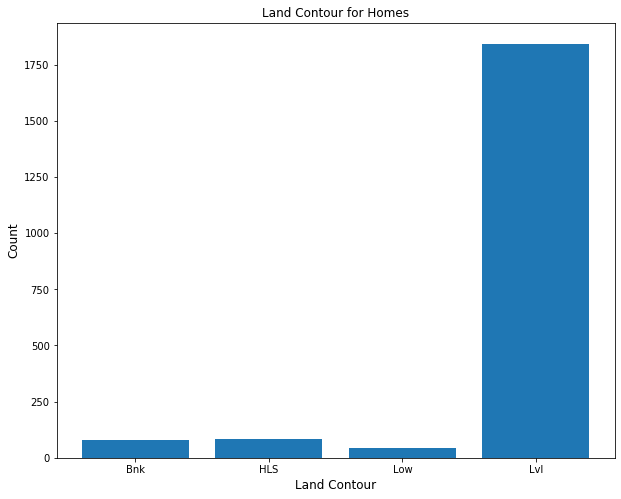

In [212]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Land Contour for Homes', fontsize=12)
plt.xlabel('Land Contour', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/58_bar_land_contour.png', transparent=True)

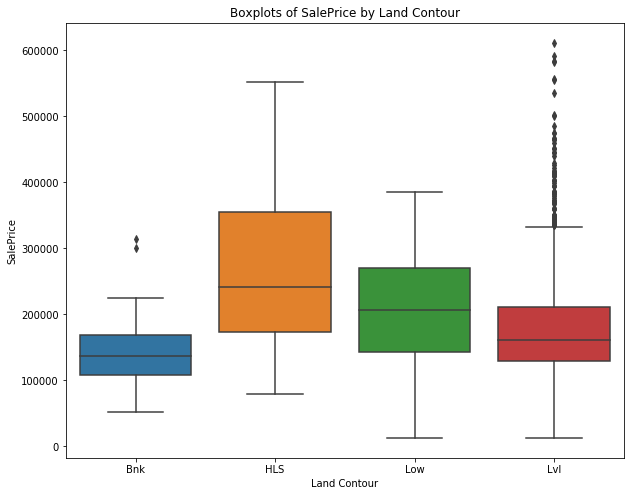

In [213]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Land Contour', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Land Contour')
plt.savefig('../images/59_boxplot_land_contour_saleprice.png', transparent=True)

**Lot Config**

In [214]:
train['Lot Config'].dtype

dtype('O')

In [215]:
train['Lot Config'].value_counts()

Inside     1502
Corner      347
CulDSac     131
FR2          60
FR3           9
Name: Lot Config, dtype: int64

In [216]:
train['Lot Config'] = pd.Categorical(train['Lot Config'])

In [217]:
idx = train['Lot Config'].value_counts().sort_index().index
val = train['Lot Config'].value_counts().sort_index().values

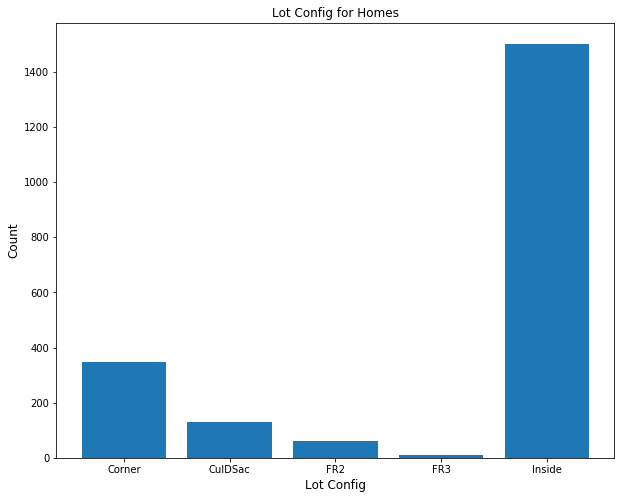

In [218]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Lot Config for Homes', fontsize=12)
plt.xlabel('Lot Config', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/60_bar_lot_config.png', transparent=True)

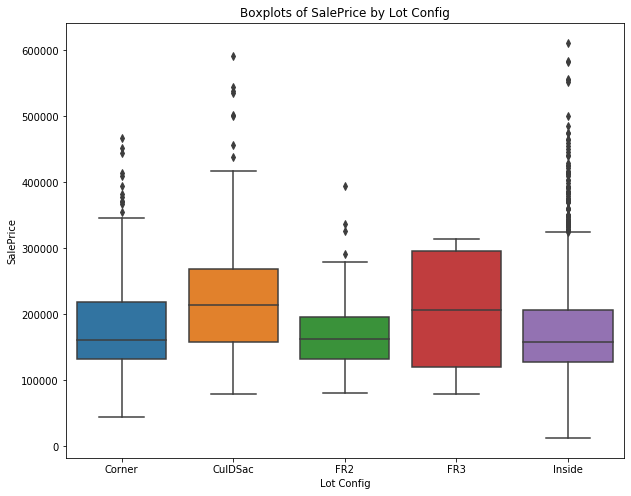

In [219]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Lot Config', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Lot Config')
plt.savefig('../images/61_boxplot_lot_config_saleprice.png', transparent=True)

**Neighborhood**

In [220]:
train['Neighborhood'].dtype

dtype('O')

In [221]:
train['Neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    141
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [222]:
train['Neighborhood'] = pd.Categorical(train['Neighborhood'])

In [223]:
idx = train['Neighborhood'].value_counts().sort_index().index
val = train['Neighborhood'].value_counts().sort_index().values

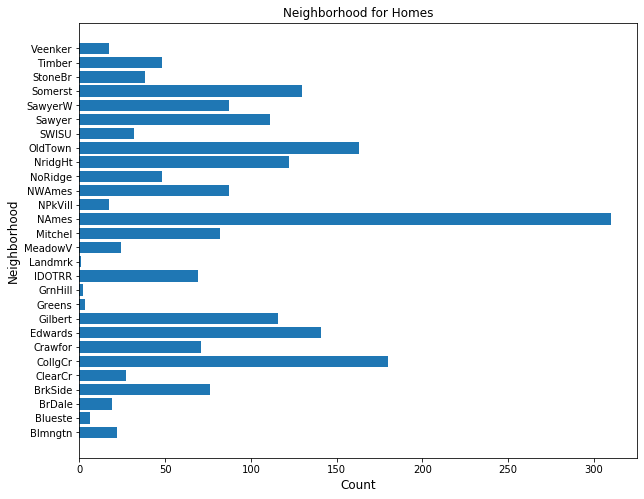

In [224]:
plt.figure(figsize=(10, 8))
plt.barh(np.arange(len(idx)), val)

plt.title('Neighborhood for Homes', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.yticks(np.arange(len(idx)), idx)
plt.xlabel('Count', fontsize=12)
plt.savefig('../images/62_bar_neighborhood.png', transparent=True)

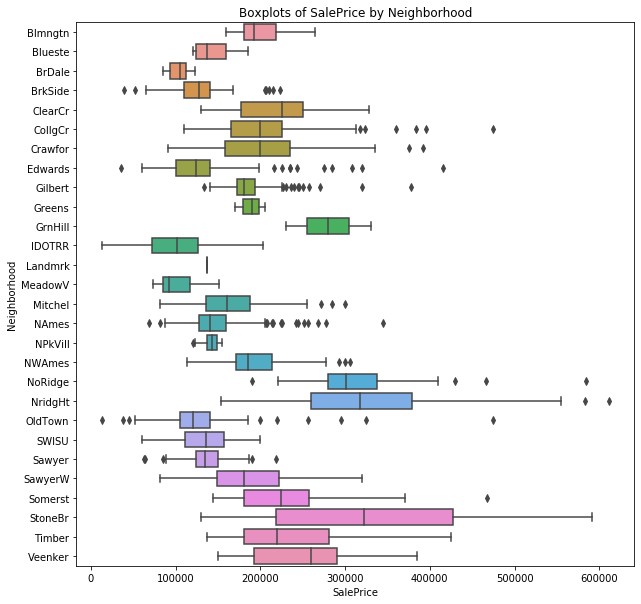

In [225]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(y='Neighborhood', x='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Neighborhood')
plt.savefig('../images/63_boxplot_neighborhood_saleprice.png', transparent=True)

**Condition 1**

In [226]:
train['Condition 1'].dtype

dtype('O')

In [227]:
train['Condition 1'].value_counts()

Norm      1766
Feedr      108
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: Condition 1, dtype: int64

In [228]:
train['Condition 1'] = pd.Categorical(train['Condition 1'])

In [229]:
idx = train['Condition 1'].value_counts().sort_index().index
val = train['Condition 1'].value_counts().sort_index().values

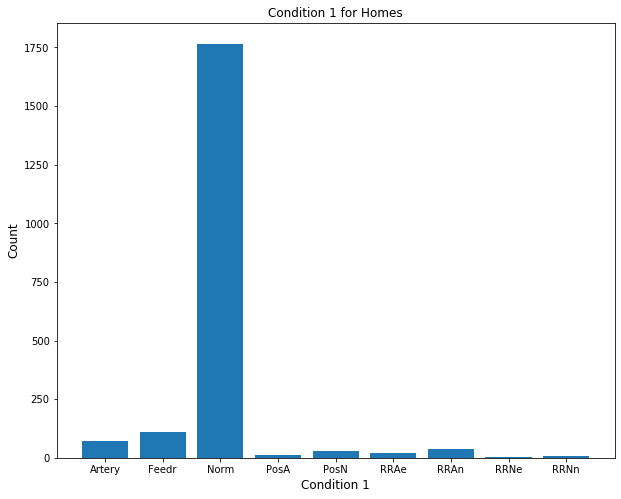

In [230]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Condition 1 for Homes', fontsize=12)
plt.xlabel('Condition 1', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/64_bar_condition_1.png', transparent=True)

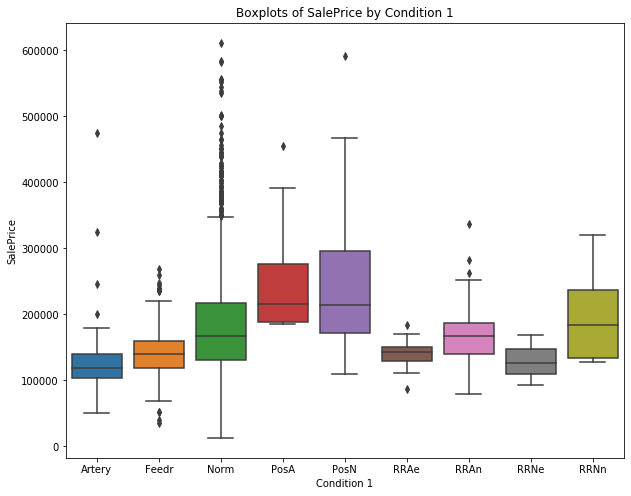

In [231]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Condition 1', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Condition 1')
plt.savefig('../images/65_boxplot_condition_1_saleprice.png', transparent=True)

**Condition 2**

In [232]:
train['Condition 2'].value_counts()

Norm      2023
Feedr       11
Artery       5
PosN         3
PosA         3
RRNn         2
RRAe         1
RRAn         1
Name: Condition 2, dtype: int64

In [233]:
train['Condition 2'] = pd.Categorical(train['Condition 2'])

In [234]:
idx = train['Condition 2'].value_counts().sort_index().index
val = train['Condition 2'].value_counts().sort_index().values

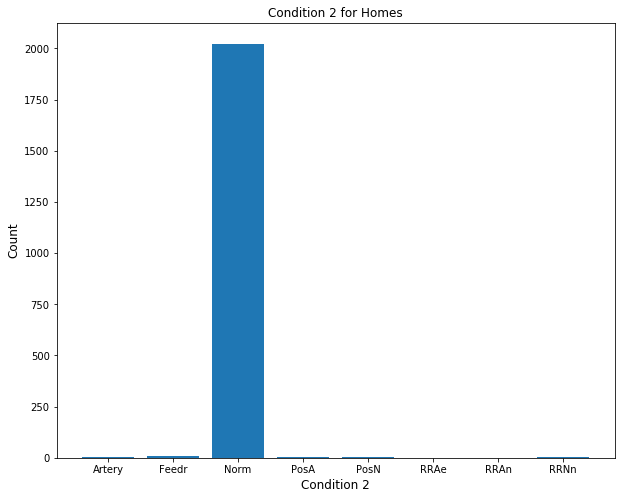

In [235]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Condition 2 for Homes', fontsize=12)
plt.xlabel('Condition 2', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/66_bar_condition_2.png', transparent=True)

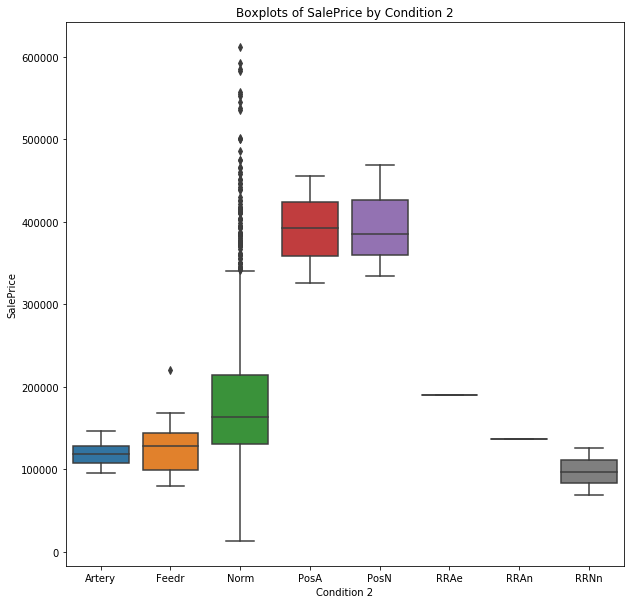

In [236]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='Condition 2', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Condition 2')
plt.savefig('../images/67_boxplot_condition_2_saleprice.png', transparent=True)

**Bldg Type**

In [237]:
train['Bldg Type'].value_counts()

1Fam      1698
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: Bldg Type, dtype: int64

In [238]:
train['Bldg Type'] = pd.Categorical(train['Bldg Type'])

In [239]:
idx = train['Bldg Type'].value_counts().sort_index().index
val = train['Bldg Type'].value_counts().sort_index().values

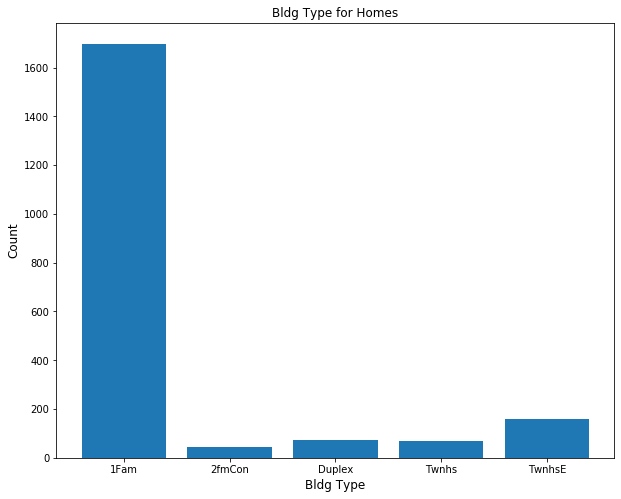

In [240]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Bldg Type for Homes', fontsize=12)
plt.xlabel('Bldg Type', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/68_bar_bldg_type.png', transparent=True)

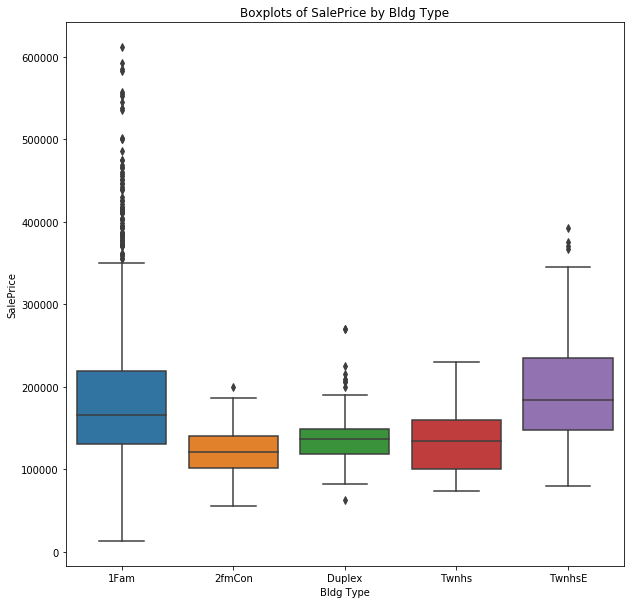

In [241]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='Bldg Type', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Bldg Type')
plt.savefig('../images/69_boxplot_bldg_type_saleprice.png', transparent=True)

**House Style**

In [242]:
train['House Style'].value_counts()

1Story    1058
2Story     597
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: House Style, dtype: int64

In [243]:
train['House Style'] = pd.Categorical(train['House Style'])

In [244]:
idx = train['House Style'].value_counts().sort_index().index
val = train['House Style'].value_counts().sort_index().values

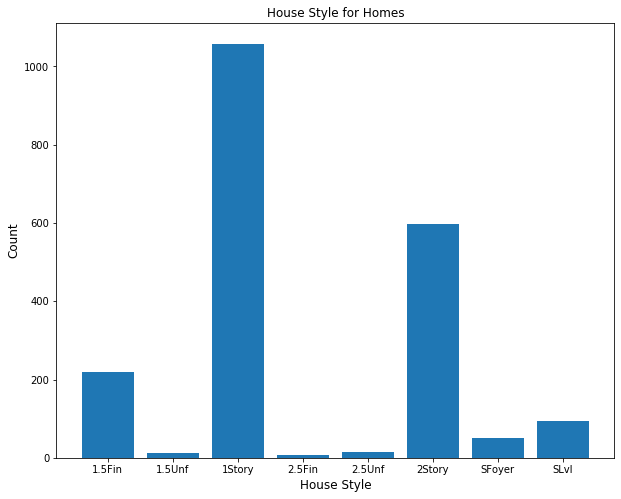

In [245]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('House Style for Homes', fontsize=12)
plt.xlabel('House Style', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/70_bar_house_style.png', transparent=True)

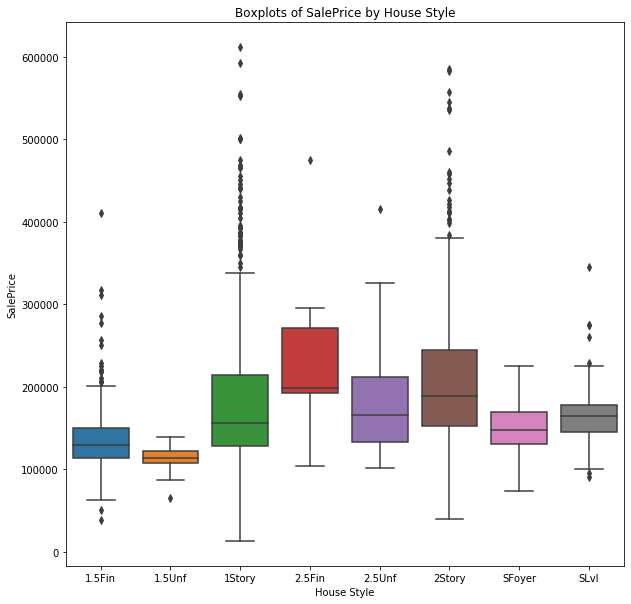

In [246]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='House Style', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by House Style')
plt.savefig('../images/71_boxplot_house_style_saleprice.png', transparent=True)

**Roof Style**

In [247]:
train['Roof Style'].dtype

dtype('O')

In [248]:
train['Roof Style'].value_counts().sort_index()

Flat         13
Gable      1619
Gambrel      12
Hip         395
Mansard       7
Shed          3
Name: Roof Style, dtype: int64

In [249]:
train['Roof Style'] = pd.Categorical(train['Roof Style'])

In [250]:
idx = train['Roof Style'].value_counts().sort_index().index
val = train['Roof Style'].value_counts().sort_index().values

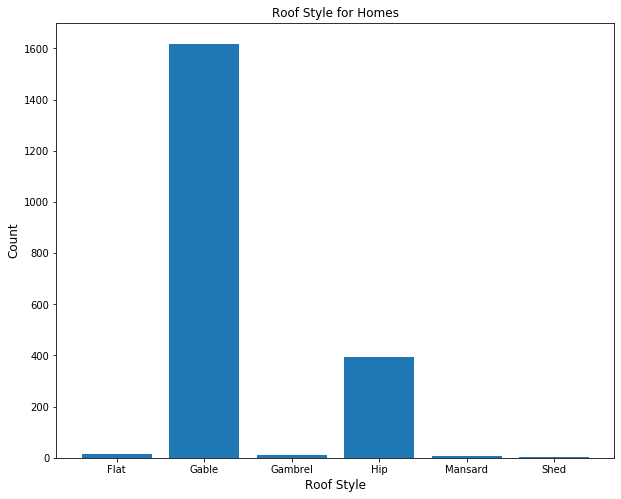

In [251]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Roof Style for Homes', fontsize=12)
plt.xlabel('Roof Style', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/72_bar_roof_style.png', transparent=True)

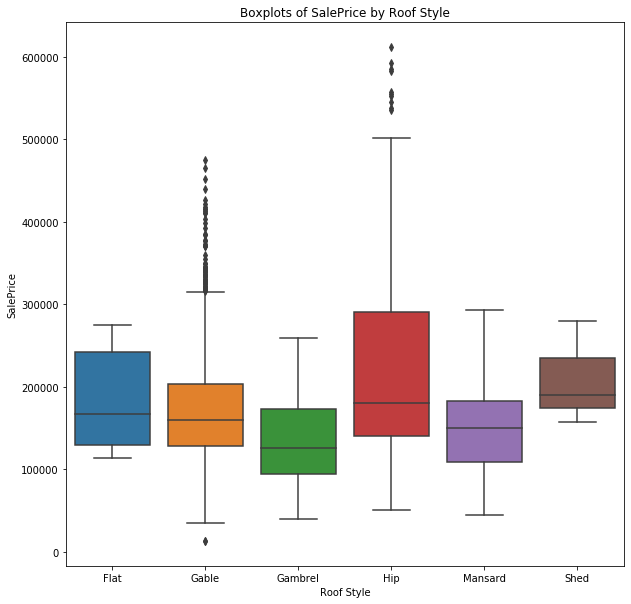

In [252]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='Roof Style', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Roof Style')
plt.savefig('../images/73_boxplot_roof_style_saleprice.png', transparent=True)

**Roof Matl**

In [253]:
train['Roof Matl'].dtype

dtype('O')

In [254]:
train['Roof Matl'].value_counts()

CompShg    2024
Tar&Grv      15
WdShngl       5
WdShake       4
Membran       1
Name: Roof Matl, dtype: int64

In [255]:
train['Roof Matl'] = pd.Categorical(train['Roof Matl'])

In [256]:
idx = train['Roof Matl'].value_counts().sort_index().index
val = train['Roof Matl'].value_counts().sort_index().values

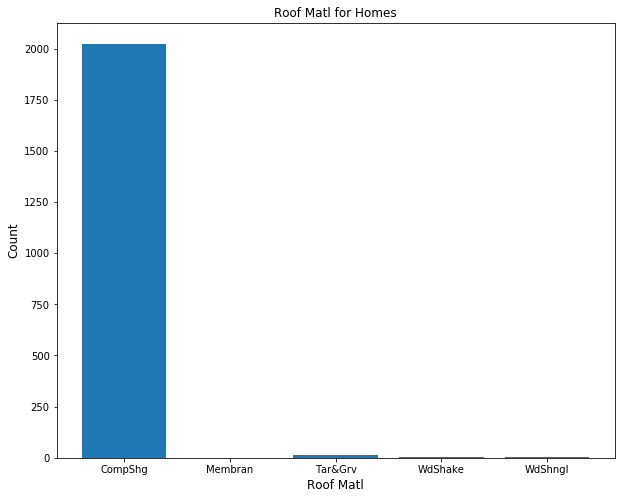

In [257]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Roof Matl for Homes', fontsize=12)
plt.xlabel('Roof Matl', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/74_bar_roof_matl.png', transparent=True)

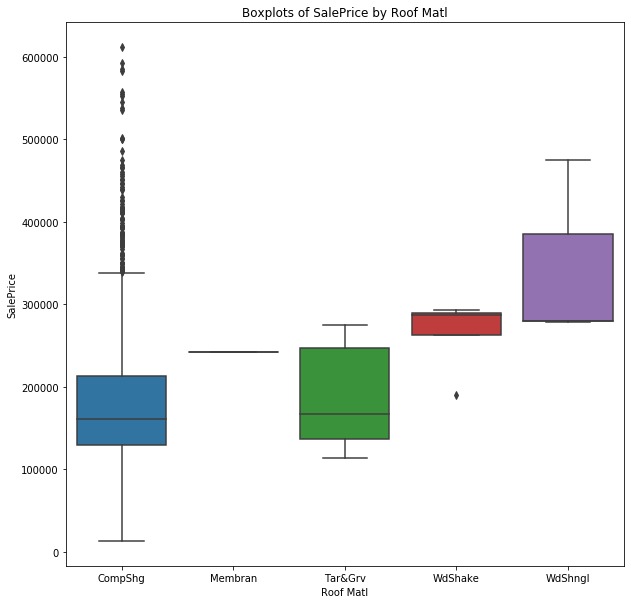

In [258]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='Roof Matl', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Roof Matl')
plt.savefig('../images/75_boxplot_roof_matl_saleprice.png', transparent=True)

**Exterior 1st**

In [259]:
train['Exterior 1st'].dtype

dtype('O')

In [260]:
train['Exterior 1st'].value_counts()

VinylSd    724
MetalSd    331
HdBoard    300
Wd Sdng    276
Plywood    152
CemntBd     89
BrkFace     64
WdShing     45
AsbShng     33
Stucco      26
BrkComm      3
Stone        2
CBlock       2
ImStucc      1
AsphShn      1
Name: Exterior 1st, dtype: int64

In [261]:
train['Exterior 1st'] = pd.Categorical(train['Exterior 1st'])

In [262]:
idx = train['Exterior 1st'].value_counts().sort_index().index
val = train['Exterior 1st'].value_counts().sort_index().values

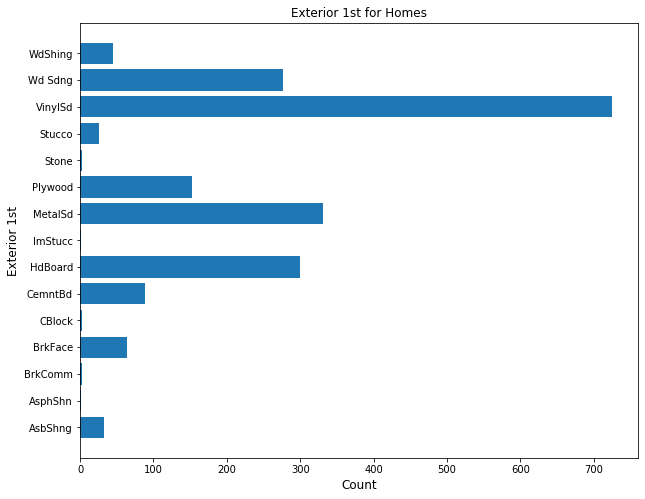

In [263]:
plt.figure(figsize=(10, 8))
plt.barh(np.arange(len(idx)), val)

plt.title('Exterior 1st for Homes', fontsize=12)
plt.ylabel('Exterior 1st', fontsize=12)
plt.yticks(np.arange(len(idx)), idx)
plt.xlabel('Count', fontsize=12)
plt.savefig('../images/76_bar_exterior_1st.png', transparent=True)

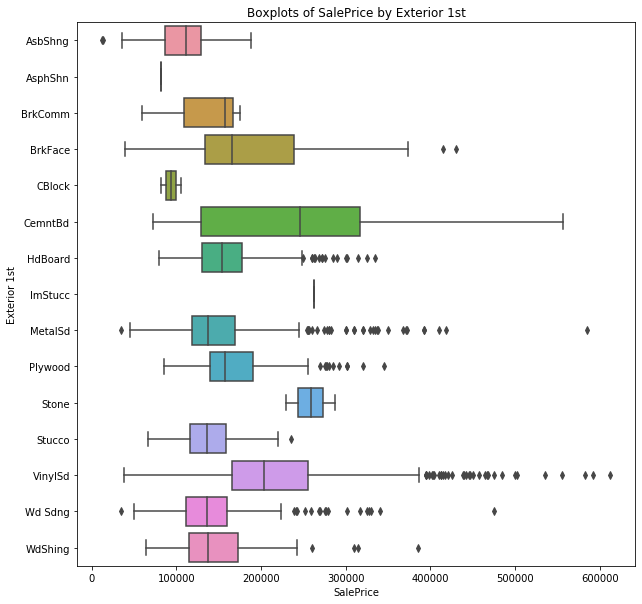

In [264]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(y='Exterior 1st', x='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Exterior 1st')
plt.savefig('../images/77_boxplot_exterior_1st_saleprice.png', transparent=True)

**Exterior 2nd**

In [265]:
train['Exterior 2nd'].dtype

dtype('O')

In [266]:
train['Exterior 2nd'].value_counts()

VinylSd    721
MetalSd    324
HdBoard    275
Wd Sdng    262
Plywood    185
CmentBd     89
Wd Shng     63
BrkFace     34
Stucco      29
AsbShng     28
Brk Cmn     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       2
Name: Exterior 2nd, dtype: int64

In [267]:
train['Exterior 2nd'] = pd.Categorical(train['Exterior 2nd'])

In [268]:
idx = train['Exterior 2nd'].value_counts().sort_index().index
val = train['Exterior 2nd'].value_counts().sort_index().values

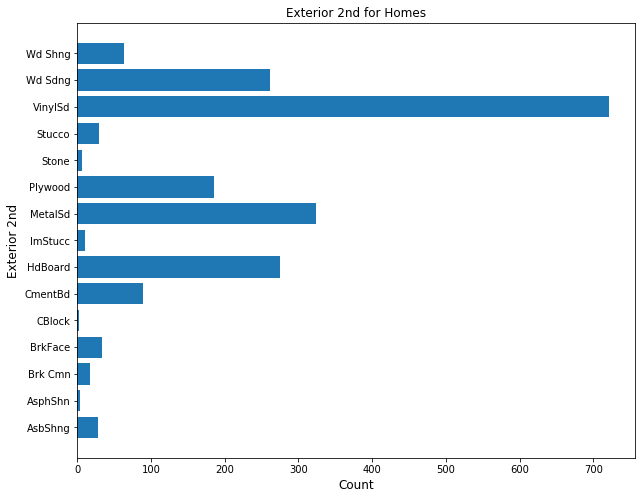

In [269]:
plt.figure(figsize=(10, 8))
plt.barh(np.arange(len(idx)), val)

plt.title('Exterior 2nd for Homes', fontsize=12)
plt.ylabel('Exterior 2nd', fontsize=12)
plt.yticks(np.arange(len(idx)), idx)
plt.xlabel('Count', fontsize=12)
plt.savefig('../images/78_bar_exterior_2nd.png', transparent=True)

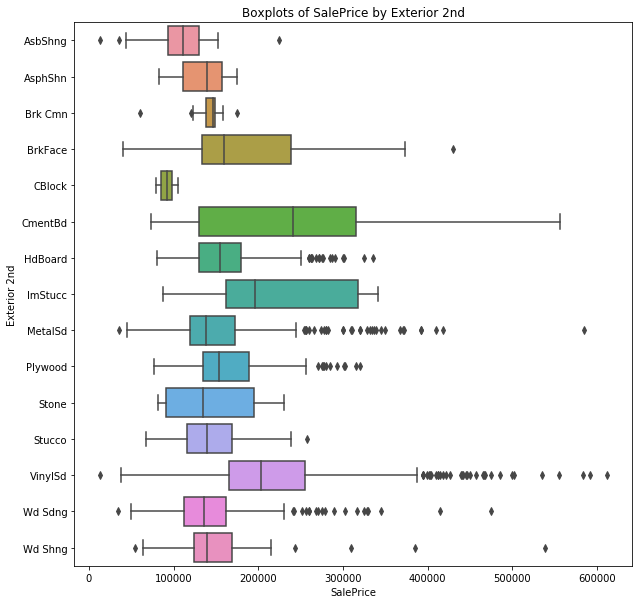

In [270]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(y='Exterior 2nd', x='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Exterior 2nd')
plt.savefig('../images/79_boxplot_exterior_2nd_saleprice.png', transparent=True)

**Mas Vnr Type**

In [271]:
train['Mas Vnr Type'].dtype

dtype('O')

In [272]:
train['Mas Vnr Type'].value_counts(dropna=False).sort_index()

BrkCmn       13
BrkFace     630
None       1218
Stone       166
NaN          22
Name: Mas Vnr Type, dtype: int64

In [273]:
train['Mas Vnr Type'] = pd.Categorical(train['Mas Vnr Type'])

In [274]:
idx = train['Mas Vnr Type'].value_counts().sort_index().index
val = train['Mas Vnr Type'].value_counts().sort_index().values

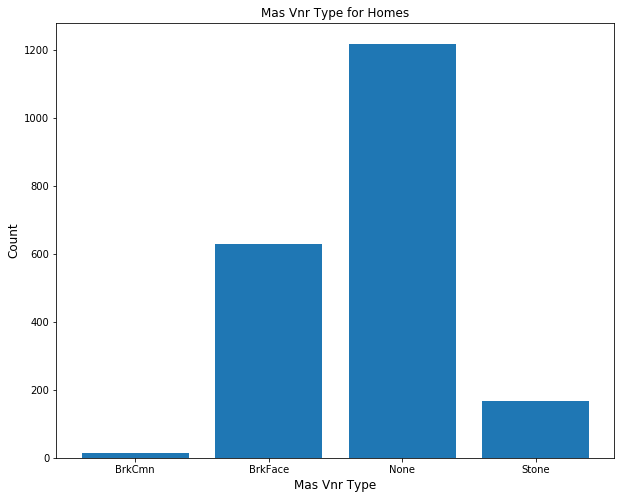

In [275]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Mas Vnr Type for Homes', fontsize=12)
plt.xlabel('Mas Vnr Type', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/80_bar_mas_vnr_type.png', transparent=True)

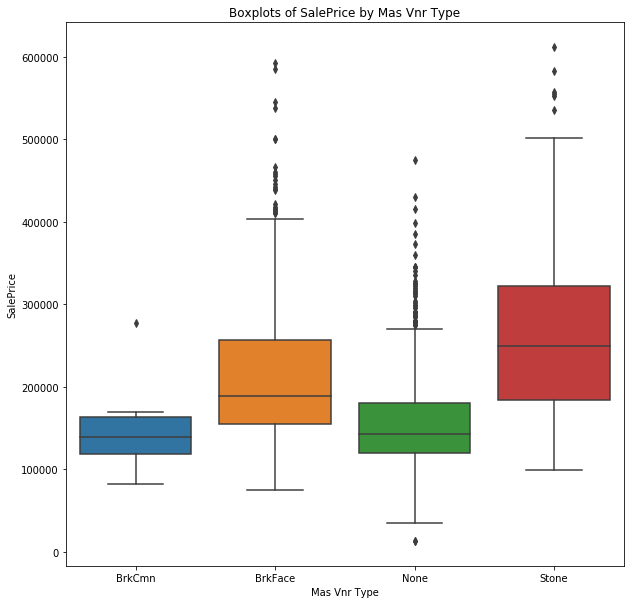

In [276]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='Mas Vnr Type', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Mas Vnr Type')
plt.savefig('../images/81_boxplot_mas_vnr_type_saleprice.png', transparent=True)

**Foundation**

In [277]:
train['Foundation'].dtype

dtype('O')

In [278]:
train['Foundation'].value_counts(dropna=False)

PConc     924
CBlock    863
BrkTil    221
Slab       34
Stone       5
Wood        2
Name: Foundation, dtype: int64

In [279]:
train['Foundation'] = pd.Categorical(train['Foundation'])

In [280]:
idx = train['Foundation'].value_counts().sort_index().index
val = train['Foundation'].value_counts().sort_index().values

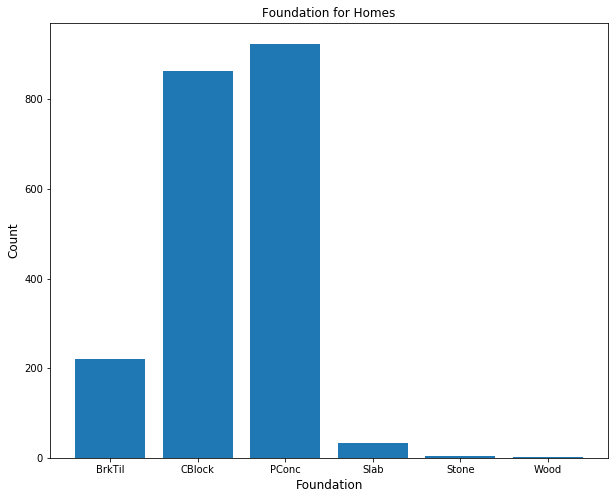

In [281]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Foundation for Homes', fontsize=12)
plt.xlabel('Foundation', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/82_bar_foundation.png', transparent=True)

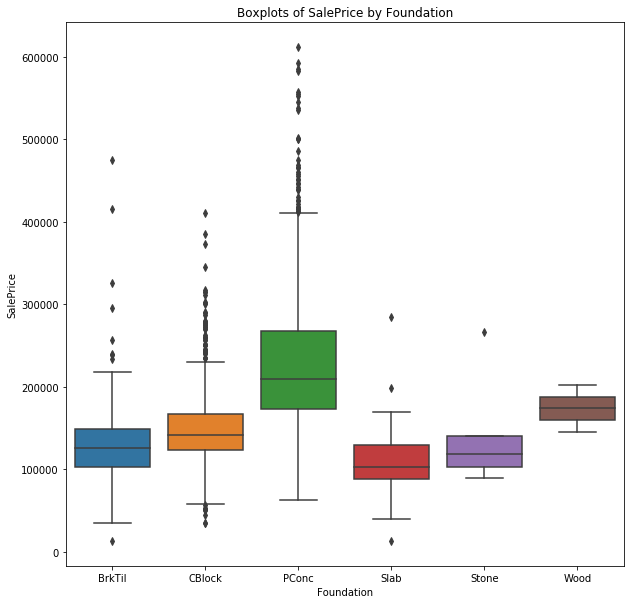

In [282]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='Foundation', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Foundation')
plt.savefig('../images/83_boxplot_foundation_saleprice.png', transparent=True)

**Heating**

In [283]:
train['Heating'].dtype

dtype('O')

In [284]:
train['Heating'].value_counts(dropna=False).sort_index()

GasA    2016
GasW      20
Grav       5
OthW       2
Wall       6
Name: Heating, dtype: int64

In [285]:
train['Heating'] = pd.Categorical(train['Heating'])

In [286]:
idx = train['Heating'].value_counts().sort_index().index
val = train['Heating'].value_counts().sort_index().values

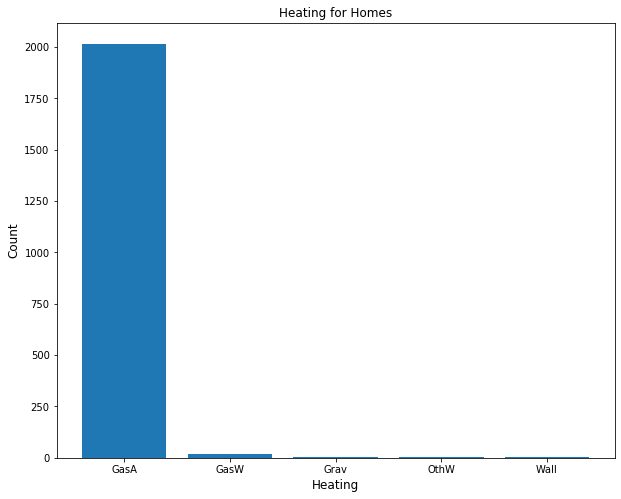

In [287]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Heating for Homes', fontsize=12)
plt.xlabel('Heating', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/84_bar_heating.png', transparent=True)

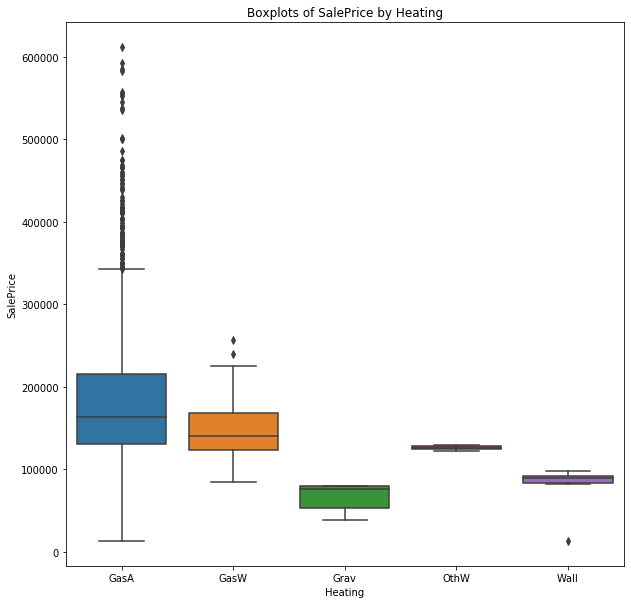

In [288]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='Heating', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Heating')
plt.savefig('../images/85_boxplot_heating_saleprice.png', transparent=True)

In [289]:
# train['Heating'] = train['Heating'].cat.add_categories(['Floor'])

In [290]:
# train['Heating'].value_counts().sort_index()

**Central Air**

In [291]:
train['Central Air'].value_counts()

Y    1908
N     141
Name: Central Air, dtype: int64

In [292]:
train['Central Air'] = train['Central Air'].map(lambda x: 1 if x == 'Y' else 0)

In [293]:
train['Central Air'].value_counts()

1    1908
0     141
Name: Central Air, dtype: int64

In [294]:
idx = train['Central Air'].value_counts().sort_index().index
val = train['Central Air'].value_counts().sort_index().values

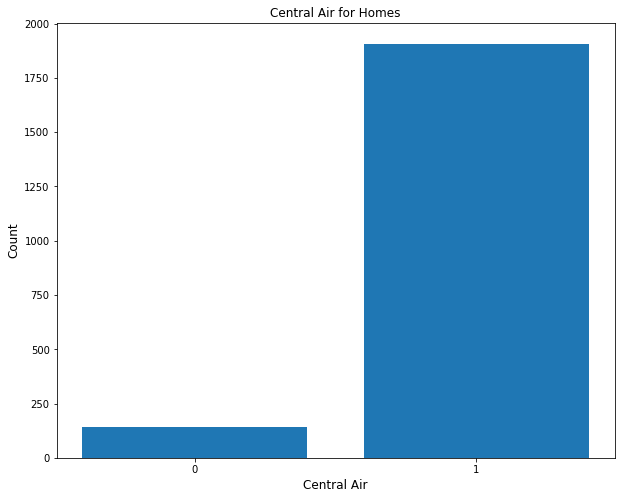

In [295]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Central Air for Homes', fontsize=12)
plt.xlabel('Central Air', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/86_bar_central_air.png', transparent=True)

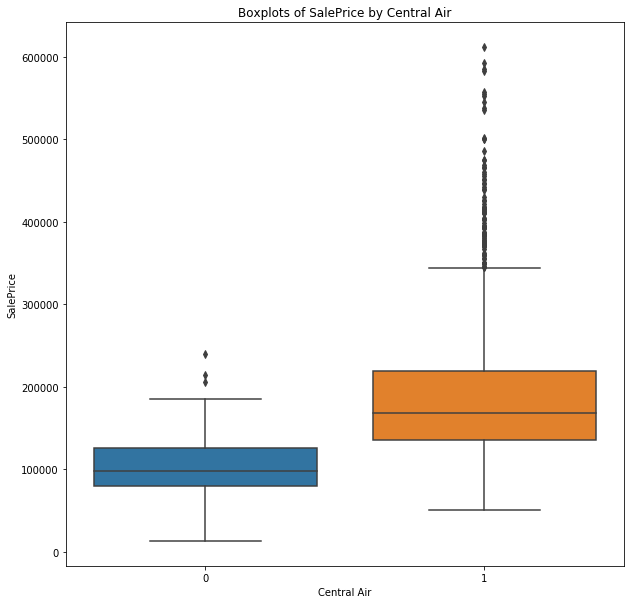

In [296]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='Central Air', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Central Air')
plt.savefig('../images/87_boxplot_central_air_saleprice.png', transparent=True)

**Garage Type**

In [297]:
train['Garage Type'].dtype

dtype('O')

In [298]:
train['Garage Type'].value_counts(dropna=False).sort_index()

2Types       19
Attchd     1211
Basment      27
BuiltIn     132
CarPort      11
Detchd      536
NaN         113
Name: Garage Type, dtype: int64

In [299]:
garage_type_missing_idx = train[train['Garage Type'].isnull()].index.tolist()

In [300]:
print(garage_type_missing_idx)

[2243, 330, 2278, 2235, 2084, 728, 781, 1492, 1514, 216, 204, 754, 698, 2745, 131, 615, 2824, 2846, 943, 753, 2369, 2034, 2882, 1501, 2635, 1951, 1318, 900, 1376, 1366, 187, 218, 1504, 2670, 2174, 1417, 2187, 1415, 2883, 207, 1292, 2875, 1135, 172, 2471, 2621, 1600, 763, 1515, 1516, 1808, 2195, 2083, 1505, 2693, 1370, 1319, 281, 1807, 1903, 536, 1306, 2127, 28, 2697, 1503, 1332, 1260, 2821, 1299, 727, 1487, 120, 1968, 766, 1221, 1521, 701, 2556, 2853, 1902, 1547, 1296, 1278, 130, 1948, 2820, 1550, 2914, 393, 2046, 710, 764, 1502, 1132, 2290, 853, 2671, 898, 2496, 2920, 894, 2837, 2668, 1486, 1591, 2690, 1601, 325, 2880, 2628, 2288, 2842]


In [301]:
train['Garage Type'] = train['Garage Type'].fillna('None')

In [302]:
train['Garage Type'].value_counts().sort_index()

2Types       19
Attchd     1211
Basment      27
BuiltIn     132
CarPort      11
Detchd      536
None        113
Name: Garage Type, dtype: int64

In [303]:
train['Garage Type'] = pd.Categorical(train['Garage Type'])

In [304]:
idx = train['Garage Type'].value_counts().sort_index().index
val = train['Garage Type'].value_counts().sort_index().values

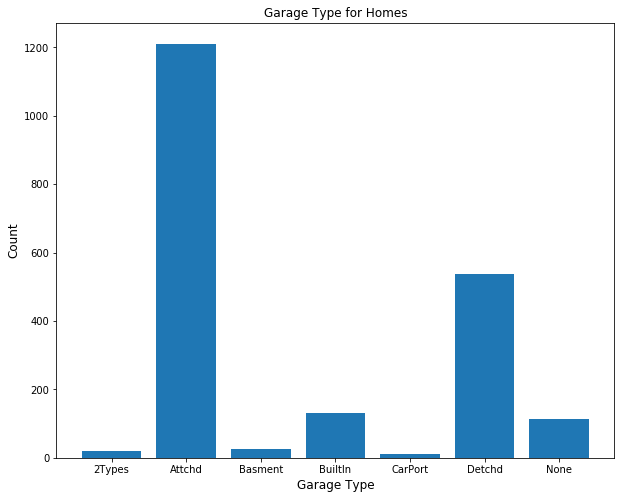

In [305]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Garage Type for Homes', fontsize=12)
plt.xlabel('Garage Type', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/88_bar_garage_type.png', transparent=True)

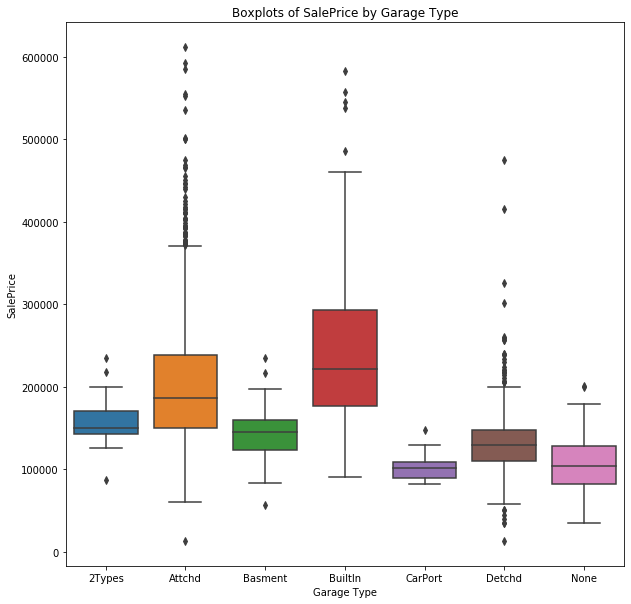

In [306]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='Garage Type', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Garage Type')
plt.savefig('../images/89_boxplot_garage_type_saleprice.png', transparent=True)

**Misc Feature**

In [307]:
train['Misc Feature'].dtype

dtype('O')

In [308]:
train['Misc Feature'].value_counts(dropna=False).sort_index()

Gar2       4
Othr       3
Shed      56
TenC       1
NaN     1985
Name: Misc Feature, dtype: int64

In [309]:
train['Misc Feature'] = train['Misc Feature'].fillna('None')

In [310]:
train['Misc Feature'] = pd.Categorical(train['Misc Feature'])

In [311]:
train['Misc Feature'].value_counts(dropna=False).sort_index()

Gar2       4
None    1985
Othr       3
Shed      56
TenC       1
Name: Misc Feature, dtype: int64

In [312]:
idx = train['Misc Feature'].value_counts().sort_index().index
val = train['Misc Feature'].value_counts().sort_index().values

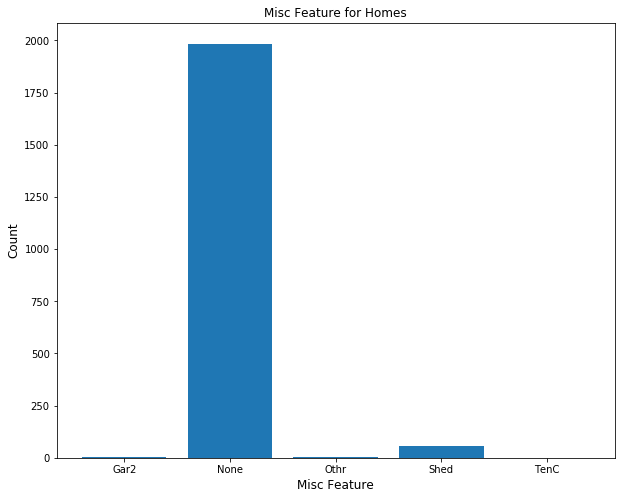

In [313]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Misc Feature for Homes', fontsize=12)
plt.xlabel('Misc Feature', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/90_bar_misc_feature.png', transparent=True)

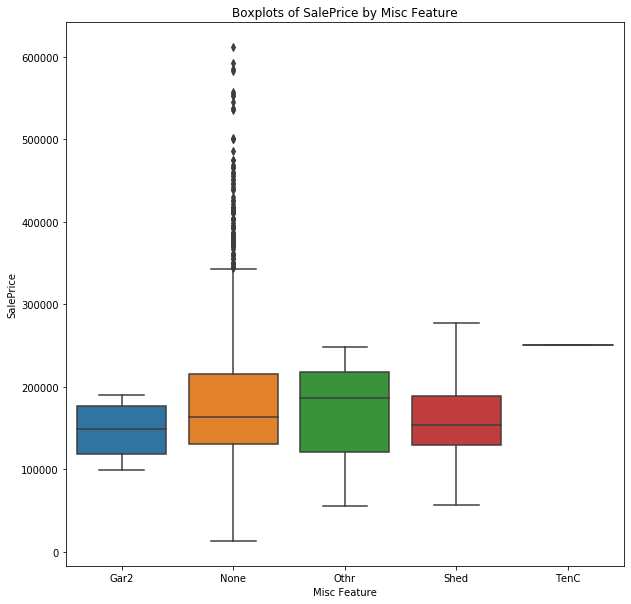

In [314]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='Misc Feature', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Misc Feature')
plt.savefig('../images/91_boxplot_misc_feature_saleprice.png', transparent=True)

**Sale Type**

In [315]:
train['Sale Type'].dtype

dtype('O')

In [316]:
train['Sale Type'].value_counts(dropna=False).sort_index()

COD        63
CWD        10
Con         4
ConLD      17
ConLI       7
ConLw       5
New       158
Oth         4
WD       1781
Name: Sale Type, dtype: int64

In [317]:
train['Sale Type'] = pd.Categorical(train['Sale Type'])

In [318]:
idx = train['Sale Type'].value_counts().sort_index().index
val = train['Sale Type'].value_counts().sort_index().values

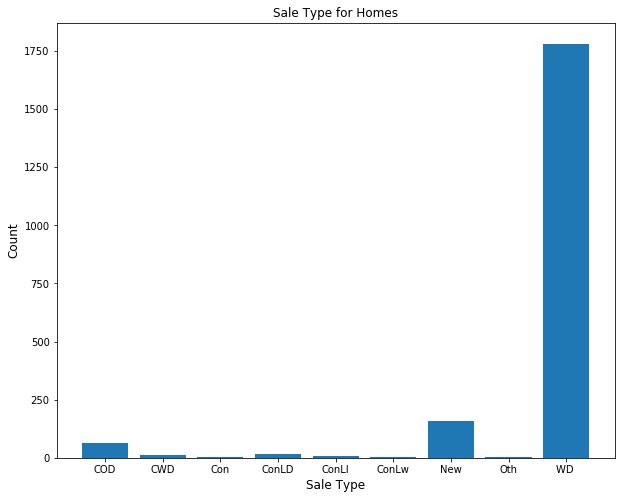

In [319]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Sale Type for Homes', fontsize=12)
plt.xlabel('Sale Type', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/92_bar_sale_type.png', transparent=True)

Text(0.5, 1.0, 'Boxplots of SalePrice by Sale Type')

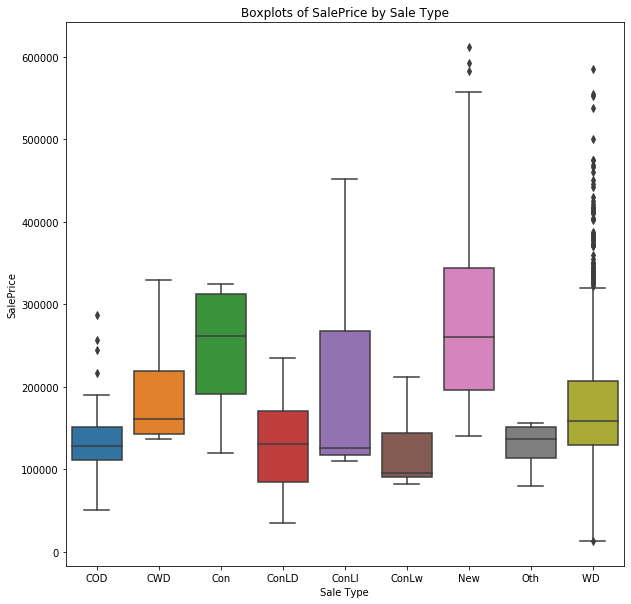

In [320]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='Sale Type', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Sale Type')

### Ordinal Features

In [321]:
ordinal_features = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual',
                    'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
                    'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish',
                    'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence'
                   ]

**Lot Shape**

In [322]:
train['Lot Shape'].dtype

dtype('O')

In [323]:
train['Lot Shape'].value_counts(dropna=False)

Reg    1295
IR1     691
IR2      55
IR3       8
Name: Lot Shape, dtype: int64

In [324]:
idx = train['Lot Shape'].value_counts().reindex(['IR3', 'IR2', 'IR1', 'Reg']).index
val = train['Lot Shape'].value_counts().reindex(['IR3', 'IR2', 'IR1', 'Reg']).values

Text(0, 0.5, 'Count')

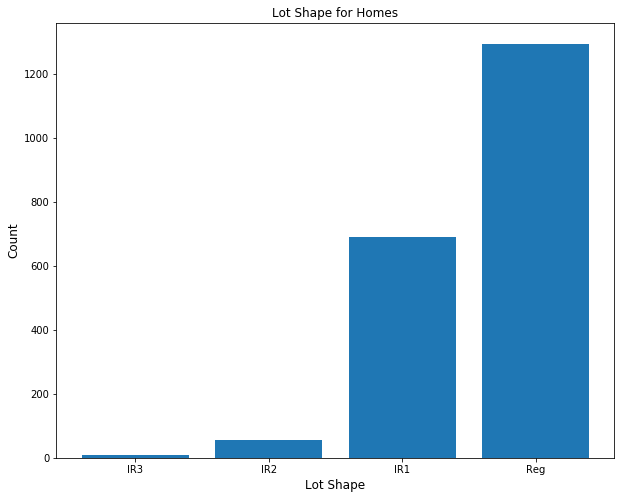

In [325]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Lot Shape for Homes', fontsize=12)
plt.xlabel('Lot Shape', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Boxplots of SalePrice by Lot Shape')

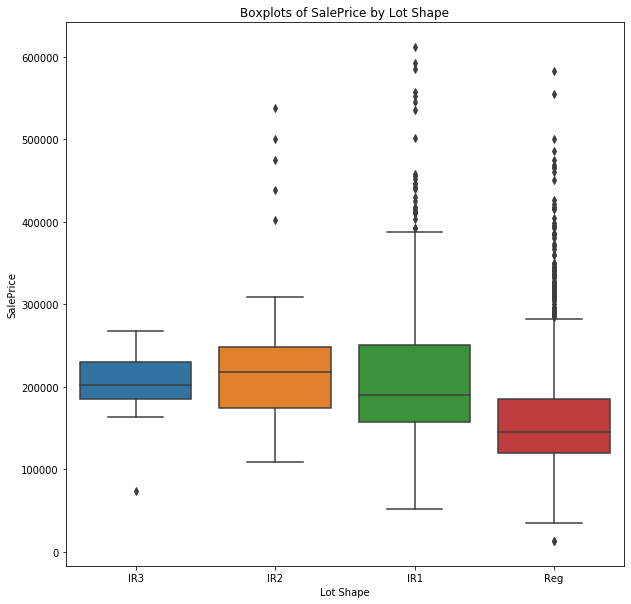

In [326]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='Lot Shape', y='SalePrice', data=train, order=['IR3', 'IR2', 'IR1', 'Reg'])
ax.set_title('Boxplots of SalePrice by Lot Shape')

In [327]:
train['Lot Shape'].value_counts().index.tolist()

['Reg', 'IR1', 'IR2', 'IR3']

In [328]:
category_int_map = {'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4}

train['Lot Shape'] = train['Lot Shape'].map(category_int_map)

In [329]:
train['Lot Shape'].value_counts()

4    1295
3     691
2      55
1       8
Name: Lot Shape, dtype: int64

In [330]:
idx = train['Lot Shape'].value_counts().sort_index().index
val = train['Lot Shape'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

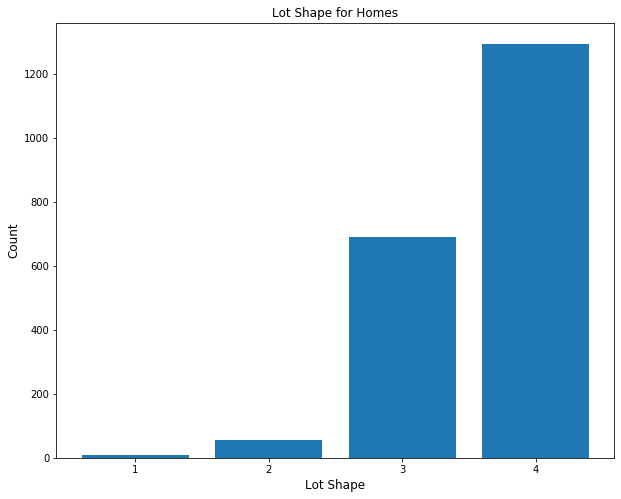

In [331]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Lot Shape for Homes', fontsize=12)
plt.xlabel('Lot Shape', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

**Utilities**

In [332]:
train['Utilities'].dtype

dtype('O')

In [333]:
train['Utilities'].value_counts(dropna=False)

AllPub    2047
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

In [334]:
idx = train['Utilities'].value_counts().reindex(['NoSeWa', 'NoSewr', 'AllPub']).index
val = train['Utilities'].value_counts().reindex(['NoSeWa', 'NoSewr', 'AllPub']).values

Text(0, 0.5, 'Count')

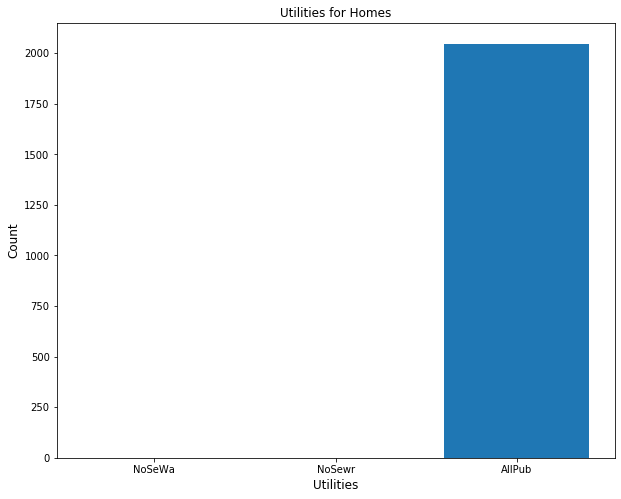

In [335]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Utilities for Homes', fontsize=12)
plt.xlabel('Utilities', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Boxplots of SalePrice by Utilities')

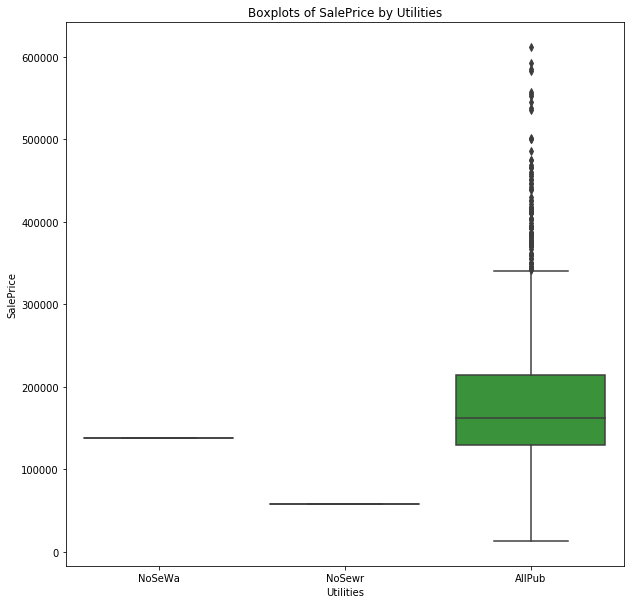

In [336]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='Utilities', y='SalePrice', data=train, order=['NoSeWa', 'NoSewr', 'AllPub'])
ax.set_title('Boxplots of SalePrice by Utilities')

In [337]:
category_int_map = {'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4}

train['Utilities'] = train['Utilities'].map(category_int_map)

In [338]:
train['Utilities'].value_counts()

4    2047
3       1
2       1
Name: Utilities, dtype: int64

In [339]:
idx = train['Utilities'].value_counts().sort_index().index
val = train['Utilities'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

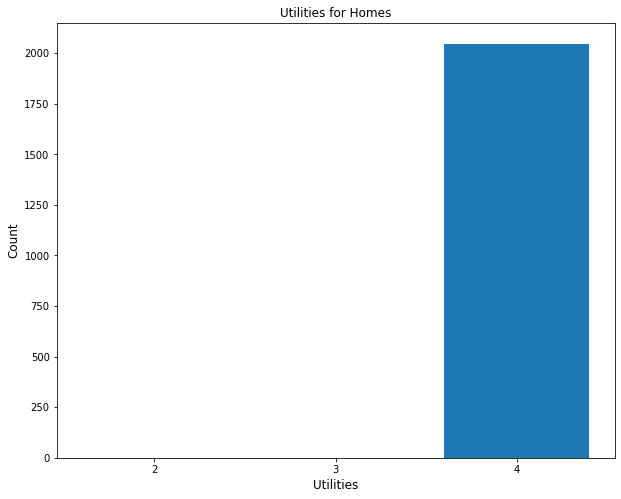

In [340]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Utilities for Homes', fontsize=12)
plt.xlabel('Utilities', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

**Land Slope**

In [341]:
train['Land Slope'].dtype

dtype('O')

In [342]:
train['Land Slope'].value_counts(dropna=False)

Gtl    1951
Mod      88
Sev      10
Name: Land Slope, dtype: int64

In [343]:
idx = train['Land Slope'].value_counts().reindex(['Gtl', 'Mod', 'Sev']).index
val = train['Land Slope'].value_counts().reindex(['Gtl', 'Mod', 'Sev']).values

Text(0, 0.5, 'Count')

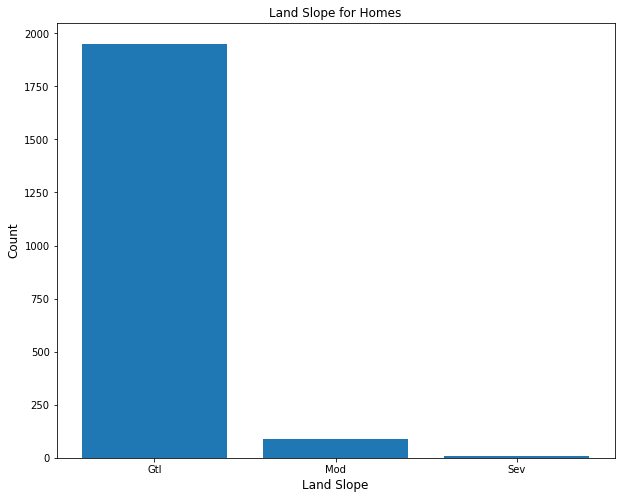

In [344]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Land Slope for Homes', fontsize=12)
plt.xlabel('Land Slope', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Boxplots of SalePrice by Land Slope')

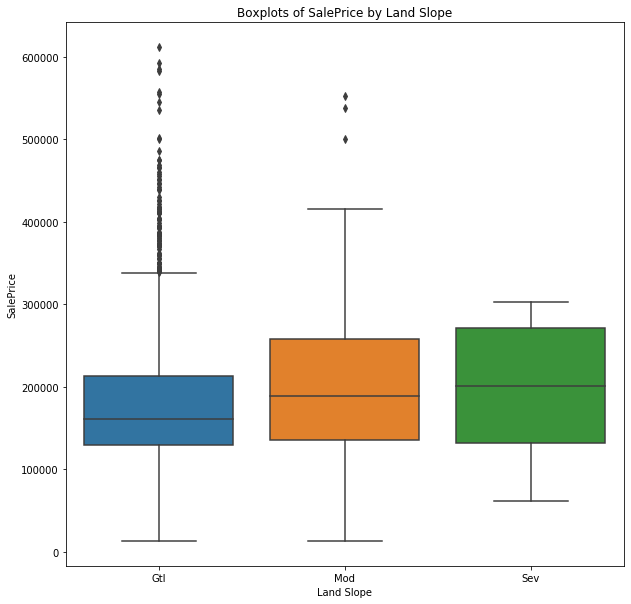

In [345]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='Land Slope', y='SalePrice', data=train, order=['Gtl', 'Mod', 'Sev'])
ax.set_title('Boxplots of SalePrice by Land Slope')

In [346]:
category_int_map = {'Gtl': 1, 'Mod': 2, 'Sev': 3}

train['Land Slope'] = train['Land Slope'].map(category_int_map)

In [347]:
idx = train['Land Slope'].value_counts().sort_index().index
val = train['Land Slope'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

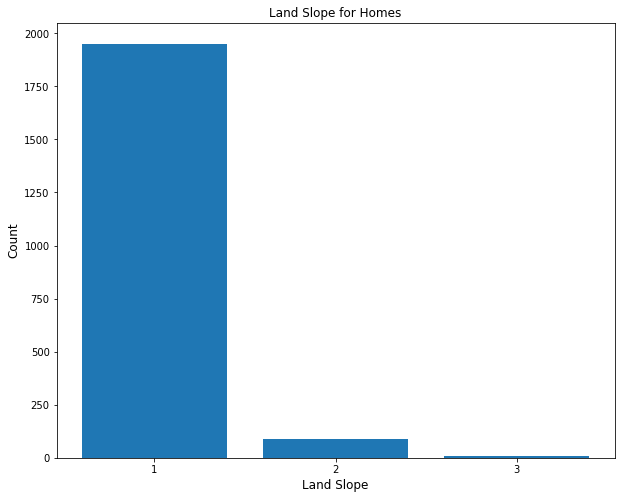

In [348]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Land Slope for Homes', fontsize=12)
plt.xlabel('Land Slope', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

**Overall Qual**

In [349]:
train['Overall Qual'].dtype

dtype('int64')

In [350]:
train['Overall Qual'].value_counts(dropna=False).sort_index()

1       4
2       9
3      29
4     159
5     563
6     506
7     431
8     250
9      77
10     21
Name: Overall Qual, dtype: int64

In [351]:
idx = train['Overall Qual'].value_counts().sort_index().index
val = train['Overall Qual'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

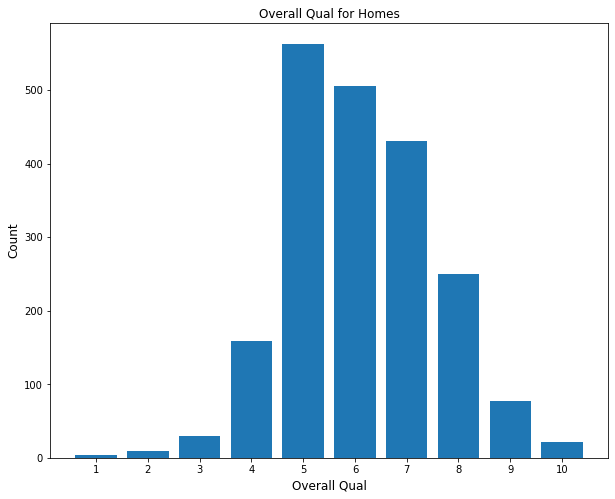

In [352]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Overall Qual for Homes', fontsize=12)
plt.xlabel('Overall Qual', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Boxplots of SalePrice by Overall Qual')

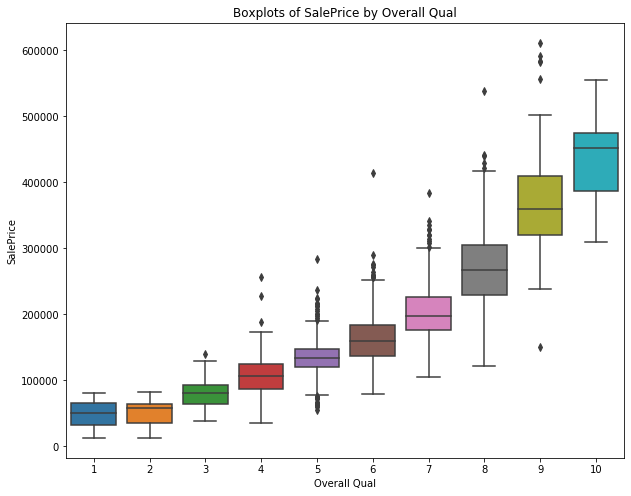

In [353]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Overall Qual', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Overall Qual')

**Overall Cond**

In [354]:
train['Overall Cond'].dtype

dtype('int64')

In [355]:
train['Overall Cond'].value_counts(dropna=False).sort_index()

1       4
2       6
3      35
4      70
5    1166
6     368
7     270
8     101
9      29
Name: Overall Cond, dtype: int64

In [356]:
idx = train['Overall Cond'].value_counts().sort_index().index
val = train['Overall Cond'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

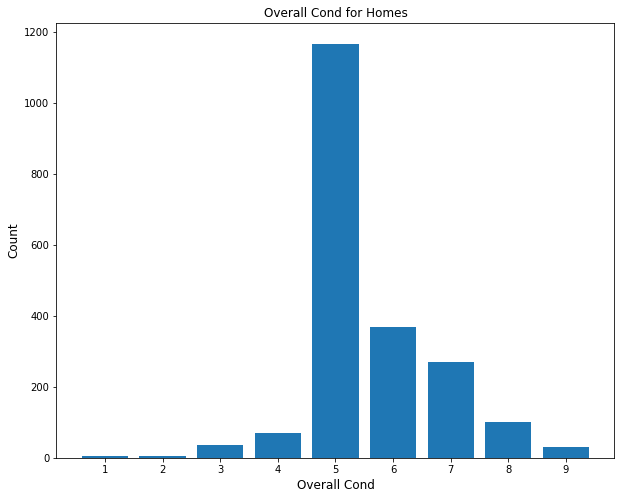

In [357]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Overall Cond for Homes', fontsize=12)
plt.xlabel('Overall Cond', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Boxplots of SalePrice by Overall Cond')

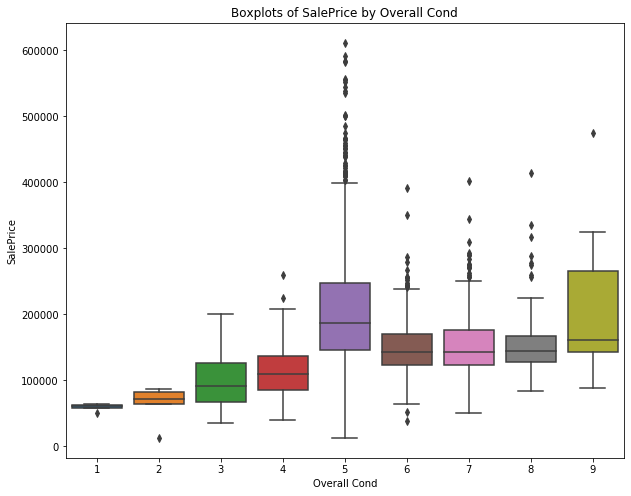

In [358]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Overall Cond', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Overall Cond')

**Exter Qual**

In [359]:
train['Exter Qual'].dtype

dtype('O')

In [360]:
train['Exter Qual'].value_counts(dropna=False)

TA    1247
Gd     697
Ex      79
Fa      26
Name: Exter Qual, dtype: int64

In [361]:
idx = train['Exter Qual'].value_counts().reindex(['Po', 'Fa', 'TA', 'Gd', 'Ex']).index
val = train['Exter Qual'].value_counts().reindex(['Po', 'Fa', 'TA', 'Gd', 'Ex']).values

Text(0, 0.5, 'Count')

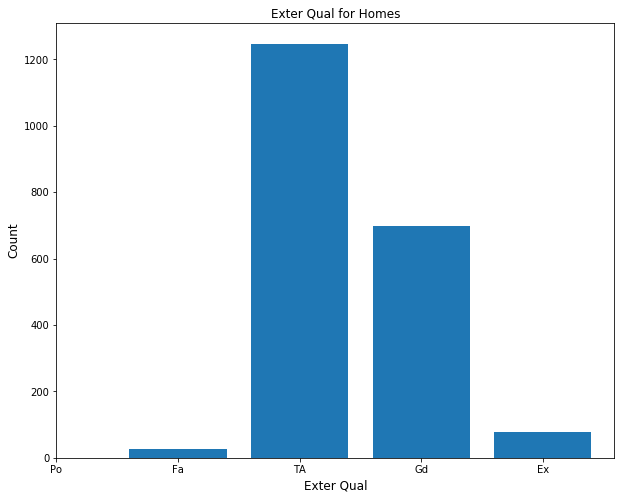

In [362]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Exter Qual for Homes', fontsize=12)
plt.xlabel('Exter Qual', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Boxplots of SalePrice by Exter Qual')

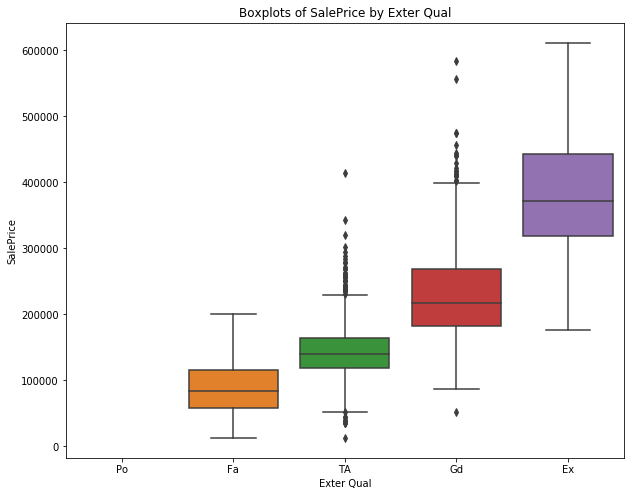

In [363]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Exter Qual', y='SalePrice', data=train,order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
ax.set_title('Boxplots of SalePrice by Exter Qual')

In [364]:
category_int_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

train['Exter Qual'] = train['Exter Qual'].map(category_int_map)

In [365]:
idx = train['Exter Qual'].value_counts().sort_index().index
val = train['Exter Qual'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

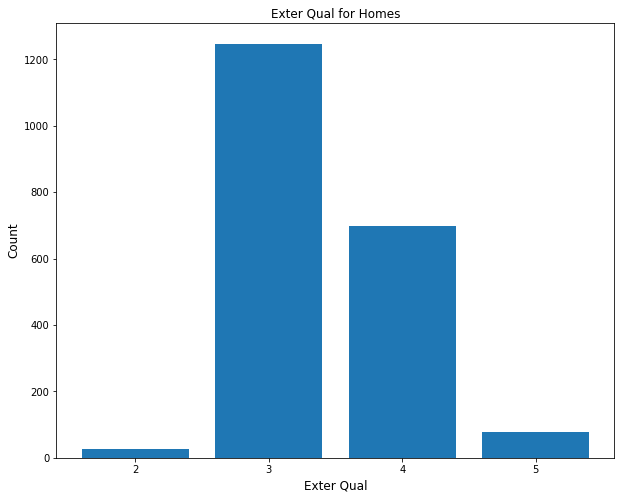

In [366]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Exter Qual for Homes', fontsize=12)
plt.xlabel('Exter Qual', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

**Exter Cond**

In [367]:
train['Exter Cond'].dtype

dtype('O')

In [368]:
train['Exter Cond'].value_counts(dropna=False)

TA    1776
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64

In [369]:
idx = train['Exter Cond'].value_counts().reindex(['Po', 'Fa', 'TA', 'Gd', 'Ex']).index
val = train['Exter Cond'].value_counts().reindex(['Po', 'Fa', 'TA', 'Gd', 'Ex']).values

Text(0, 0.5, 'Count')

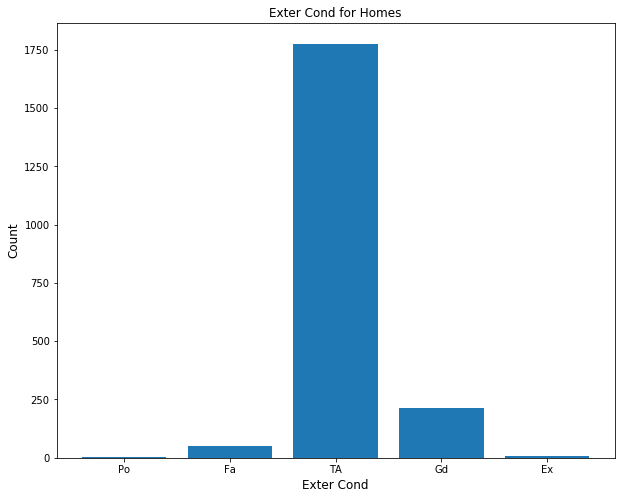

In [370]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Exter Cond for Homes', fontsize=12)
plt.xlabel('Exter Cond', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Boxplots of SalePrice by Exter Cond')

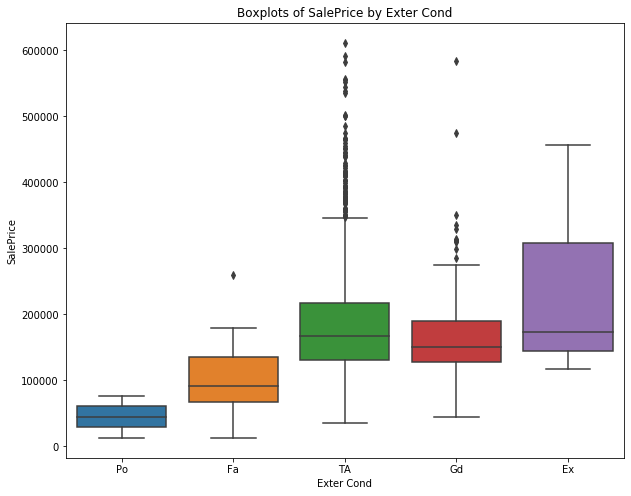

In [371]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Exter Cond', y='SalePrice', data=train,order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
ax.set_title('Boxplots of SalePrice by Exter Cond')

In [372]:
category_int_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

train['Exter Cond'] = train['Exter Cond'].map(category_int_map)

In [373]:
idx = train['Exter Cond'].value_counts().sort_index().index
val = train['Exter Cond'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

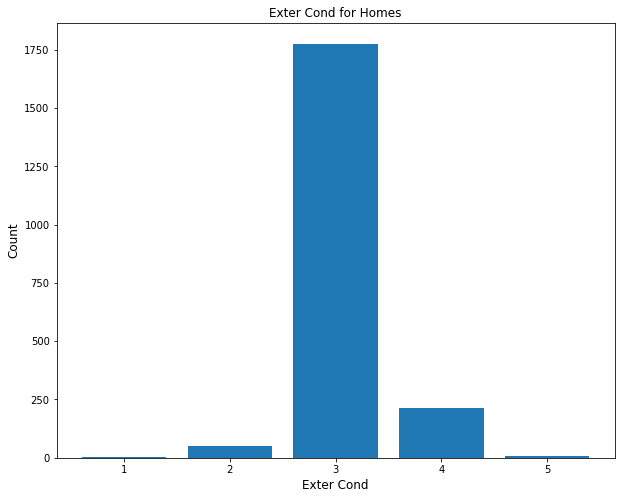

In [374]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Exter Cond for Homes', fontsize=12)
plt.xlabel('Exter Cond', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

**Bsmt Qual**

In [375]:
train['Bsmt Qual'].dtype

dtype('O')

In [376]:
train['Bsmt Qual'].value_counts(dropna=False).reindex([np.nan, 'Po', 'Fa', 'TA', 'Gd', 'Ex'])

NaN     55
Po       1
Fa      60
TA     887
Gd     864
Ex     182
Name: Bsmt Qual, dtype: int64

In [377]:
# Fill NA value with NB (stands for No Basement)
train['Bsmt Qual'] = train['Bsmt Qual'].fillna('None')

In [378]:
idx = train['Bsmt Qual'].value_counts().reindex(['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']).index
val = train['Bsmt Qual'].value_counts().reindex(['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']).values

Text(0, 0.5, 'Count')

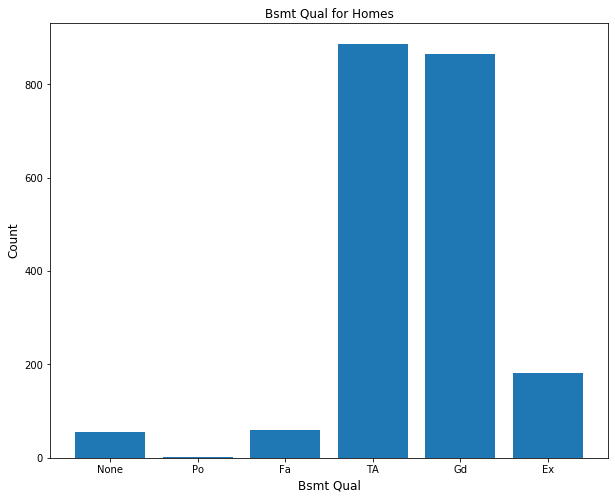

In [379]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Bsmt Qual for Homes', fontsize=12)
plt.xlabel('Bsmt Qual', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Boxplots of SalePrice by Bsmt Qual')

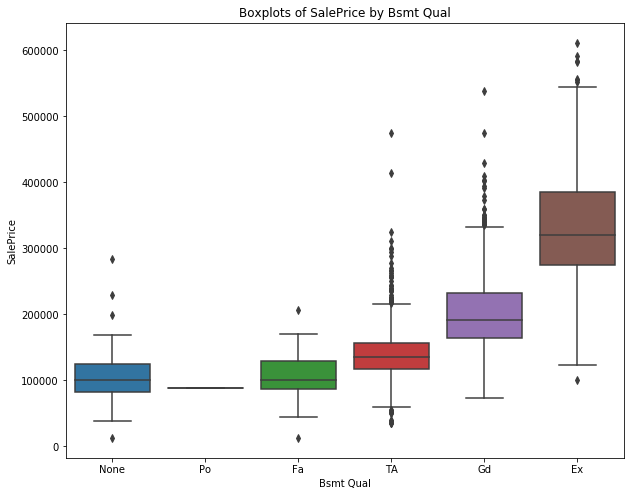

In [380]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Bsmt Qual', y='SalePrice', data=train,order=['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'])
ax.set_title('Boxplots of SalePrice by Bsmt Qual')

In [381]:
category_int_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

train['Bsmt Qual'] = train['Bsmt Qual'].map(category_int_map)

In [382]:
train['Bsmt Qual'].value_counts().sort_index()

0     55
1      1
2     60
3    887
4    864
5    182
Name: Bsmt Qual, dtype: int64

In [383]:
idx = train['Bsmt Qual'].value_counts().sort_index().index
val = train['Bsmt Qual'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

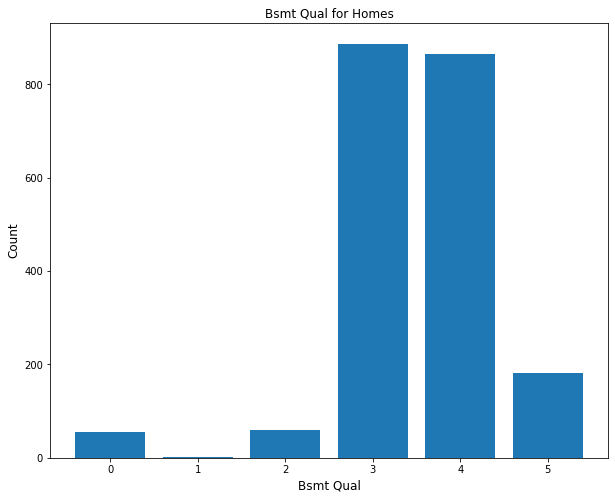

In [384]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Bsmt Qual for Homes', fontsize=12)
plt.xlabel('Bsmt Qual', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

**Bsmt Cond**

In [385]:
train['Bsmt Cond'].dtype

dtype('O')

In [386]:
train['Bsmt Cond'].value_counts(dropna=False).reindex([np.nan, 'Po', 'Fa', 'TA', 'Gd', 'Ex'])

NaN      55
Po        5
Fa       65
TA     1832
Gd       89
Ex        3
Name: Bsmt Cond, dtype: int64

In [387]:
# Fill NA value with NB (stands for No Basement)
train['Bsmt Cond'] = train['Bsmt Cond'].fillna('None')

In [388]:
idx = train['Bsmt Cond'].value_counts().reindex(['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']).index
val = train['Bsmt Cond'].value_counts().reindex(['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']).values

Text(0, 0.5, 'Count')

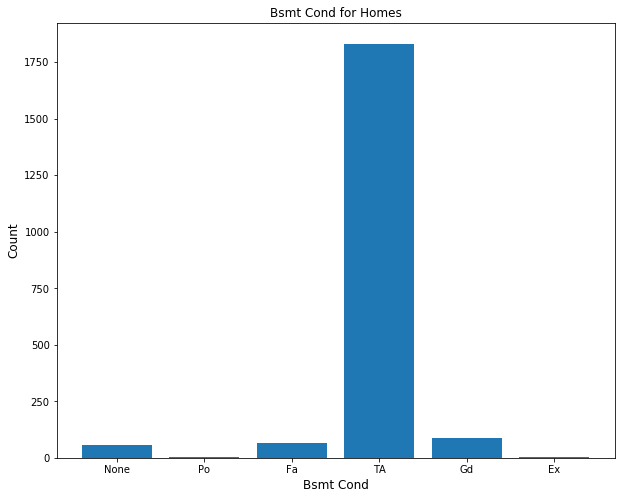

In [389]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Bsmt Cond for Homes', fontsize=12)
plt.xlabel('Bsmt Cond', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Boxplots of SalePrice by Bsmt Cond')

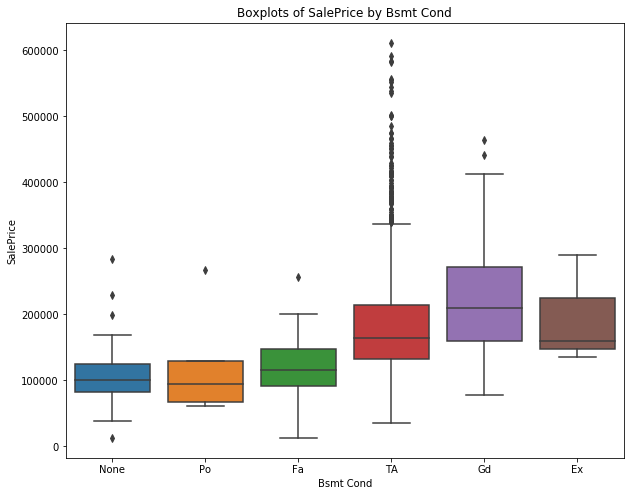

In [390]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Bsmt Cond', y='SalePrice', data=train,order=['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'])
ax.set_title('Boxplots of SalePrice by Bsmt Cond')

In [391]:
category_int_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

train['Bsmt Cond'] = train['Bsmt Cond'].map(category_int_map)

In [392]:
train['Bsmt Cond'].value_counts().sort_index()

0      55
1       5
2      65
3    1832
4      89
5       3
Name: Bsmt Cond, dtype: int64

In [393]:
idx = train['Bsmt Cond'].value_counts().sort_index().index
val = train['Bsmt Cond'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

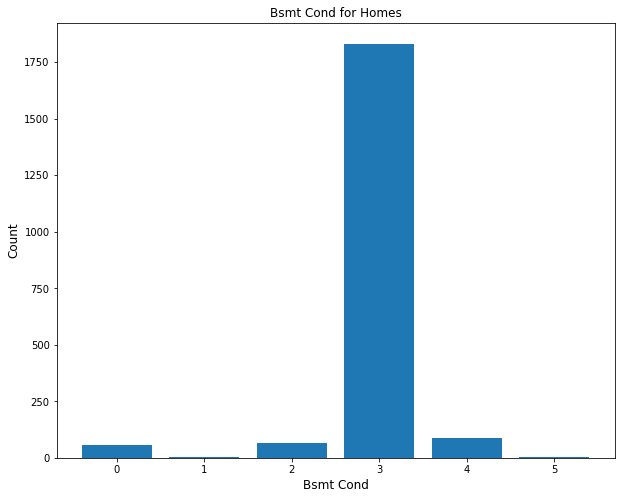

In [394]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Bsmt Cond for Homes', fontsize=12)
plt.xlabel('Bsmt Cond', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

**Bsmt Exposure**

In [395]:
train['Bsmt Exposure'].dtype

dtype('O')

In [396]:
train['Bsmt Exposure'].value_counts(dropna=False).reindex([np.nan, 'No', 'Mn', 'Av', 'Gd'])

NaN      58
No     1339
Mn      163
Av      288
Gd      201
Name: Bsmt Exposure, dtype: int64

In [397]:
train['Bsmt Exposure'] = train['Bsmt Exposure'].fillna('None')

In [398]:
idx = train['Bsmt Exposure'].value_counts().reindex(['None', 'No', 'Mn', 'Av', 'Gd']).index
val = train['Bsmt Exposure'].value_counts().reindex(['None', 'No', 'Mn', 'Av', 'Gd']).values

Text(0, 0.5, 'Count')

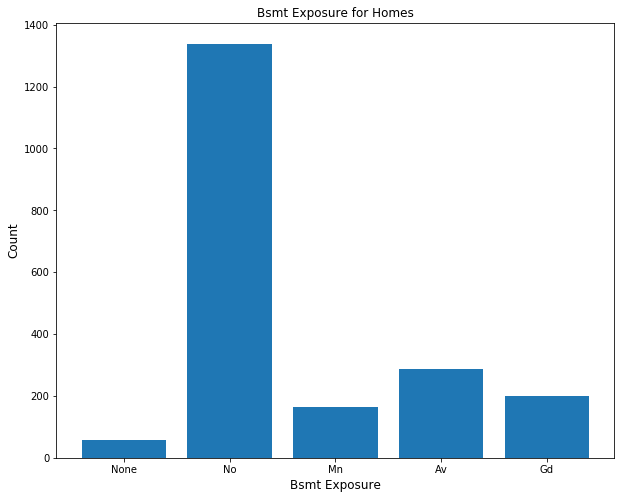

In [399]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Bsmt Exposure for Homes', fontsize=12)
plt.xlabel('Bsmt Exposure', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Boxplots of SalePrice by Bsmt Exposure')

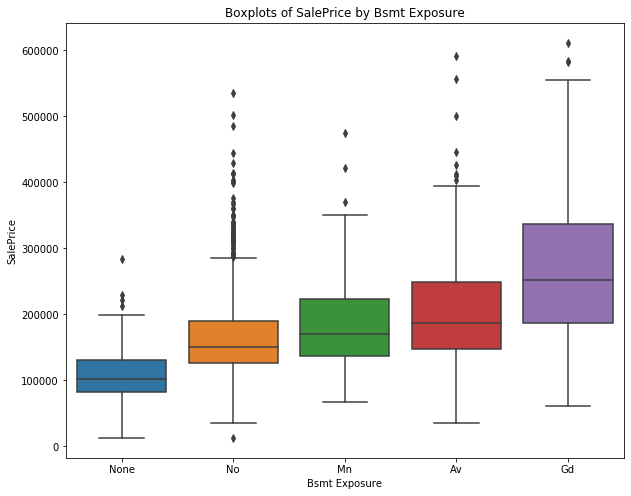

In [400]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Bsmt Exposure', y='SalePrice', data=train,order=['None', 'No', 'Mn', 'Av', 'Gd'])
ax.set_title('Boxplots of SalePrice by Bsmt Exposure')

In [401]:
category_int_map = {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

train['Bsmt Exposure'] = train['Bsmt Exposure'].map(category_int_map)

In [402]:
train['Bsmt Exposure'].value_counts().sort_index()

0      58
1    1339
2     163
3     288
4     201
Name: Bsmt Exposure, dtype: int64

In [403]:
idx = train['Bsmt Exposure'].value_counts().sort_index().index
val = train['Bsmt Exposure'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

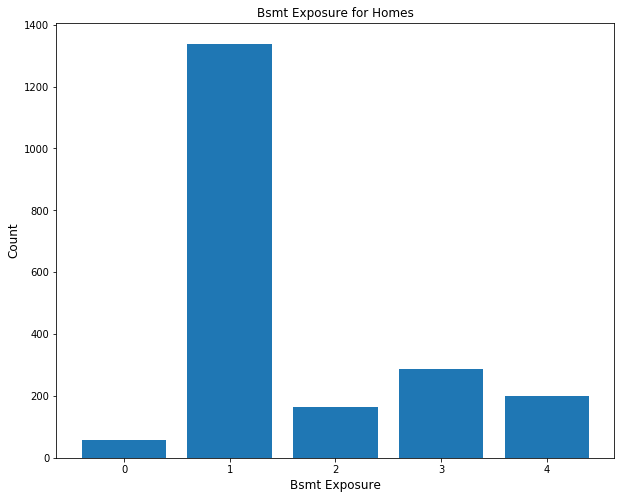

In [404]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Bsmt Exposure for Homes', fontsize=12)
plt.xlabel('Bsmt Exposure', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

**BsmtFin Type 1**

In [405]:
train['BsmtFin Type 1'].dtype

dtype('O')

In [406]:
train['BsmtFin Type 1'].value_counts(dropna=False).reindex([np.nan, 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'])

NaN     55
Unf    603
LwQ    102
Rec    183
BLQ    200
ALQ    293
GLQ    613
Name: BsmtFin Type 1, dtype: int64

In [407]:
train['BsmtFin Type 1'] = train['BsmtFin Type 1'].fillna('None')

In [408]:
idx = train['BsmtFin Type 1'].value_counts().reindex(['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']).index
val = train['BsmtFin Type 1'].value_counts().reindex(['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']).values

Text(0, 0.5, 'Count')

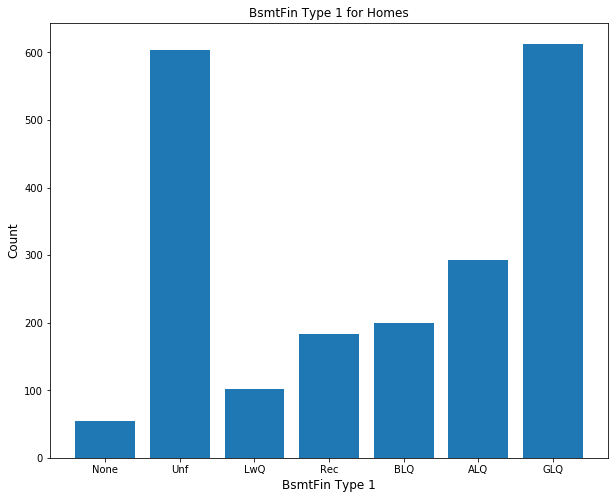

In [409]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('BsmtFin Type 1 for Homes', fontsize=12)
plt.xlabel('BsmtFin Type 1', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Boxplots of SalePrice by BsmtFin Type 1')

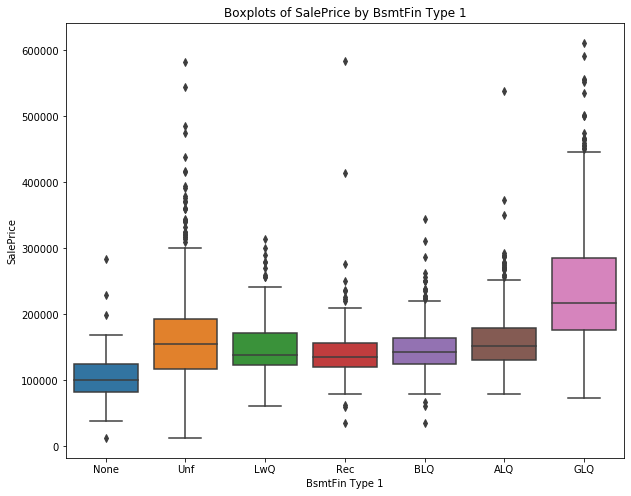

In [410]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='BsmtFin Type 1', y='SalePrice', data=train,order=['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'])
ax.set_title('Boxplots of SalePrice by BsmtFin Type 1')

In [411]:
category_int_map = {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

train['BsmtFin Type 1'] = train['BsmtFin Type 1'].map(category_int_map)

In [412]:
train['BsmtFin Type 1'].value_counts().sort_index()

0     55
1    603
2    102
3    183
4    200
5    293
6    613
Name: BsmtFin Type 1, dtype: int64

In [413]:
idx = train['BsmtFin Type 1'].value_counts().sort_index().index
val = train['BsmtFin Type 1'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

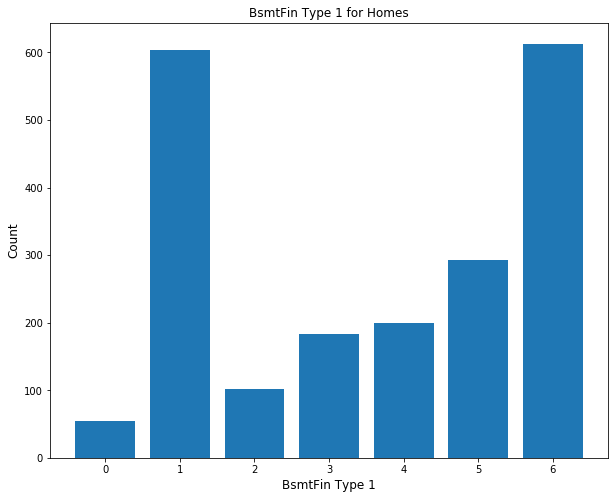

In [414]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('BsmtFin Type 1 for Homes', fontsize=12)
plt.xlabel('BsmtFin Type 1', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

**BsmtFin Type 2**

In [415]:
train['BsmtFin Type 2'].dtype

dtype('O')

In [416]:
train['BsmtFin Type 2'].value_counts(dropna=False).reindex([np.nan, 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'])

NaN      56
Unf    1747
LwQ      60
Rec      80
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [417]:
train['BsmtFin Type 2'] = train['BsmtFin Type 2'].fillna('None')

In [418]:
idx = train['BsmtFin Type 2'].value_counts().reindex(['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']).index
val = train['BsmtFin Type 2'].value_counts().reindex(['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']).values

Text(0, 0.5, 'Count')

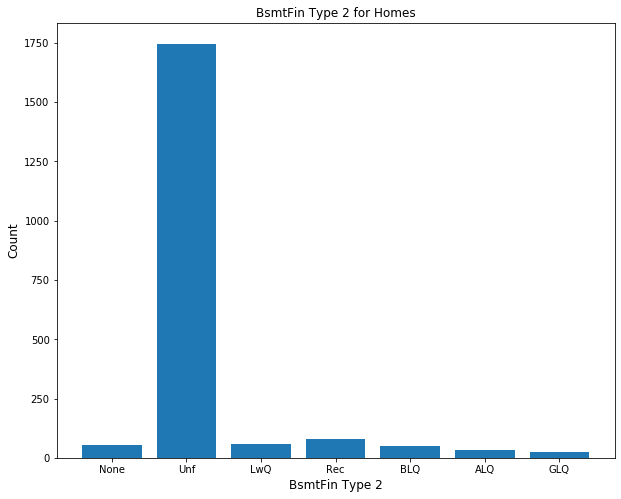

In [419]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('BsmtFin Type 2 for Homes', fontsize=12)
plt.xlabel('BsmtFin Type 2', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Boxplots of SalePrice by BsmtFin Type 2')

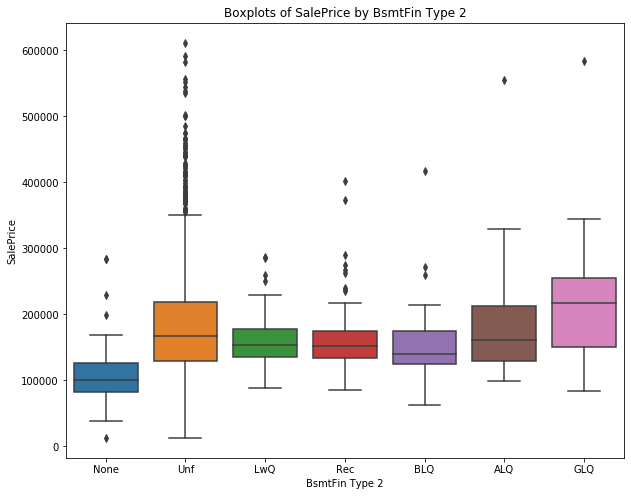

In [420]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='BsmtFin Type 2', y='SalePrice', data=train,order=['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'])
ax.set_title('Boxplots of SalePrice by BsmtFin Type 2')

In [421]:
category_int_map = {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

train['BsmtFin Type 2'] = train['BsmtFin Type 2'].map(category_int_map)

In [422]:
train['BsmtFin Type 2'].value_counts(dropna=False).sort_index()

0      56
1    1747
2      60
3      80
4      48
5      35
6      23
Name: BsmtFin Type 2, dtype: int64

In [423]:
idx = train['BsmtFin Type 2'].value_counts().sort_index().index
val = train['BsmtFin Type 2'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

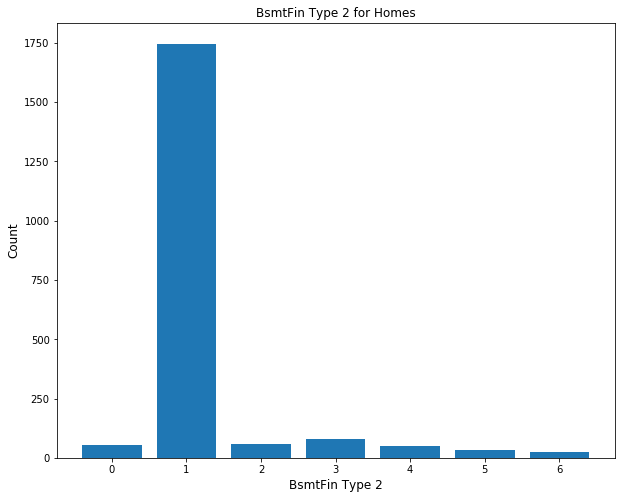

In [424]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('BsmtFin Type 2 for Homes', fontsize=12)
plt.xlabel('BsmtFin Type 2', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

**Heating QC**

In [425]:
train['Heating QC'].dtype

dtype('O')

In [426]:
train['Heating QC'].value_counts(dropna=False).reindex(['Po', 'Fa', 'TA', 'Gd', 'Ex'])

Po       3
Fa      67
TA     597
Gd     319
Ex    1063
Name: Heating QC, dtype: int64

In [427]:
idx = train['Heating QC'].value_counts().reindex(['Po', 'Fa', 'TA', 'Gd', 'Ex']).index
val = train['Heating QC'].value_counts().reindex(['Po', 'Fa', 'TA', 'Gd', 'Ex']).values

Text(0, 0.5, 'Count')

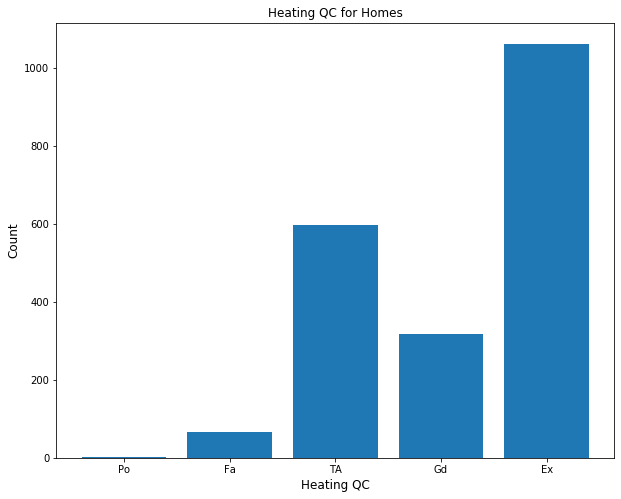

In [428]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Heating QC for Homes', fontsize=12)
plt.xlabel('Heating QC', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Boxplots of SalePrice by Heating QC')

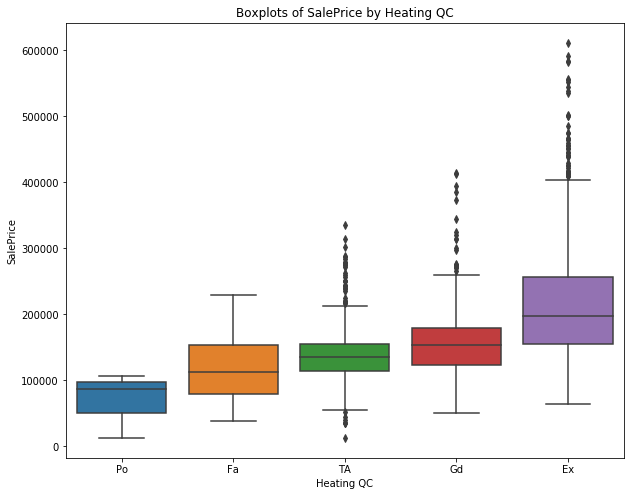

In [429]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Heating QC', y='SalePrice', data=train,order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
ax.set_title('Boxplots of SalePrice by Heating QC')

In [430]:
category_int_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

train['Heating QC'] = train['Heating QC'].map(category_int_map)

In [431]:
idx = train['Heating QC'].value_counts().sort_index().index
val = train['Heating QC'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

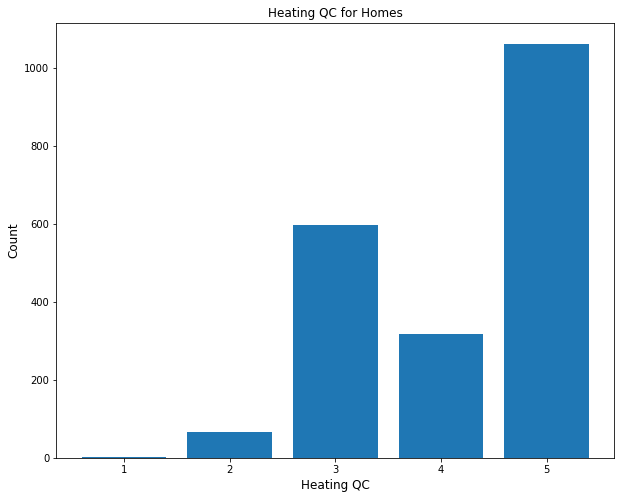

In [432]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Heating QC for Homes', fontsize=12)
plt.xlabel('Heating QC', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

**Electrical**

In [433]:
train['Electrical'].dtype

dtype('O')

In [434]:
train['Electrical'].value_counts(dropna=False).reindex(['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'])

Mix         1
FuseP       7
FuseF      35
FuseA     140
SBrkr    1866
Name: Electrical, dtype: int64

In [435]:
idx = train['Electrical'].value_counts().reindex(['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']).index
val = train['Electrical'].value_counts().reindex(['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']).values

Text(0, 0.5, 'Count')

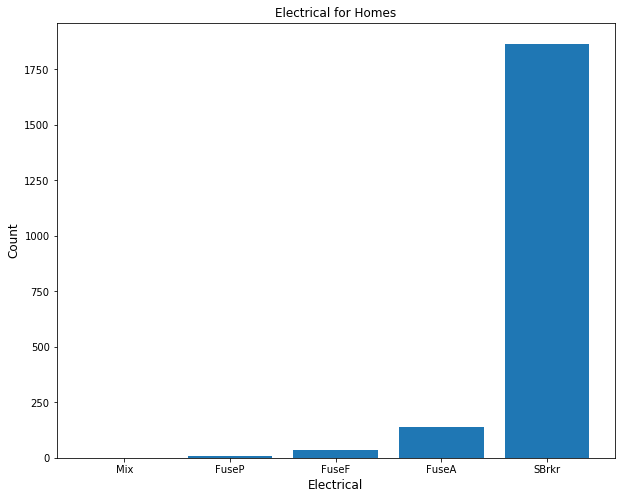

In [436]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Electrical for Homes', fontsize=12)
plt.xlabel('Electrical', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Boxplots of SalePrice by Electrical')

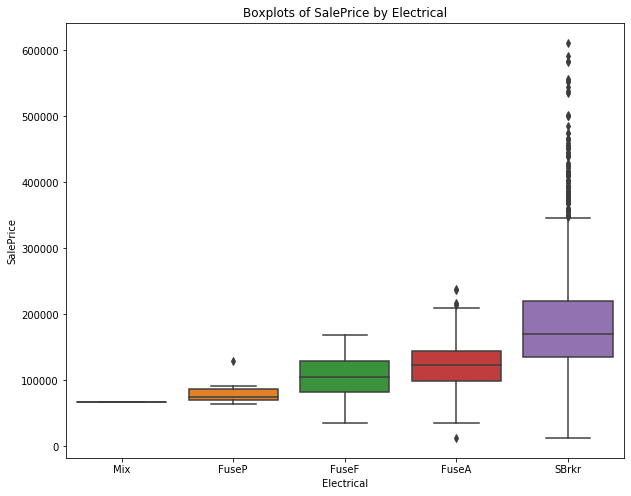

In [437]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Electrical', y='SalePrice', data=train,order=['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'])
ax.set_title('Boxplots of SalePrice by Electrical')

In [438]:
category_int_map = {'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5}

train['Electrical'] = train['Electrical'].map(category_int_map)

In [439]:
train['Electrical'] = train['Electrical'].astype('Int64')

In [440]:
idx = train['Electrical'].value_counts().sort_index().index
val = train['Electrical'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

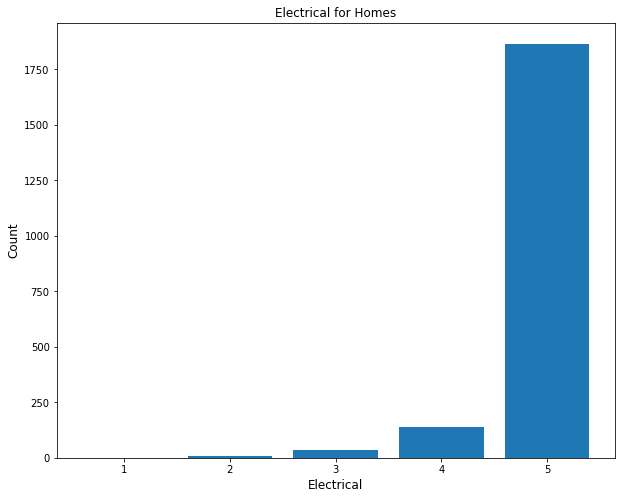

In [441]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Electrical for Homes', fontsize=12)
plt.xlabel('Electrical', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

**Kitchen Qual**

In [442]:
train['Kitchen Qual'].dtype

dtype('O')

In [443]:
train['Kitchen Qual'].value_counts(dropna=False).reindex(['Po', 'Fa', 'TA', 'Gd', 'Ex'])

Po       NaN
Fa      47.0
TA    1047.0
Gd     806.0
Ex     149.0
Name: Kitchen Qual, dtype: float64

In [444]:
idx = train['Kitchen Qual'].value_counts().reindex(['Po', 'Fa', 'TA', 'Gd', 'Ex']).index
val = train['Kitchen Qual'].value_counts().reindex(['Po', 'Fa', 'TA', 'Gd', 'Ex']).values

Text(0, 0.5, 'Count')

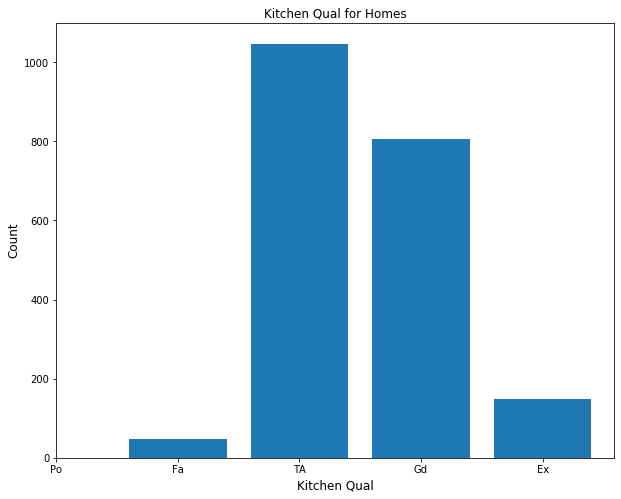

In [445]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Kitchen Qual for Homes', fontsize=12)
plt.xlabel('Kitchen Qual', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

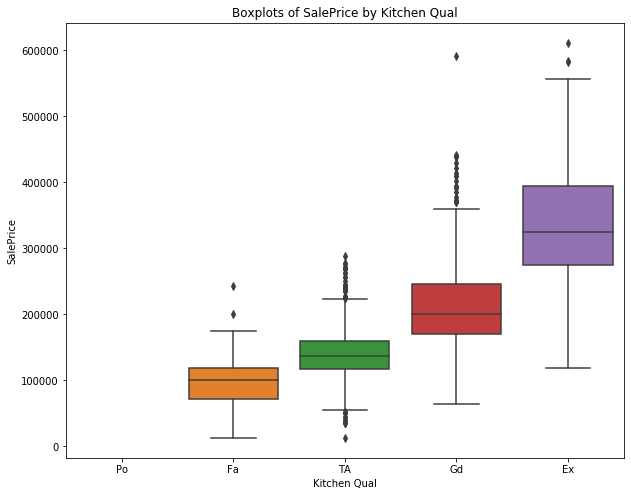

In [446]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Kitchen Qual', y='SalePrice', data=train,order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
ax.set_title('Boxplots of SalePrice by Kitchen Qual')
plt.savefig('../images/_barplot_kitchen_qual.png', transparent=True)

In [447]:
category_int_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
train['Kitchen Qual'] = train['Kitchen Qual'].replace(category_int_map)

In [448]:
train['Kitchen Qual'].value_counts(dropna=False).sort_index()

2      47
3    1047
4     806
5     149
Name: Kitchen Qual, dtype: int64

In [449]:
idx = train['Kitchen Qual'].value_counts().sort_index().index
val = train['Kitchen Qual'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

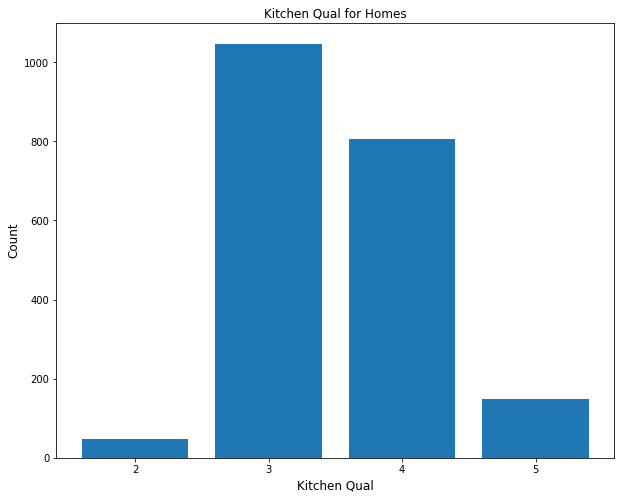

In [450]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Kitchen Qual for Homes', fontsize=12)
plt.xlabel('Kitchen Qual', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

**Functional**

In [451]:
train['Functional'].dtype

dtype('O')

In [452]:
train['Functional'].value_counts(dropna=False).reindex(['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'])

Sal        2
Sev        2
Maj2       7
Maj1      12
Mod       29
Min2      42
Min1      42
Typ     1913
Name: Functional, dtype: int64

In [453]:
idx = train['Functional'].value_counts().reindex(['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']).index
val = train['Functional'].value_counts().reindex(['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']).values

Text(0, 0.5, 'Count')

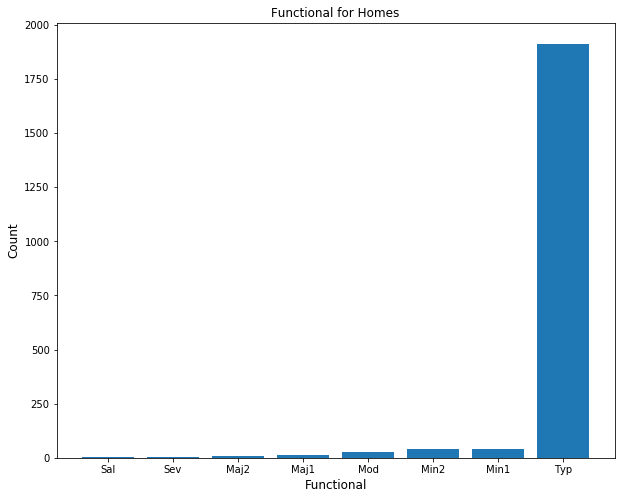

In [454]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Functional for Homes', fontsize=12)
plt.xlabel('Functional', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Boxplots of SalePrice by Functional')

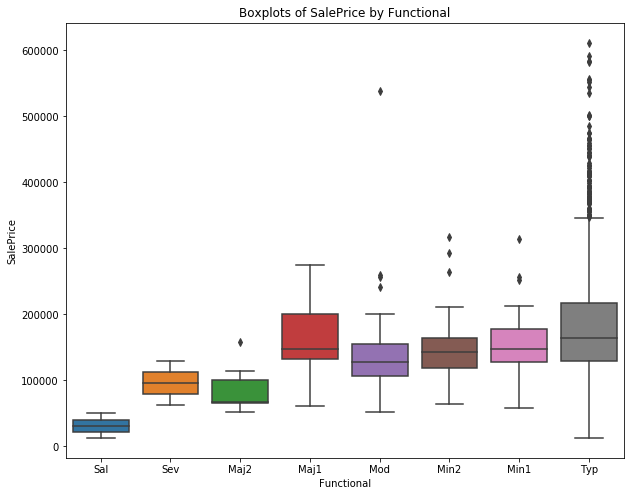

In [455]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Functional', y='SalePrice', data=train,order=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'])
ax.set_title('Boxplots of SalePrice by Functional')

In [456]:
category_int_map = {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8}

train['Functional'] = train['Functional'].map(category_int_map)

In [457]:
train['Functional'].value_counts(dropna=False).sort_index()

1       2
2       2
3       7
4      12
5      29
6      42
7      42
8    1913
Name: Functional, dtype: int64

In [458]:
idx = train['Functional'].value_counts().sort_index().index
val = train['Functional'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

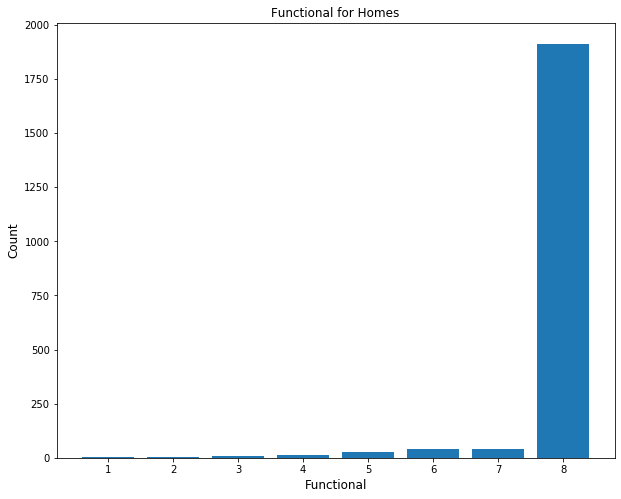

In [459]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Functional for Homes', fontsize=12)
plt.xlabel('Functional', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

**Fireplace Qu**

In [460]:
train['Fireplace Qu'].dtype

dtype('O')

In [461]:
train['Fireplace Qu'].value_counts(dropna=False).reindex([np.nan, 'Po', 'Fa', 'TA', 'Gd', 'Ex'])

NaN    1000
Po       31
Fa       59
TA      407
Gd      521
Ex       31
Name: Fireplace Qu, dtype: int64

In [462]:
idx = train['Fireplace Qu'].value_counts(dropna=False).reindex([np.nan, 'Po', 'Fa', 'TA', 'Gd', 'Ex']).index
val = train['Fireplace Qu'].value_counts(dropna=False).reindex([np.nan, 'Po', 'Fa', 'TA', 'Gd', 'Ex']).values

Text(0, 0.5, 'Count')

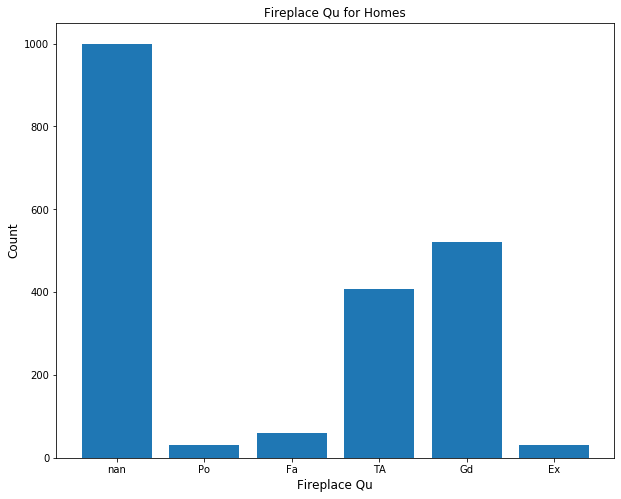

In [463]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Fireplace Qu for Homes', fontsize=12)
plt.xlabel('Fireplace Qu', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

In [464]:
category_int_map = {np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

train['Fireplace Qu'] = train['Fireplace Qu'].map(category_int_map)

In [465]:
train['Fireplace Qu'].value_counts(dropna=False).sort_index()

0    1000
1      31
2      59
3     407
4     521
5      31
Name: Fireplace Qu, dtype: int64

In [466]:
idx = train['Fireplace Qu'].value_counts().sort_index().index
val = train['Fireplace Qu'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

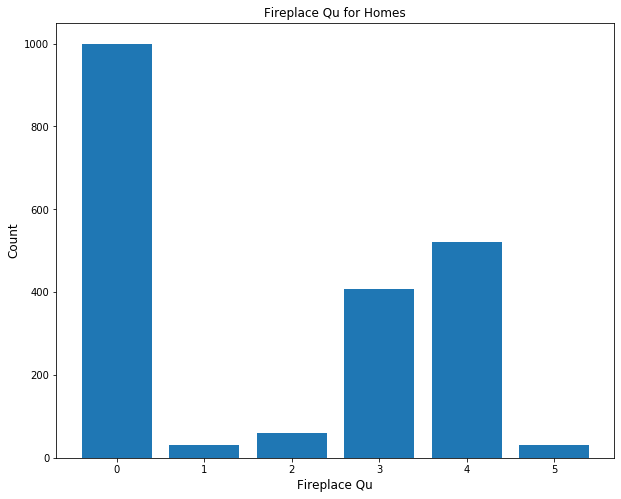

In [467]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Fireplace Qu for Homes', fontsize=12)
plt.xlabel('Fireplace Qu', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Boxplots of SalePrice by Fireplace Qu')

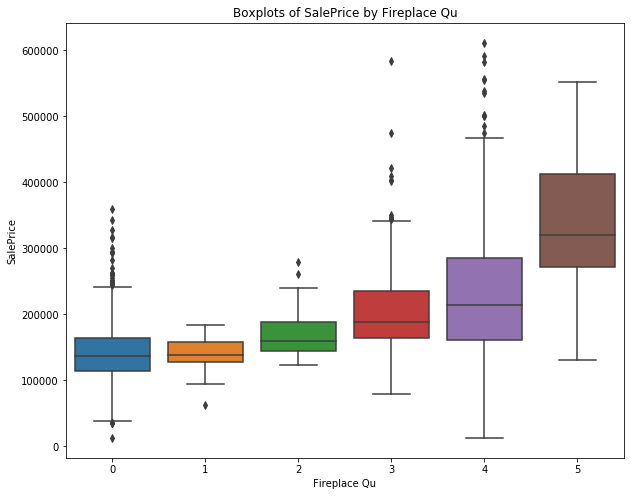

In [468]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Fireplace Qu', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Fireplace Qu')

**Garage Finish**

In [469]:
train['Garage Finish'].dtype

dtype('O')

In [470]:
train['Garage Finish'].value_counts(dropna=False).reindex([np.nan, 'Unf', 'RFn', 'Fin'])

NaN    114
Unf    849
RFn    579
Fin    507
Name: Garage Finish, dtype: int64

In [471]:
idx = train['Garage Finish'].value_counts(dropna=False).reindex([np.nan, 'Unf', 'RFn', 'Fin']).index
val = train['Garage Finish'].value_counts(dropna=False).reindex([np.nan, 'Unf', 'RFn', 'Fin']).values

Text(0, 0.5, 'Count')

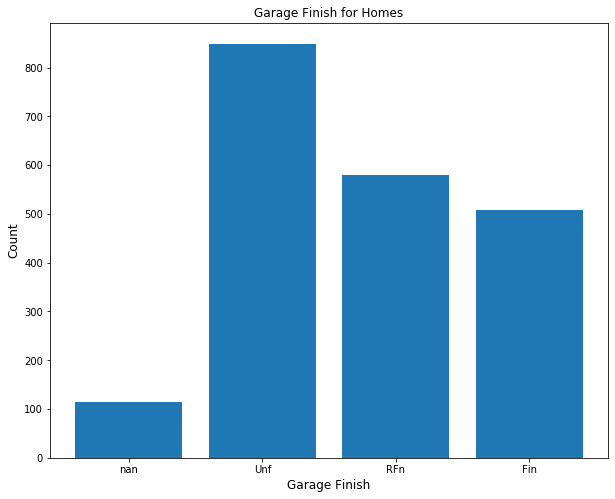

In [472]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Garage Finish for Homes', fontsize=12)
plt.xlabel('Garage Finish', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

In [473]:
garage_finish_missing_idx = train[train['Garage Finish'].isnull()].index.tolist()

In [474]:
print(garage_finish_missing_idx)

[2243, 330, 2278, 2235, 2084, 728, 781, 1492, 1514, 216, 204, 754, 698, 2745, 131, 615, 2824, 2846, 943, 753, 2369, 2034, 2882, 1501, 2635, 1951, 1318, 900, 1376, 1366, 187, 218, 1504, 2670, 2174, 1417, 2187, 1415, 2883, 207, 1292, 2875, 1135, 172, 2471, 2621, 1600, 763, 1515, 1516, 1808, 2195, 2083, 1505, 2693, 1370, 1319, 281, 1807, 1903, 536, 1306, 2127, 28, 2697, 1503, 1332, 1260, 2821, 1299, 727, 1487, 120, 1968, 766, 1221, 1521, 701, 2556, 2853, 1902, 1547, 1296, 1278, 130, 1948, 2820, 1550, 2914, 393, 2046, 710, 764, 1502, 1132, 2290, 853, 2237, 2671, 898, 2496, 2920, 894, 2837, 2668, 1486, 1591, 2690, 1601, 325, 2880, 2628, 2288, 2842]


In [475]:
category_int_map = {np.nan: 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

train['Garage Finish'] = train['Garage Finish'].map(category_int_map)

In [476]:
train['Garage Finish'].value_counts().sort_index()

0    114
1    849
2    579
3    507
Name: Garage Finish, dtype: int64

In [477]:
idx = train['Garage Finish'].value_counts().sort_index().index
val = train['Garage Finish'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

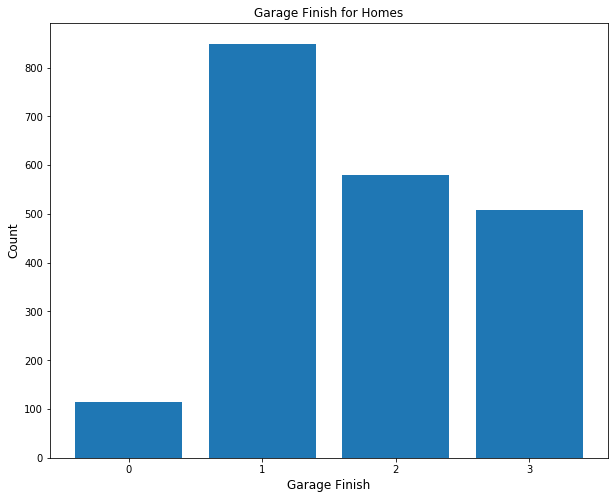

In [478]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Garage Finish for Homes', fontsize=12)
plt.xlabel('Garage Finish', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Boxplots of SalePrice by Garage Finish')

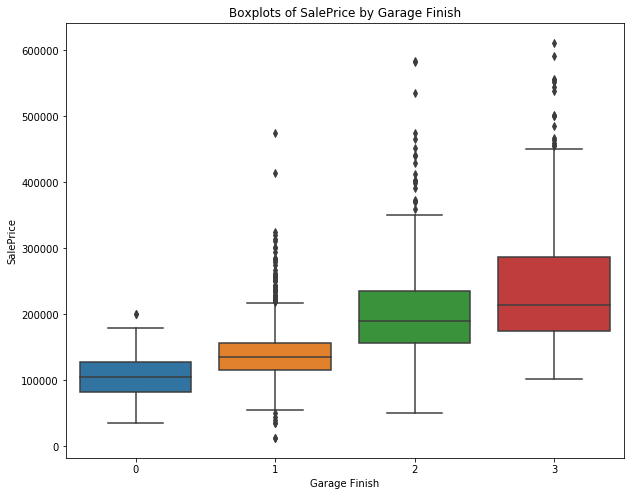

In [479]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Garage Finish', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Garage Finish')

**Garage Qual**

In [480]:
train['Garage Qual'].dtype

dtype('O')

In [481]:
train['Garage Qual'].value_counts(dropna=False).reindex([np.nan, 'Po', 'Fa', 'TA', 'Gd', 'Ex'])

NaN     114
Po        2
Fa       82
TA     1830
Gd       18
Ex        3
Name: Garage Qual, dtype: int64

In [482]:
idx = train['Garage Qual'].value_counts(dropna=False).reindex([np.nan, 'Po', 'Fa', 'TA', 'Gd', 'Ex']).index
val = train['Garage Qual'].value_counts(dropna=False).reindex([np.nan, 'Po', 'Fa', 'TA', 'Gd', 'Ex']).values

Text(0, 0.5, 'Count')

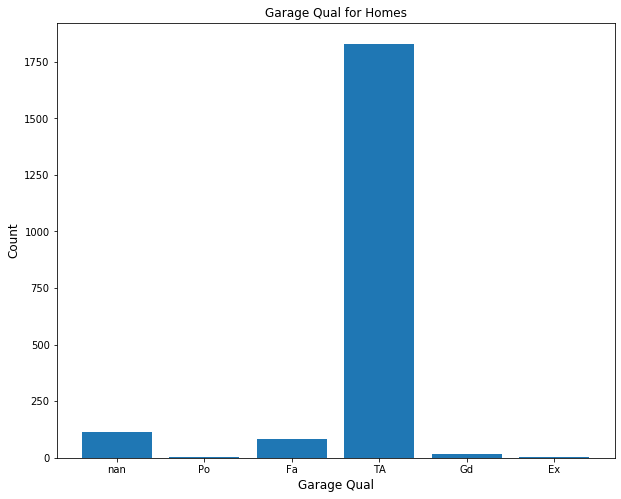

In [483]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Garage Qual for Homes', fontsize=12)
plt.xlabel('Garage Qual', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

In [484]:
garage_qual_missing_idx = train[train['Garage Qual'].isnull()].index.tolist()

In [485]:
print(garage_qual_missing_idx)

[2243, 330, 2278, 2235, 2084, 728, 781, 1492, 1514, 216, 204, 754, 698, 2745, 131, 615, 2824, 2846, 943, 753, 2369, 2034, 2882, 1501, 2635, 1951, 1318, 900, 1376, 1366, 187, 218, 1504, 2670, 2174, 1417, 2187, 1415, 2883, 207, 1292, 2875, 1135, 172, 2471, 2621, 1600, 763, 1515, 1516, 1808, 2195, 2083, 1505, 2693, 1370, 1319, 281, 1807, 1903, 536, 1306, 2127, 28, 2697, 1503, 1332, 1260, 2821, 1299, 727, 1487, 120, 1968, 766, 1221, 1521, 701, 2556, 2853, 1902, 1547, 1296, 1278, 130, 1948, 2820, 1550, 2914, 393, 2046, 710, 764, 1502, 1132, 2290, 853, 2237, 2671, 898, 2496, 2920, 894, 2837, 2668, 1486, 1591, 2690, 1601, 325, 2880, 2628, 2288, 2842]


In [486]:
category_int_map = {np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

train['Garage Qual'] = train['Garage Qual'].map(category_int_map)

In [487]:
train['Garage Qual'].value_counts(dropna=False).sort_index()

0     114
1       2
2      82
3    1830
4      18
5       3
Name: Garage Qual, dtype: int64

In [488]:
idx = train['Garage Qual'].value_counts().sort_index().index
val = train['Garage Qual'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

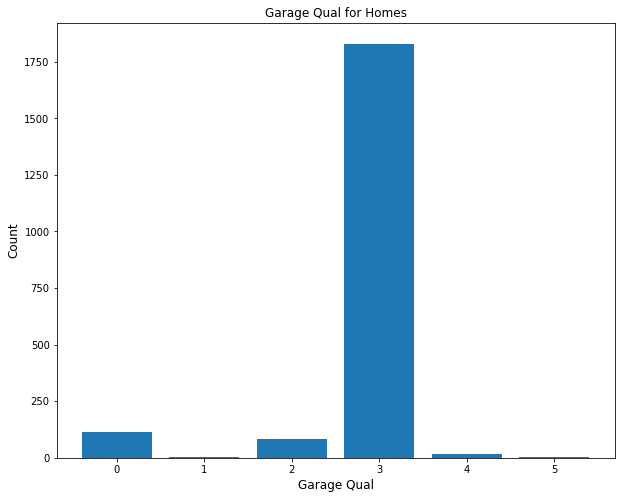

In [489]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Garage Qual for Homes', fontsize=12)
plt.xlabel('Garage Qual', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Boxplots of SalePrice by Garage Qual')

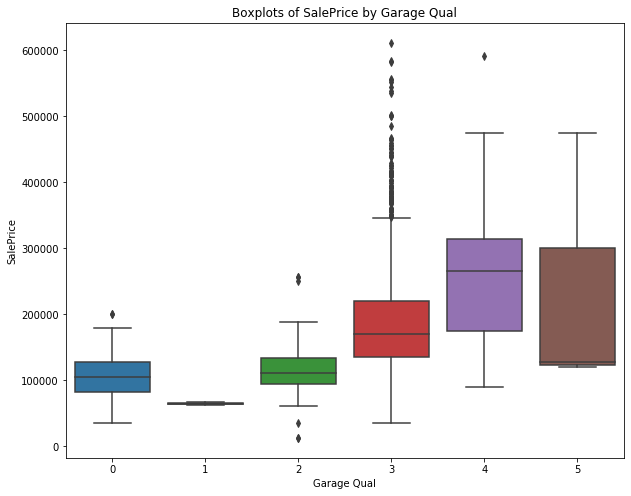

In [490]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Garage Qual', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Garage Qual')

**Garage Cond**

In [491]:
train['Garage Cond'].dtype

dtype('O')

In [492]:
train['Garage Cond'].value_counts(dropna=False).reindex([np.nan, 'Po', 'Fa', 'TA', 'Gd', 'Ex'])

NaN     114
Po        8
Fa       47
TA     1866
Gd       12
Ex        2
Name: Garage Cond, dtype: int64

In [493]:
idx = train['Garage Cond'].value_counts(dropna=False).reindex([np.nan, 'Po', 'Fa', 'TA', 'Gd', 'Ex']).index
val = train['Garage Cond'].value_counts(dropna=False).reindex([np.nan, 'Po', 'Fa', 'TA', 'Gd', 'Ex']).values

Text(0, 0.5, 'Count')

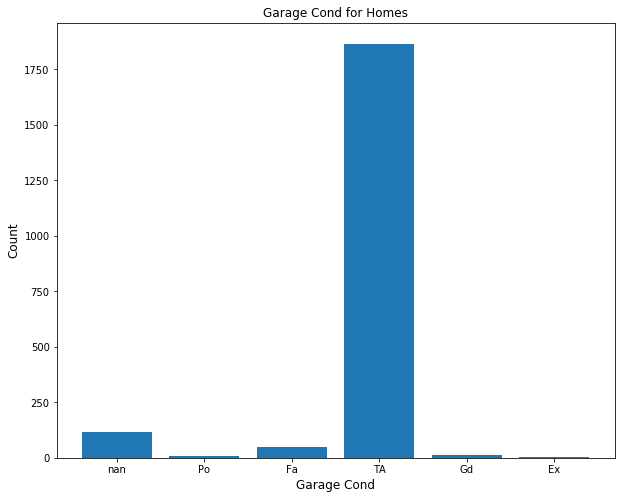

In [494]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Garage Cond for Homes', fontsize=12)
plt.xlabel('Garage Cond', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

In [495]:
garage_cond_missing_idx = train[train['Garage Cond'].isnull()].index.tolist()

In [496]:
print(garage_cond_missing_idx)

[2243, 330, 2278, 2235, 2084, 728, 781, 1492, 1514, 216, 204, 754, 698, 2745, 131, 615, 2824, 2846, 943, 753, 2369, 2034, 2882, 1501, 2635, 1951, 1318, 900, 1376, 1366, 187, 218, 1504, 2670, 2174, 1417, 2187, 1415, 2883, 207, 1292, 2875, 1135, 172, 2471, 2621, 1600, 763, 1515, 1516, 1808, 2195, 2083, 1505, 2693, 1370, 1319, 281, 1807, 1903, 536, 1306, 2127, 28, 2697, 1503, 1332, 1260, 2821, 1299, 727, 1487, 120, 1968, 766, 1221, 1521, 701, 2556, 2853, 1902, 1547, 1296, 1278, 130, 1948, 2820, 1550, 2914, 393, 2046, 710, 764, 1502, 1132, 2290, 853, 2237, 2671, 898, 2496, 2920, 894, 2837, 2668, 1486, 1591, 2690, 1601, 325, 2880, 2628, 2288, 2842]


In [497]:
category_int_map = {np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

train['Garage Cond'] = train['Garage Cond'].map(category_int_map)

In [498]:
train['Garage Cond'].value_counts(dropna=False).sort_index()

0     114
1       8
2      47
3    1866
4      12
5       2
Name: Garage Cond, dtype: int64

In [499]:
idx = train['Garage Cond'].value_counts().sort_index().index
val = train['Garage Cond'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

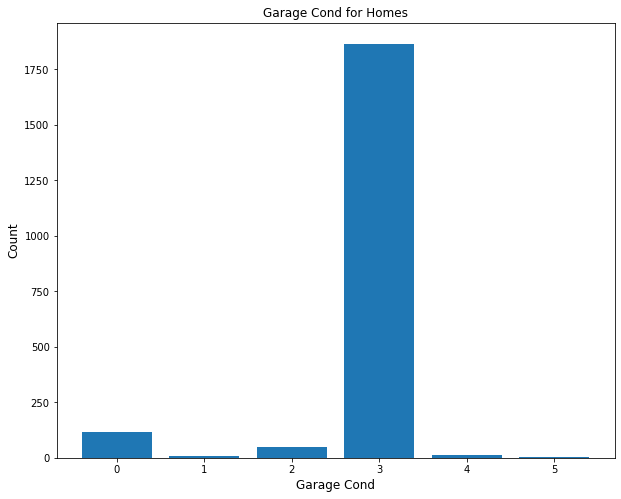

In [500]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Garage Cond for Homes', fontsize=12)
plt.xlabel('Garage Cond', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Boxplots of SalePrice by Garage Cond')

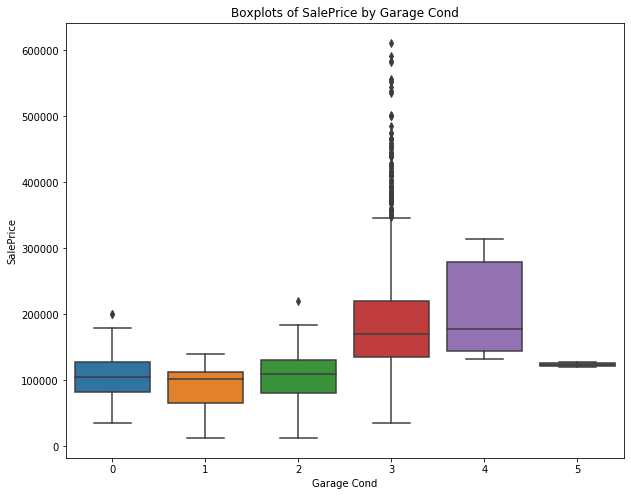

In [501]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Garage Cond', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Garage Cond')

**Paved Drive**

In [502]:
train['Paved Drive'].dtype

dtype('O')

In [503]:
train['Paved Drive'].value_counts(dropna=False).reindex(['N', 'P', 'Y'])

N     151
P      39
Y    1859
Name: Paved Drive, dtype: int64

In [504]:
idx = train['Paved Drive'].value_counts(dropna=False).reindex(['N', 'P', 'Y']).index
val = train['Paved Drive'].value_counts(dropna=False).reindex(['N', 'P', 'Y']).values

Text(0, 0.5, 'Count')

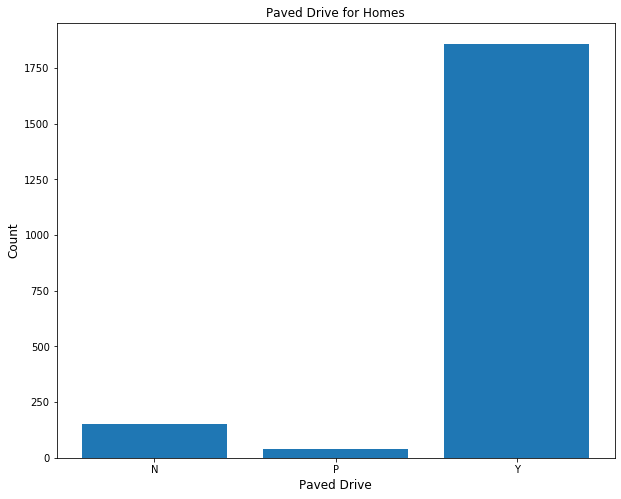

In [505]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Paved Drive for Homes', fontsize=12)
plt.xlabel('Paved Drive', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

In [506]:
category_int_map = {'N': 1, 'P': 2, 'Y': 3}

train['Paved Drive'] = train['Paved Drive'].map(category_int_map)

In [507]:
train['Paved Drive'].value_counts(dropna=False).sort_index()

1     151
2      39
3    1859
Name: Paved Drive, dtype: int64

In [508]:
idx = train['Paved Drive'].value_counts().sort_index().index
val = train['Paved Drive'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

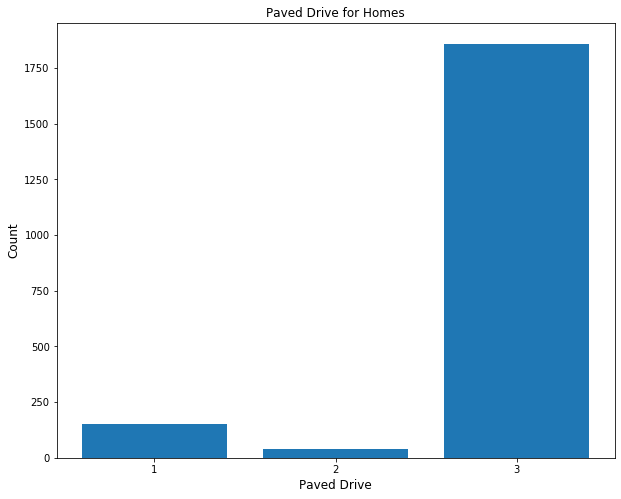

In [509]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Paved Drive for Homes', fontsize=12)
plt.xlabel('Paved Drive', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Boxplots of SalePrice by Paved Drive')

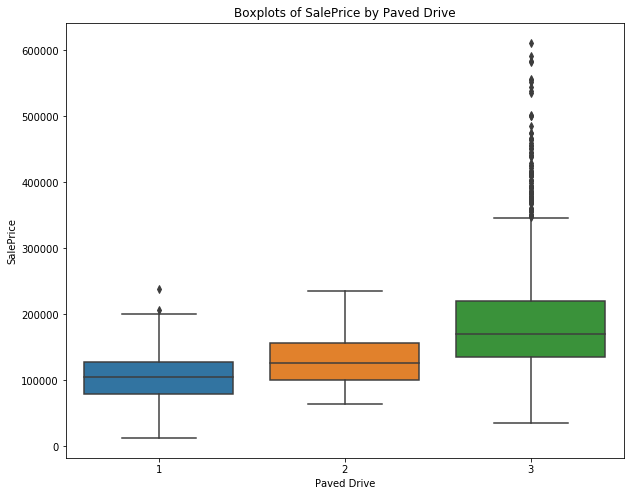

In [510]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Paved Drive', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Paved Drive')

**Pool QC**

In [511]:
train['Pool QC'].dtype

dtype('O')

In [512]:
train['Pool QC'].value_counts(dropna=False).reindex([np.nan, 'Fa', 'TA', 'Gd', 'Ex'])

NaN    2041
Fa        2
TA        2
Gd        3
Ex        1
Name: Pool QC, dtype: int64

In [513]:
idx = train['Pool QC'].value_counts(dropna=False).reindex([np.nan, 'Fa', 'TA', 'Gd', 'Ex']).index
val = train['Pool QC'].value_counts(dropna=False).reindex([np.nan, 'Fa', 'TA', 'Gd', 'Ex']).values

Text(0, 0.5, 'Count')

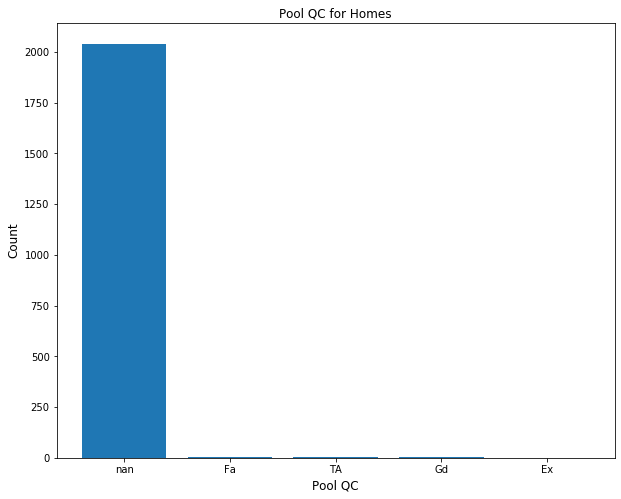

In [514]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Pool QC for Homes', fontsize=12)
plt.xlabel('Pool QC', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

In [515]:
category_int_map = {np.nan: 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}

train['Pool QC'] = train['Pool QC'].map(category_int_map)

In [516]:
train['Pool QC'].value_counts(dropna=False).sort_index()

0    2041
1       2
2       2
3       3
4       1
Name: Pool QC, dtype: int64

In [517]:
idx = train['Pool QC'].value_counts().sort_index().index
val = train['Pool QC'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

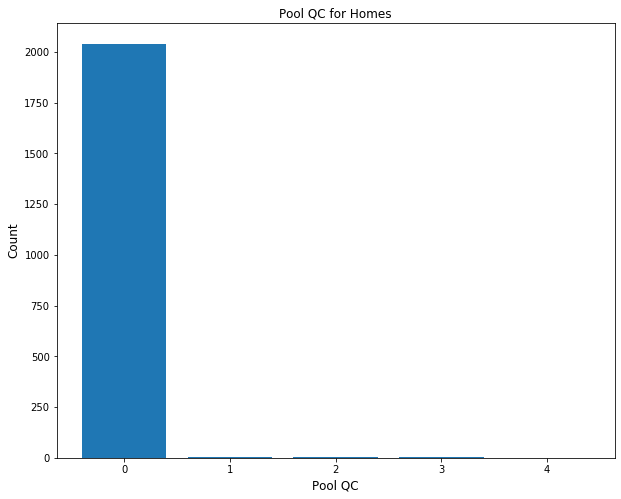

In [518]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Pool QC for Homes', fontsize=12)
plt.xlabel('Pool QC', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Boxplots of SalePrice by Pool QC')

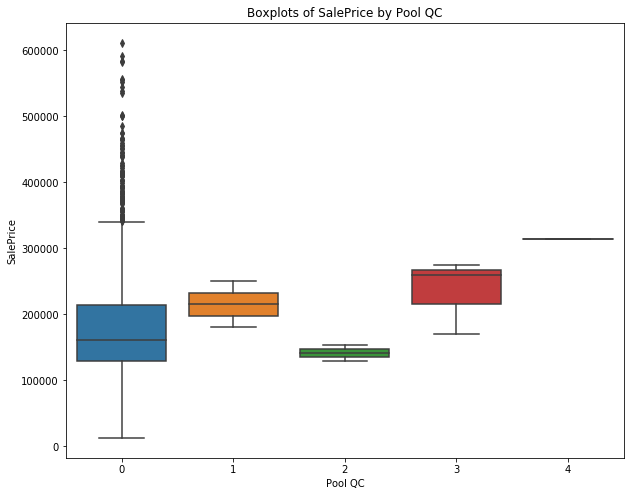

In [519]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Pool QC', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Pool QC')

**Fence**

In [520]:
train['Fence'].dtype

dtype('O')

In [521]:
train['Fence'].value_counts(dropna=False).reindex([np.nan, 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'])

NaN      1649
MnWw       10
GdWo       80
MnPrv     227
GdPrv      83
Name: Fence, dtype: int64

In [522]:
idx = train['Fence'].value_counts(dropna=False).reindex([np.nan, 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']).index
val = train['Fence'].value_counts(dropna=False).reindex([np.nan, 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']).values

Text(0, 0.5, 'Count')

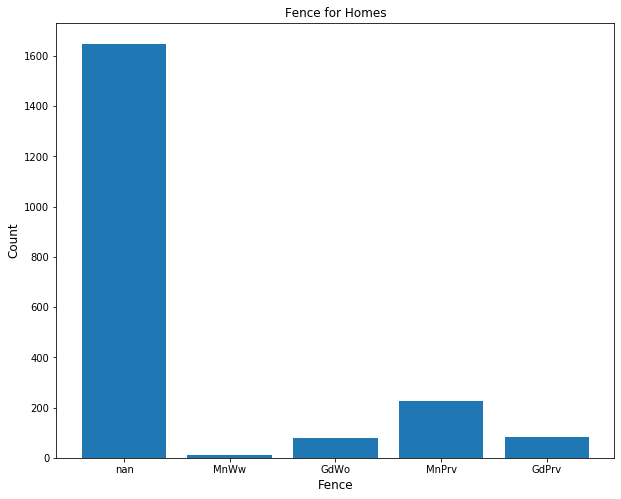

In [523]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Fence for Homes', fontsize=12)
plt.xlabel('Fence', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

In [524]:
category_int_map = {np.nan: 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

train['Fence'] = train['Fence'].map(category_int_map)

In [525]:
train['Fence'].value_counts(dropna=False).sort_index()

0    1649
1      10
2      80
3     227
4      83
Name: Fence, dtype: int64

In [526]:
idx = train['Fence'].value_counts().sort_index().index
val = train['Fence'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

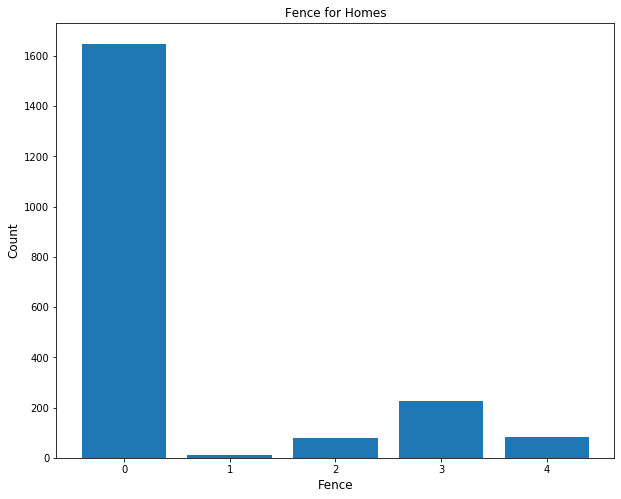

In [527]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(idx)), val)

plt.title('Fence for Homes', fontsize=12)
plt.xlabel('Fence', fontsize=12)
plt.xticks(np.arange(len(idx)), idx)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Boxplots of SalePrice by Fence')

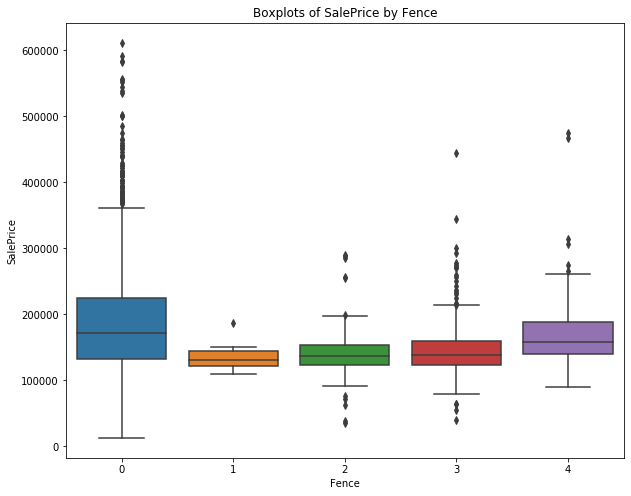

In [528]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Fence', y='SalePrice', data=train)
ax.set_title('Boxplots of SalePrice by Fence')

## Handling Missing Data

In [529]:
train.isnull().sum()[train.isnull().sum() > 0]

Lot Frontage      330
Mas Vnr Type       22
Mas Vnr Area       22
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     114
Garage Cars         1
Garage Area         1
dtype: int64

**Lot Frontage**

In [530]:
train['Lot Frontage'][train['Lot Frontage'].isnull()]

Id
109    NaN
145    NaN
1942   NaN
12     NaN
1534   NaN
        ..
560    NaN
2872   NaN
2526   NaN
25     NaN
785    NaN
Name: Lot Frontage, Length: 330, dtype: float64

In [531]:
train['Lot Frontage'].min(), train['Lot Frontage'].max()

(21.0, 313.0)

In [532]:
# train_duplicate[train_duplicate['Lot Frontage'].isnull()].groupby('PID')['SalePrice'].count()

In [533]:
train_duplicate.groupby('PID')['Lot Frontage'].median().loc[['907', '916']]

PID
907    70.0
916    74.0
Name: Lot Frontage, dtype: float64

In [534]:
train['Lot Frontage'] = train.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.median()))

In [535]:
train.loc[train['Lot Frontage'].isnull(), ['Lot Frontage', 'Neighborhood', 'PID']]

,Lot Frontage,Neighborhood,PID
Id,,,
2257,NaN,GrnHill,916253320
2789,NaN,Landmrk,907230240
2893,NaN,GrnHill,916252170


In [536]:
train.loc[[2257, 2893], 'Lot Frontage'] = 74.0

In [537]:
train.loc[[2789], 'Lot Frontage'] = 70.0

**Mas Vnr Type**

Handling missing data

In [538]:
# Same indices with missing 'Mas Vnr Area' features
mas_vnr_type_missing_idx = train['Mas Vnr Type'][train['Mas Vnr Type'].isnull()].index

**Mas Vnr Area**

Handling missing data

In [539]:
# Same indices with missing 'Mas Vnr Type' features
mas_vnr_area_missing_idx = train['Mas Vnr Area'][train['Mas Vnr Area'].isnull()].index

In [540]:
train['Mas Vnr Area'].min(), train['Mas Vnr Area'].max()

(0.0, 1600.0)

In [541]:
np.array_equal(mas_vnr_area_missing_idx, mas_vnr_type_missing_idx)

True

Observation: The same rows have missing values for Mas Vnr Type, Mas Vnr Area

In [542]:
train.dropna(subset=['Mas Vnr Area'], inplace=True)

**BsmtFin SF 1**

In [543]:
train['BsmtFin SF 1'][train['BsmtFin SF 1'].isnull()]

Id
1342   NaN
Name: BsmtFin SF 1, dtype: float64

**BsmtFin SF 2**

In [544]:
train['BsmtFin SF 2'][train['BsmtFin SF 2'].isnull()]

Id
1342   NaN
Name: BsmtFin SF 2, dtype: float64

**Bsmt Unf SF**

In [545]:
train['Bsmt Unf SF'][train['Bsmt Unf SF'].isnull()]

Id
1342   NaN
Name: Bsmt Unf SF, dtype: float64

**Total Bsmt SF**

In [546]:
train['Total Bsmt SF'][train['Total Bsmt SF'].isnull()]

Id
1342   NaN
Name: Total Bsmt SF, dtype: float64

Observation: row Id 1342 has missing values for the features BsmtFin SF 1, BsmtFin SF 2, BsmtFin Unf SF, Total Bsmt SF

In [547]:
train.dropna(subset=['Total Bsmt SF'], inplace=True)

**Bsmt Full Bath**

In [548]:
train['Bsmt Full Bath'][train['Bsmt Full Bath'].isnull()]

Id
1498    NaN
Name: Bsmt Full Bath, dtype: Int64

**Bsmt Half Bath**

In [549]:
train['Bsmt Half Bath'][train['Bsmt Half Bath'].isnull()]

Id
1498    NaN
Name: Bsmt Half Bath, dtype: Int64

Observation: row 1498 have missing values for the features Bsmt Full Bath, Bsmt Half Bath

In [550]:
train.dropna(subset=['Bsmt Half Bath'], inplace=True)

**Garage Yr Blt**

In [551]:
train[train['Garage Yr Blt'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2243,911103060,190,C (all),75.0,8250.0,Pave,None,4,Lvl,4,...,0.0,0.0,0,0,None,0.0,06,2007,WD,119600.0
330,923226250,160,RM,21.0,1476.0,Pave,None,4,Lvl,4,...,0.0,0.0,0,0,None,0.0,03,2010,WD,76000.0
2278,923202134,020,RL,70.0,8402.0,Pave,None,4,Lvl,4,...,0.0,0.0,0,0,None,0.0,12,2007,New,147000.0
2235,910201050,050,RM,50.0,7288.0,Pave,None,4,Lvl,4,...,0.0,0.0,0,0,None,0.0,09,2007,WD,129850.0
2084,905476170,030,RL,58.0,9098.0,Pave,None,3,Lvl,4,...,0.0,0.0,0,0,None,0.0,07,2007,WD,86000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,923204150,090,RL,94.0,9400.0,Pave,None,4,Low,4,...,0.0,0.0,0,0,None,0.0,04,2010,WD,139000.0
2880,911175410,030,C (all),69.0,12366.0,Pave,None,4,Lvl,4,...,0.0,0.0,0,0,None,0.0,10,2006,WD,51689.0
2628,535456010,090,RL,75.0,8512.0,Pave,None,4,Lvl,4,...,0.0,0.0,0,0,None,0.0,09,2006,WD,119000.0


In [552]:
train['Garage Yr Blt'].value_counts()

2005    104
2007     77
2006     77
2004     72
2003     64
       ... 
1933      1
1896      1
1917      1
1918      1
1895      1
Name: Garage Yr Blt, Length: 99, dtype: int64

In [553]:
# train.dropna(subset=['Garage Yr Blt'], inplace=True)

In [554]:
np.array_equal(garage_yr_blt_missing_idx, garage_qual_missing_idx)

True

In [555]:
train[train['Garage Type'] == 'None'].index

Int64Index([2243,  330, 2278, 2235, 2084,  728,  781, 1492, 1514,  216,
            ...
            2668, 1486, 1591, 2690, 1601,  325, 2880, 2628, 2288, 2842],
           dtype='int64', name='Id', length=112)

In [556]:
train[train['Garage Finish'] == 0].index

Int64Index([2243,  330, 2278, 2235, 2084,  728,  781, 1492, 1514,  216,
            ...
            2668, 1486, 1591, 2690, 1601,  325, 2880, 2628, 2288, 2842],
           dtype='int64', name='Id', length=113)

In [557]:
train.loc[train[train['Garage Type'] == 'None'].index, ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
Id,,,,,,,
2243,None,NaN,0,0,0.0,0,0
330,None,NaN,0,0,0.0,0,0
2278,None,NaN,0,0,0.0,0,0
2235,None,NaN,0,0,0.0,0,0
2084,None,NaN,0,0,0.0,0,0
...,...,...,...,...,...,...,...
325,None,NaN,0,0,0.0,0,0
2880,None,NaN,0,0,0.0,0,0
2628,None,NaN,0,0,0.0,0,0


Observation: Those with 'No Garage' for 'Garage Qual' are also those with missing values for 'Garage Yr Blt'

In [558]:
train['Garage Yr Blt'].fillna(0, inplace=True)

In [559]:
train['Garage Yr Blt'].value_counts()

0       113
2005    104
2007     77
2006     77
2004     72
       ... 
1933      1
1896      1
1918      1
1917      1
1895      1
Name: Garage Yr Blt, Length: 100, dtype: int64

**Garage Cars**

In [560]:
garage_cars_missing_idx = train[train['Garage Cars'].isnull()].index.tolist()

In [561]:
print(garage_cars_missing_idx)

[2237]


**Garage Area**

In [562]:
garage_area_missing_idx = train['Garage Area'][train['Garage Area'].isnull()].index.tolist()

In [563]:
print(garage_area_missing_idx)

[2237]


Observation: row Id 2237 has missing value for Garage Cars, Garage Area

In [564]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train.loc[2237, :])

PID                910201180
MS SubClass              070
MS Zoning                 RM
Lot Frontage              50
Lot Area                9060
Street                  Pave
Alley                   None
Lot Shape                  4
Land Contour             Lvl
Utilities                  4
Lot Config            Inside
Land Slope                 1
Neighborhood          IDOTRR
Condition 1             Norm
Condition 2             Norm
Bldg Type               1Fam
House Style           2Story
Overall Qual               5
Overall Cond               6
Year Built              1923
Year Remod/Add          1999
Roof Style             Gable
Roof Matl            CompShg
Exterior 1st         Wd Sdng
Exterior 2nd         Plywood
Mas Vnr Type            None
Mas Vnr Area               0
Exter Qual                 3
Exter Cond                 3
Foundation            BrkTil
Bsmt Qual                  4
Bsmt Cond                  3
Bsmt Exposure              1
BsmtFin Type 1             5
BsmtFin SF 1  

In [565]:
train.dropna(subset=['Garage Area'], inplace=True)

In [566]:
train.isnull().sum()[train.isnull().sum() > 0]

Series([], dtype: int64)

In [567]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2024 entries, 109 to 10
Data columns (total 80 columns):
PID                2024 non-null category
MS SubClass        2024 non-null category
MS Zoning          2024 non-null category
Lot Frontage       2024 non-null float64
Lot Area           2024 non-null float64
Street             2024 non-null category
Alley              2024 non-null category
Lot Shape          2024 non-null int64
Land Contour       2024 non-null category
Utilities          2024 non-null int64
Lot Config         2024 non-null category
Land Slope         2024 non-null int64
Neighborhood       2024 non-null category
Condition 1        2024 non-null category
Condition 2        2024 non-null category
Bldg Type          2024 non-null category
House Style        2024 non-null category
Overall Qual       2024 non-null int64
Overall Cond       2024 non-null int64
Year Built         2024 non-null int64
Year Remod/Add     2024 non-null int64
Roof Style         2024 non-null c

## Save cleaned train data

In [568]:
# Save
train.to_csv('../data/train_cleaned.csv')